In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
from IPython.display import clear_output

tqdm.pandas()
pd.options.display.max_colwidth = -1
pd.options.display.max_columns = 35

In [3]:
from dsutils.eda import *
from dsutils.stats import *
from dsutils.ml import *

In [4]:
data = pd.read_csv('advanced_features.csv')

In [5]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,abs_token_diff,avg_num_token,rel_token_diff,token_intersection,token_union,jaccard_similarity_token,lcs_token,lcs_token_ratio,q1_clean,q2_clean,abs_word_diff,avg_num_word,rel_word_diff,word_intersection,word_union,jaccard_similarity_word,lcs_word,lcs_word_ratio,fuzz_simple_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio,hamming_distance,cosine_distance,weighted_intersection,weighted_union,jaccard_similarity_weighted
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,2,13.0,0.153846,10,13,0.769231,11,0.846154,step step guid invest share market india,step step guid invest share market,1,6.5,0.153846,5,6,0.833333,6,0.923077,92,98,92,100,0.000011,0.025243,35.639119,39.982959,0.891358
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,5,10.5,0.476190,4,16,0.250000,4,0.380952,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh noor diamond back,5,7.5,0.666667,4,11,0.363636,4,0.533333,64,91,62,89,0.000074,0.233014,44.813524,90.737799,0.493879
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,4,12.0,0.333333,3,21,0.142857,3,0.250000,increas speed internet connect use vpn,internet speed increas hack dn,1,5.5,0.181818,3,8,0.375000,1,0.181818,66,67,71,85,0.000053,0.530295,19.995960,57.294716,0.349002
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,2,10.0,0.200000,0,19,0.000000,0,0.000000,whi mental veri lone solv,find remaind math 23 24 math divid 24 23,4,7.0,0.571429,0,11,0.000000,0,0.000000,44,56,15,19,0.000117,1.000000,0.000000,80.610728,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,6,10.0,0.600000,2,18,0.111111,2,0.200000,one dissolv water quikli sugar salt methan carbon di oxid,fish would surviv salt water,5,7.5,0.666667,2,13,0.153846,1,0.133333,52,64,42,53,0.000117,0.764240,14.865222,110.922613,0.134014


In [6]:
data.shape

(404124, 33)

In [7]:
feats = ['abs_token_diff', 'avg_num_token', 'rel_token_diff', 
         'token_intersection', 'token_union', 'jaccard_similarity_token',
         'lcs_token', 'lcs_token_ratio',
         'abs_word_diff', 'avg_num_word', 'rel_word_diff',
         'word_intersection', 'word_union', 'jaccard_similarity_word',
         'lcs_word', 'lcs_word_ratio',
         'fuzz_simple_ratio', 'fuzz_partial_ratio', 'fuzz_token_sort_ratio', 'fuzz_token_set_ratio',
         'hamming_distance', 'cosine_distance',
         'weighted_intersection', 'weighted_union', 'jaccard_similarity_weighted',
]
target = 'is_duplicate'

In [8]:
data = data[feats+[target]]

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

data[feats] = sc.fit_transform(data[feats])

In [11]:
data.head()

,abs_token_diff,avg_num_token,rel_token_diff,token_intersection,token_union,jaccard_similarity_token,lcs_token,lcs_token_ratio,abs_word_diff,avg_num_word,rel_word_diff,word_intersection,word_union,jaccard_similarity_word,lcs_word,lcs_word_ratio,fuzz_simple_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio,hamming_distance,cosine_distance,weighted_intersection,weighted_union,jaccard_similarity_weighted,is_duplicate
0,-0.350324,0.384336,-0.538249,1.823113,-0.480160,1.965987,2.095541,1.683393,-0.390886,0.217540,-0.553006,1.203696,-0.503626,1.477848,1.854531,1.482520,1.315183,1.494247,1.350009,1.041705,-0.900238,-1.425489,1.255203,-0.547437,1.652915,0
1,0.270633,-0.111991,0.609991,-0.096902,-0.109659,-0.246545,-0.043543,-0.078564,1.124987,0.561486,1.160567,0.634769,0.524878,-0.262694,0.733506,0.074419,-0.103984,1.062259,-0.070057,0.560514,0.308450,-0.695994,1.992552,0.839525,0.205673,0
2,0.063647,0.185805,0.101111,-0.416904,0.507842,-0.703099,-0.349126,-0.574548,-0.390886,-0.126405,-0.459538,0.065843,-0.092224,-0.220584,-0.948033,-1.195566,-0.002615,-0.418845,0.355963,0.385535,-0.094446,0.347775,-0.002042,-0.074363,-0.321835,0
3,-0.350324,-0.211257,-0.373842,-1.376912,0.260842,-1.311838,-1.265877,-1.521427,0.746019,0.389513,0.842332,-1.640937,0.524878,-1.610209,-1.508546,-1.852456,-1.117674,-1.097684,-2.294826,-2.501613,1.114242,1.996932,-1.609124,0.562786,-1.592571,0
4,0.477619,-0.211257,1.051019,-0.736907,0.137342,-0.838375,-0.654710,-0.763924,1.124987,0.561486,1.160567,-0.503084,0.936279,-1.040107,-0.948033,-1.370737,-0.712198,-0.603983,-1.016767,-1.014294,1.114242,1.169166,-0.414401,1.391110,-1.104617,0


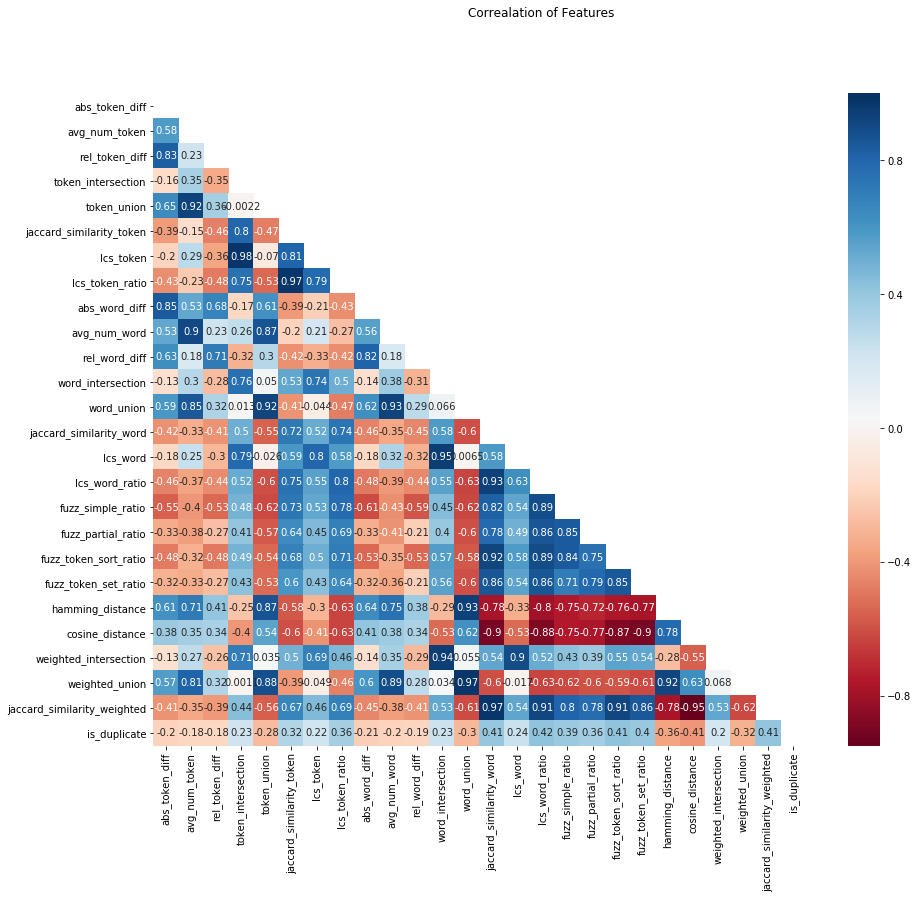

In [12]:
fig, ax = plt.subplots(figsize=(15,12))
fig.suptitle('Correalation of Features')

d = data[feats+[target]].corr()
mask = np.zeros_like(d, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = True

sns.heatmap(d, mask=mask, square=True, annot=True, cmap='RdBu')

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [14]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=2)
filepath = "model.h5"
ckpt = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

In [15]:
def build_network():
    model = Sequential()
    model.add(Dense(32,input_dim=len(feats), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

model = build_network()



history = model.fit(data[feats], data[target], validation_split=0.3, epochs=128, callbacks=[es, ckpt])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                832       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              33792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1025      
Total params: 35,649
Trainable params: 35,649
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 282886 samples, validate o

 52928/282886 [====>.........................] - ETA: 7:44:46 - loss: 0.6830 - acc: 0.59 - ETA: 36:18 - loss: 0.5932 - acc: 0.6659 - ETA: 27:08 - loss: 0.5698 - acc: 0.67 - ETA: 19:50 - loss: 0.5527 - acc: 0.67 - ETA: 14:22 - loss: 0.5496 - acc: 0.68 - ETA: 11:06 - loss: 0.5418 - acc: 0.68 - ETA: 11:04 - loss: 0.5420 - acc: 0.68 - ETA: 10:26 - loss: 0.5359 - acc: 0.68 - ETA: 8:59 - loss: 0.5307 - acc: 0.6844 - ETA: 7:35 - loss: 0.5298 - acc: 0.686 - ETA: 6:40 - loss: 0.5271 - acc: 0.688 - ETA: 5:50 - loss: 0.5257 - acc: 0.694 - ETA: 5:30 - loss: 0.5218 - acc: 0.696 - ETA: 5:16 - loss: 0.5228 - acc: 0.694 - ETA: 5:03 - loss: 0.5250 - acc: 0.692 - ETA: 4:47 - loss: 0.5246 - acc: 0.692 - ETA: 4:32 - loss: 0.5248 - acc: 0.693 - ETA: 4:21 - loss: 0.5259 - acc: 0.692 - ETA: 4:08 - loss: 0.5223 - acc: 0.695 - ETA: 3:46 - loss: 0.5181 - acc: 0.695 - ETA: 3:28 - loss: 0.5153 - acc: 0.696 - ETA: 3:17 - loss: 0.5162 - acc: 0.695 - ETA: 3:07 - loss: 0.5128 - acc: 0.698 - ETA: 2:59 - loss: 0.5112 -

123872/282886 [============>.................] - ETA: 1:01 - loss: 0.4947 - acc: 0.724 - ETA: 1:01 - loss: 0.4943 - acc: 0.724 - ETA: 1:00 - loss: 0.4942 - acc: 0.724 - ETA: 1:00 - loss: 0.4939 - acc: 0.724 - ETA: 1:00 - loss: 0.4938 - acc: 0.724 - ETA: 59s - loss: 0.4938 - acc: 0.724 - ETA: 59s - loss: 0.4936 - acc: 0.72 - ETA: 58s - loss: 0.4934 - acc: 0.72 - ETA: 58s - loss: 0.4935 - acc: 0.72 - ETA: 57s - loss: 0.4935 - acc: 0.72 - ETA: 57s - loss: 0.4935 - acc: 0.72 - ETA: 57s - loss: 0.4931 - acc: 0.72 - ETA: 56s - loss: 0.4929 - acc: 0.72 - ETA: 56s - loss: 0.4926 - acc: 0.72 - ETA: 56s - loss: 0.4927 - acc: 0.72 - ETA: 56s - loss: 0.4928 - acc: 0.72 - ETA: 56s - loss: 0.4928 - acc: 0.72 - ETA: 56s - loss: 0.4927 - acc: 0.72 - ETA: 56s - loss: 0.4928 - acc: 0.72 - ETA: 56s - loss: 0.4929 - acc: 0.72 - ETA: 55s - loss: 0.4928 - acc: 0.72 - ETA: 55s - loss: 0.4928 - acc: 0.72 - ETA: 55s - loss: 0.4928 - acc: 0.72 - ETA: 55s - loss: 0.4926 - acc: 0.72 - ETA: 54s - loss: 0.4924 - ac

161856/282886 [================>.............] - ETA: 32s - loss: 0.4867 - acc: 0.73 - ETA: 32s - loss: 0.4867 - acc: 0.73 - ETA: 32s - loss: 0.4866 - acc: 0.73 - ETA: 32s - loss: 0.4865 - acc: 0.73 - ETA: 32s - loss: 0.4865 - acc: 0.73 - ETA: 32s - loss: 0.4866 - acc: 0.73 - ETA: 32s - loss: 0.4866 - acc: 0.73 - ETA: 32s - loss: 0.4866 - acc: 0.73 - ETA: 32s - loss: 0.4866 - acc: 0.73 - ETA: 32s - loss: 0.4865 - acc: 0.73 - ETA: 32s - loss: 0.4865 - acc: 0.73 - ETA: 32s - loss: 0.4865 - acc: 0.73 - ETA: 32s - loss: 0.4865 - acc: 0.73 - ETA: 32s - loss: 0.4866 - acc: 0.73 - ETA: 32s - loss: 0.4865 - acc: 0.73 - ETA: 32s - loss: 0.4865 - acc: 0.73 - ETA: 32s - loss: 0.4865 - acc: 0.73 - ETA: 32s - loss: 0.4865 - acc: 0.73 - ETA: 32s - loss: 0.4864 - acc: 0.73 - ETA: 32s - loss: 0.4864 - acc: 0.73 - ETA: 32s - loss: 0.4864 - acc: 0.73 - ETA: 32s - loss: 0.4864 - acc: 0.73 - ETA: 32s - loss: 0.4863 - acc: 0.73 - ETA: 32s - loss: 0.4863 - acc: 0.73 - ETA: 32s - loss: 0.4863 - acc: 0.73 - E

193472/282886 [===================>..........] - ETA: 28s - loss: 0.4839 - acc: 0.73 - ETA: 28s - loss: 0.4838 - acc: 0.73 - ETA: 28s - loss: 0.4837 - acc: 0.73 - ETA: 28s - loss: 0.4838 - acc: 0.73 - ETA: 28s - loss: 0.4839 - acc: 0.73 - ETA: 28s - loss: 0.4839 - acc: 0.73 - ETA: 28s - loss: 0.4839 - acc: 0.73 - ETA: 27s - loss: 0.4839 - acc: 0.73 - ETA: 27s - loss: 0.4839 - acc: 0.73 - ETA: 27s - loss: 0.4838 - acc: 0.73 - ETA: 27s - loss: 0.4838 - acc: 0.73 - ETA: 27s - loss: 0.4837 - acc: 0.73 - ETA: 27s - loss: 0.4837 - acc: 0.73 - ETA: 27s - loss: 0.4837 - acc: 0.73 - ETA: 27s - loss: 0.4836 - acc: 0.73 - ETA: 27s - loss: 0.4836 - acc: 0.73 - ETA: 27s - loss: 0.4835 - acc: 0.73 - ETA: 27s - loss: 0.4836 - acc: 0.73 - ETA: 27s - loss: 0.4836 - acc: 0.73 - ETA: 27s - loss: 0.4836 - acc: 0.73 - ETA: 27s - loss: 0.4836 - acc: 0.73 - ETA: 27s - loss: 0.4836 - acc: 0.73 - ETA: 27s - loss: 0.4835 - acc: 0.73 - ETA: 27s - loss: 0.4835 - acc: 0.73 - ETA: 27s - loss: 0.4835 - acc: 0.73 - E

257664/282886 [==========================>...] - ETA: 23s - loss: 0.4816 - acc: 0.73 - ETA: 23s - loss: 0.4817 - acc: 0.73 - ETA: 23s - loss: 0.4817 - acc: 0.73 - ETA: 23s - loss: 0.4816 - acc: 0.73 - ETA: 23s - loss: 0.4817 - acc: 0.73 - ETA: 23s - loss: 0.4816 - acc: 0.73 - ETA: 22s - loss: 0.4816 - acc: 0.73 - ETA: 22s - loss: 0.4816 - acc: 0.73 - ETA: 22s - loss: 0.4816 - acc: 0.73 - ETA: 22s - loss: 0.4816 - acc: 0.73 - ETA: 22s - loss: 0.4816 - acc: 0.73 - ETA: 22s - loss: 0.4816 - acc: 0.73 - ETA: 22s - loss: 0.4815 - acc: 0.73 - ETA: 22s - loss: 0.4815 - acc: 0.73 - ETA: 22s - loss: 0.4816 - acc: 0.73 - ETA: 22s - loss: 0.4816 - acc: 0.73 - ETA: 22s - loss: 0.4816 - acc: 0.73 - ETA: 22s - loss: 0.4816 - acc: 0.73 - ETA: 22s - loss: 0.4816 - acc: 0.73 - ETA: 22s - loss: 0.4816 - acc: 0.73 - ETA: 22s - loss: 0.4816 - acc: 0.73 - ETA: 22s - loss: 0.4816 - acc: 0.73 - ETA: 22s - loss: 0.4816 - acc: 0.73 - ETA: 22s - loss: 0.4816 - acc: 0.73 - ETA: 22s - loss: 0.4816 - acc: 0.73 - E

282886/282886 [==============================] - ETA: 6s - loss: 0.4785 - acc: 0.738 - ETA: 5s - loss: 0.4785 - acc: 0.738 - ETA: 5s - loss: 0.4785 - acc: 0.738 - ETA: 5s - loss: 0.4785 - acc: 0.738 - ETA: 5s - loss: 0.4785 - acc: 0.738 - ETA: 5s - loss: 0.4785 - acc: 0.738 - ETA: 5s - loss: 0.4785 - acc: 0.738 - ETA: 5s - loss: 0.4785 - acc: 0.738 - ETA: 5s - loss: 0.4785 - acc: 0.738 - ETA: 5s - loss: 0.4785 - acc: 0.738 - ETA: 5s - loss: 0.4786 - acc: 0.738 - ETA: 5s - loss: 0.4786 - acc: 0.738 - ETA: 5s - loss: 0.4786 - acc: 0.738 - ETA: 5s - loss: 0.4786 - acc: 0.738 - ETA: 5s - loss: 0.4786 - acc: 0.738 - ETA: 5s - loss: 0.4786 - acc: 0.738 - ETA: 5s - loss: 0.4786 - acc: 0.738 - ETA: 5s - loss: 0.4786 - acc: 0.738 - ETA: 5s - loss: 0.4786 - acc: 0.738 - ETA: 5s - loss: 0.4786 - acc: 0.738 - ETA: 5s - loss: 0.4786 - acc: 0.738 - ETA: 5s - loss: 0.4786 - acc: 0.738 - ETA: 5s - loss: 0.4786 - acc: 0.738 - ETA: 5s - loss: 0.4786 - acc: 0.738 - ETA: 4s - loss: 0.4786 - acc: 0.738 - E

 74240/282886 [======>.......................] - ETA: 7:13 - loss: 0.4985 - acc: 0.687 - ETA: 1:53 - loss: 0.4972 - acc: 0.699 - ETA: 2:03 - loss: 0.5109 - acc: 0.710 - ETA: 1:53 - loss: 0.5110 - acc: 0.716 - ETA: 1:12 - loss: 0.5005 - acc: 0.727 - ETA: 57s - loss: 0.4879 - acc: 0.738 - ETA: 50s - loss: 0.4875 - acc: 0.73 - ETA: 51s - loss: 0.4755 - acc: 0.74 - ETA: 52s - loss: 0.4755 - acc: 0.73 - ETA: 48s - loss: 0.4716 - acc: 0.74 - ETA: 48s - loss: 0.4696 - acc: 0.74 - ETA: 46s - loss: 0.4665 - acc: 0.74 - ETA: 44s - loss: 0.4661 - acc: 0.74 - ETA: 42s - loss: 0.4665 - acc: 0.74 - ETA: 40s - loss: 0.4652 - acc: 0.74 - ETA: 39s - loss: 0.4659 - acc: 0.74 - ETA: 38s - loss: 0.4683 - acc: 0.74 - ETA: 38s - loss: 0.4661 - acc: 0.74 - ETA: 37s - loss: 0.4643 - acc: 0.74 - ETA: 37s - loss: 0.4654 - acc: 0.74 - ETA: 36s - loss: 0.4655 - acc: 0.74 - ETA: 36s - loss: 0.4648 - acc: 0.74 - ETA: 35s - loss: 0.4651 - acc: 0.74 - ETA: 36s - loss: 0.4656 - acc: 0.74 - ETA: 38s - loss: 0.4661 - ac

150848/282886 [==============>...............] - ETA: 31s - loss: 0.4661 - acc: 0.74 - ETA: 31s - loss: 0.4661 - acc: 0.74 - ETA: 31s - loss: 0.4662 - acc: 0.74 - ETA: 31s - loss: 0.4662 - acc: 0.74 - ETA: 31s - loss: 0.4663 - acc: 0.74 - ETA: 31s - loss: 0.4662 - acc: 0.74 - ETA: 31s - loss: 0.4659 - acc: 0.74 - ETA: 31s - loss: 0.4658 - acc: 0.74 - ETA: 30s - loss: 0.4656 - acc: 0.74 - ETA: 30s - loss: 0.4656 - acc: 0.74 - ETA: 30s - loss: 0.4655 - acc: 0.74 - ETA: 30s - loss: 0.4655 - acc: 0.74 - ETA: 30s - loss: 0.4656 - acc: 0.74 - ETA: 30s - loss: 0.4656 - acc: 0.74 - ETA: 30s - loss: 0.4655 - acc: 0.74 - ETA: 30s - loss: 0.4654 - acc: 0.74 - ETA: 30s - loss: 0.4655 - acc: 0.74 - ETA: 30s - loss: 0.4654 - acc: 0.74 - ETA: 30s - loss: 0.4655 - acc: 0.74 - ETA: 30s - loss: 0.4655 - acc: 0.74 - ETA: 30s - loss: 0.4655 - acc: 0.74 - ETA: 29s - loss: 0.4655 - acc: 0.74 - ETA: 29s - loss: 0.4657 - acc: 0.74 - ETA: 29s - loss: 0.4657 - acc: 0.74 - ETA: 29s - loss: 0.4657 - acc: 0.74 - E

222080/282886 [======================>.......] - ETA: 19s - loss: 0.4653 - acc: 0.74 - ETA: 19s - loss: 0.4653 - acc: 0.74 - ETA: 19s - loss: 0.4652 - acc: 0.74 - ETA: 19s - loss: 0.4652 - acc: 0.74 - ETA: 19s - loss: 0.4653 - acc: 0.74 - ETA: 19s - loss: 0.4654 - acc: 0.74 - ETA: 19s - loss: 0.4654 - acc: 0.74 - ETA: 19s - loss: 0.4654 - acc: 0.74 - ETA: 19s - loss: 0.4654 - acc: 0.74 - ETA: 19s - loss: 0.4654 - acc: 0.74 - ETA: 19s - loss: 0.4655 - acc: 0.74 - ETA: 19s - loss: 0.4655 - acc: 0.74 - ETA: 19s - loss: 0.4654 - acc: 0.74 - ETA: 19s - loss: 0.4654 - acc: 0.74 - ETA: 19s - loss: 0.4654 - acc: 0.74 - ETA: 19s - loss: 0.4654 - acc: 0.74 - ETA: 19s - loss: 0.4654 - acc: 0.74 - ETA: 19s - loss: 0.4654 - acc: 0.74 - ETA: 19s - loss: 0.4654 - acc: 0.74 - ETA: 19s - loss: 0.4654 - acc: 0.74 - ETA: 18s - loss: 0.4654 - acc: 0.74 - ETA: 18s - loss: 0.4654 - acc: 0.74 - ETA: 18s - loss: 0.4655 - acc: 0.74 - ETA: 18s - loss: 0.4655 - acc: 0.74 - ETA: 18s - loss: 0.4656 - acc: 0.74 - E

282886/282886 [==============================] - ETA: 9s - loss: 0.4638 - acc: 0.750 - ETA: 9s - loss: 0.4637 - acc: 0.750 - ETA: 9s - loss: 0.4637 - acc: 0.750 - ETA: 9s - loss: 0.4637 - acc: 0.750 - ETA: 9s - loss: 0.4638 - acc: 0.750 - ETA: 8s - loss: 0.4637 - acc: 0.750 - ETA: 8s - loss: 0.4637 - acc: 0.750 - ETA: 8s - loss: 0.4637 - acc: 0.750 - ETA: 8s - loss: 0.4637 - acc: 0.750 - ETA: 8s - loss: 0.4636 - acc: 0.750 - ETA: 8s - loss: 0.4635 - acc: 0.750 - ETA: 8s - loss: 0.4636 - acc: 0.750 - ETA: 8s - loss: 0.4636 - acc: 0.750 - ETA: 8s - loss: 0.4637 - acc: 0.750 - ETA: 8s - loss: 0.4637 - acc: 0.750 - ETA: 8s - loss: 0.4636 - acc: 0.750 - ETA: 8s - loss: 0.4636 - acc: 0.750 - ETA: 8s - loss: 0.4636 - acc: 0.750 - ETA: 8s - loss: 0.4636 - acc: 0.750 - ETA: 8s - loss: 0.4636 - acc: 0.750 - ETA: 8s - loss: 0.4636 - acc: 0.750 - ETA: 8s - loss: 0.4636 - acc: 0.750 - ETA: 7s - loss: 0.4636 - acc: 0.750 - ETA: 7s - loss: 0.4636 - acc: 0.750 - ETA: 7s - loss: 0.4636 - acc: 0.750 - E

 73824/282886 [======>.......................] - ETA: 5:53 - loss: 0.3311 - acc: 0.812 - ETA: 5:04 - loss: 0.3833 - acc: 0.781 - ETA: 1:43 - loss: 0.4307 - acc: 0.777 - ETA: 1:18 - loss: 0.4549 - acc: 0.767 - ETA: 1:07 - loss: 0.4559 - acc: 0.777 - ETA: 1:00 - loss: 0.4518 - acc: 0.774 - ETA: 54s - loss: 0.4521 - acc: 0.770 - ETA: 55s - loss: 0.4561 - acc: 0.77 - ETA: 53s - loss: 0.4530 - acc: 0.77 - ETA: 52s - loss: 0.4518 - acc: 0.76 - ETA: 50s - loss: 0.4527 - acc: 0.76 - ETA: 50s - loss: 0.4491 - acc: 0.76 - ETA: 51s - loss: 0.4524 - acc: 0.76 - ETA: 49s - loss: 0.4498 - acc: 0.76 - ETA: 47s - loss: 0.4502 - acc: 0.76 - ETA: 45s - loss: 0.4508 - acc: 0.76 - ETA: 45s - loss: 0.4524 - acc: 0.76 - ETA: 45s - loss: 0.4518 - acc: 0.76 - ETA: 45s - loss: 0.4536 - acc: 0.76 - ETA: 45s - loss: 0.4530 - acc: 0.76 - ETA: 46s - loss: 0.4538 - acc: 0.76 - ETA: 48s - loss: 0.4539 - acc: 0.76 - ETA: 50s - loss: 0.4548 - acc: 0.76 - ETA: 51s - loss: 0.4543 - acc: 0.76 - ETA: 52s - loss: 0.4547 - 

148768/282886 [==============>...............] - ETA: 31s - loss: 0.4591 - acc: 0.75 - ETA: 31s - loss: 0.4591 - acc: 0.75 - ETA: 31s - loss: 0.4592 - acc: 0.75 - ETA: 31s - loss: 0.4591 - acc: 0.75 - ETA: 31s - loss: 0.4590 - acc: 0.75 - ETA: 31s - loss: 0.4591 - acc: 0.75 - ETA: 31s - loss: 0.4592 - acc: 0.75 - ETA: 31s - loss: 0.4593 - acc: 0.75 - ETA: 31s - loss: 0.4593 - acc: 0.75 - ETA: 31s - loss: 0.4592 - acc: 0.75 - ETA: 31s - loss: 0.4591 - acc: 0.75 - ETA: 31s - loss: 0.4592 - acc: 0.75 - ETA: 31s - loss: 0.4592 - acc: 0.75 - ETA: 31s - loss: 0.4590 - acc: 0.75 - ETA: 31s - loss: 0.4591 - acc: 0.75 - ETA: 31s - loss: 0.4591 - acc: 0.75 - ETA: 31s - loss: 0.4592 - acc: 0.75 - ETA: 31s - loss: 0.4592 - acc: 0.75 - ETA: 31s - loss: 0.4592 - acc: 0.75 - ETA: 31s - loss: 0.4591 - acc: 0.75 - ETA: 31s - loss: 0.4592 - acc: 0.75 - ETA: 31s - loss: 0.4594 - acc: 0.75 - ETA: 31s - loss: 0.4594 - acc: 0.75 - ETA: 31s - loss: 0.4593 - acc: 0.75 - ETA: 30s - loss: 0.4593 - acc: 0.75 - E

222144/282886 [======================>.......] - ETA: 20s - loss: 0.4601 - acc: 0.75 - ETA: 20s - loss: 0.4601 - acc: 0.75 - ETA: 20s - loss: 0.4601 - acc: 0.75 - ETA: 20s - loss: 0.4601 - acc: 0.75 - ETA: 20s - loss: 0.4601 - acc: 0.75 - ETA: 20s - loss: 0.4601 - acc: 0.75 - ETA: 19s - loss: 0.4601 - acc: 0.75 - ETA: 19s - loss: 0.4602 - acc: 0.75 - ETA: 19s - loss: 0.4602 - acc: 0.75 - ETA: 19s - loss: 0.4603 - acc: 0.75 - ETA: 19s - loss: 0.4603 - acc: 0.75 - ETA: 19s - loss: 0.4602 - acc: 0.75 - ETA: 19s - loss: 0.4602 - acc: 0.75 - ETA: 19s - loss: 0.4602 - acc: 0.75 - ETA: 19s - loss: 0.4602 - acc: 0.75 - ETA: 19s - loss: 0.4602 - acc: 0.75 - ETA: 19s - loss: 0.4602 - acc: 0.75 - ETA: 19s - loss: 0.4601 - acc: 0.75 - ETA: 18s - loss: 0.4602 - acc: 0.75 - ETA: 18s - loss: 0.4601 - acc: 0.75 - ETA: 18s - loss: 0.4601 - acc: 0.75 - ETA: 18s - loss: 0.4600 - acc: 0.75 - ETA: 18s - loss: 0.4599 - acc: 0.75 - ETA: 18s - loss: 0.4600 - acc: 0.75 - ETA: 18s - loss: 0.4600 - acc: 0.75 - E

282886/282886 [==============================] - ETA: 9s - loss: 0.4594 - acc: 0.754 - ETA: 9s - loss: 0.4593 - acc: 0.754 - ETA: 9s - loss: 0.4593 - acc: 0.754 - ETA: 8s - loss: 0.4593 - acc: 0.754 - ETA: 8s - loss: 0.4593 - acc: 0.754 - ETA: 8s - loss: 0.4592 - acc: 0.754 - ETA: 8s - loss: 0.4592 - acc: 0.754 - ETA: 8s - loss: 0.4591 - acc: 0.754 - ETA: 8s - loss: 0.4592 - acc: 0.754 - ETA: 8s - loss: 0.4592 - acc: 0.754 - ETA: 8s - loss: 0.4592 - acc: 0.754 - ETA: 8s - loss: 0.4592 - acc: 0.754 - ETA: 8s - loss: 0.4592 - acc: 0.754 - ETA: 8s - loss: 0.4592 - acc: 0.754 - ETA: 8s - loss: 0.4592 - acc: 0.754 - ETA: 8s - loss: 0.4592 - acc: 0.754 - ETA: 8s - loss: 0.4593 - acc: 0.754 - ETA: 8s - loss: 0.4592 - acc: 0.754 - ETA: 8s - loss: 0.4592 - acc: 0.754 - ETA: 8s - loss: 0.4592 - acc: 0.754 - ETA: 7s - loss: 0.4592 - acc: 0.754 - ETA: 7s - loss: 0.4592 - acc: 0.754 - ETA: 7s - loss: 0.4592 - acc: 0.754 - ETA: 7s - loss: 0.4593 - acc: 0.754 - ETA: 7s - loss: 0.4593 - acc: 0.754 - E

 63360/282886 [=====>........................] - ETA: 5:00 - loss: 0.4369 - acc: 0.750 - ETA: 3:23 - loss: 0.5326 - acc: 0.710 - ETA: 2:26 - loss: 0.4724 - acc: 0.729 - ETA: 1:20 - loss: 0.4587 - acc: 0.754 - ETA: 1:05 - loss: 0.4612 - acc: 0.752 - ETA: 58s - loss: 0.4613 - acc: 0.749 - ETA: 52s - loss: 0.4517 - acc: 0.75 - ETA: 50s - loss: 0.4517 - acc: 0.76 - ETA: 46s - loss: 0.4501 - acc: 0.75 - ETA: 45s - loss: 0.4488 - acc: 0.76 - ETA: 45s - loss: 0.4522 - acc: 0.75 - ETA: 44s - loss: 0.4490 - acc: 0.76 - ETA: 43s - loss: 0.4470 - acc: 0.76 - ETA: 42s - loss: 0.4464 - acc: 0.76 - ETA: 41s - loss: 0.4474 - acc: 0.76 - ETA: 41s - loss: 0.4474 - acc: 0.76 - ETA: 43s - loss: 0.4470 - acc: 0.76 - ETA: 45s - loss: 0.4471 - acc: 0.76 - ETA: 46s - loss: 0.4472 - acc: 0.76 - ETA: 47s - loss: 0.4490 - acc: 0.76 - ETA: 47s - loss: 0.4508 - acc: 0.76 - ETA: 46s - loss: 0.4512 - acc: 0.76 - ETA: 46s - loss: 0.4506 - acc: 0.76 - ETA: 47s - loss: 0.4508 - acc: 0.76 - ETA: 46s - loss: 0.4497 - ac

127136/282886 [============>.................] - ETA: 39s - loss: 0.4570 - acc: 0.75 - ETA: 39s - loss: 0.4568 - acc: 0.75 - ETA: 39s - loss: 0.4568 - acc: 0.75 - ETA: 39s - loss: 0.4569 - acc: 0.75 - ETA: 38s - loss: 0.4570 - acc: 0.75 - ETA: 39s - loss: 0.4569 - acc: 0.75 - ETA: 39s - loss: 0.4569 - acc: 0.75 - ETA: 38s - loss: 0.4570 - acc: 0.75 - ETA: 38s - loss: 0.4570 - acc: 0.75 - ETA: 38s - loss: 0.4570 - acc: 0.75 - ETA: 38s - loss: 0.4572 - acc: 0.75 - ETA: 38s - loss: 0.4573 - acc: 0.75 - ETA: 38s - loss: 0.4572 - acc: 0.75 - ETA: 38s - loss: 0.4571 - acc: 0.75 - ETA: 38s - loss: 0.4572 - acc: 0.75 - ETA: 38s - loss: 0.4573 - acc: 0.75 - ETA: 38s - loss: 0.4575 - acc: 0.75 - ETA: 38s - loss: 0.4575 - acc: 0.75 - ETA: 37s - loss: 0.4575 - acc: 0.75 - ETA: 37s - loss: 0.4574 - acc: 0.75 - ETA: 37s - loss: 0.4574 - acc: 0.75 - ETA: 37s - loss: 0.4573 - acc: 0.75 - ETA: 37s - loss: 0.4574 - acc: 0.75 - ETA: 37s - loss: 0.4574 - acc: 0.75 - ETA: 37s - loss: 0.4573 - acc: 0.75 - E

187488/282886 [==================>...........] - ETA: 27s - loss: 0.4573 - acc: 0.75 - ETA: 27s - loss: 0.4573 - acc: 0.75 - ETA: 27s - loss: 0.4573 - acc: 0.75 - ETA: 27s - loss: 0.4574 - acc: 0.75 - ETA: 27s - loss: 0.4574 - acc: 0.75 - ETA: 27s - loss: 0.4573 - acc: 0.75 - ETA: 27s - loss: 0.4573 - acc: 0.75 - ETA: 27s - loss: 0.4573 - acc: 0.75 - ETA: 27s - loss: 0.4572 - acc: 0.75 - ETA: 27s - loss: 0.4571 - acc: 0.75 - ETA: 27s - loss: 0.4572 - acc: 0.75 - ETA: 27s - loss: 0.4571 - acc: 0.75 - ETA: 27s - loss: 0.4571 - acc: 0.75 - ETA: 27s - loss: 0.4572 - acc: 0.75 - ETA: 27s - loss: 0.4572 - acc: 0.75 - ETA: 27s - loss: 0.4572 - acc: 0.75 - ETA: 26s - loss: 0.4573 - acc: 0.75 - ETA: 26s - loss: 0.4574 - acc: 0.75 - ETA: 26s - loss: 0.4573 - acc: 0.75 - ETA: 26s - loss: 0.4574 - acc: 0.75 - ETA: 26s - loss: 0.4574 - acc: 0.75 - ETA: 26s - loss: 0.4574 - acc: 0.75 - ETA: 26s - loss: 0.4573 - acc: 0.75 - ETA: 26s - loss: 0.4574 - acc: 0.75 - ETA: 26s - loss: 0.4574 - acc: 0.75 - E

244224/282886 [========================>.....] - ETA: 17s - loss: 0.4571 - acc: 0.75 - ETA: 17s - loss: 0.4571 - acc: 0.75 - ETA: 17s - loss: 0.4571 - acc: 0.75 - ETA: 17s - loss: 0.4572 - acc: 0.75 - ETA: 17s - loss: 0.4572 - acc: 0.75 - ETA: 16s - loss: 0.4571 - acc: 0.75 - ETA: 16s - loss: 0.4571 - acc: 0.75 - ETA: 16s - loss: 0.4571 - acc: 0.75 - ETA: 16s - loss: 0.4571 - acc: 0.75 - ETA: 16s - loss: 0.4571 - acc: 0.75 - ETA: 16s - loss: 0.4571 - acc: 0.75 - ETA: 16s - loss: 0.4571 - acc: 0.75 - ETA: 16s - loss: 0.4571 - acc: 0.75 - ETA: 16s - loss: 0.4571 - acc: 0.75 - ETA: 16s - loss: 0.4570 - acc: 0.75 - ETA: 16s - loss: 0.4571 - acc: 0.75 - ETA: 16s - loss: 0.4571 - acc: 0.75 - ETA: 16s - loss: 0.4570 - acc: 0.75 - ETA: 16s - loss: 0.4570 - acc: 0.75 - ETA: 16s - loss: 0.4571 - acc: 0.75 - ETA: 16s - loss: 0.4571 - acc: 0.75 - ETA: 16s - loss: 0.4571 - acc: 0.75 - ETA: 16s - loss: 0.4571 - acc: 0.75 - ETA: 16s - loss: 0.4571 - acc: 0.75 - ETA: 16s - loss: 0.4571 - acc: 0.75 - E

282886/282886 [==============================] - ETA: 7s - loss: 0.4562 - acc: 0.756 - ETA: 7s - loss: 0.4563 - acc: 0.756 - ETA: 6s - loss: 0.4563 - acc: 0.756 - ETA: 6s - loss: 0.4563 - acc: 0.756 - ETA: 6s - loss: 0.4562 - acc: 0.756 - ETA: 6s - loss: 0.4562 - acc: 0.756 - ETA: 6s - loss: 0.4562 - acc: 0.756 - ETA: 6s - loss: 0.4562 - acc: 0.756 - ETA: 6s - loss: 0.4562 - acc: 0.756 - ETA: 6s - loss: 0.4561 - acc: 0.756 - ETA: 6s - loss: 0.4561 - acc: 0.756 - ETA: 6s - loss: 0.4561 - acc: 0.756 - ETA: 6s - loss: 0.4561 - acc: 0.756 - ETA: 6s - loss: 0.4561 - acc: 0.756 - ETA: 6s - loss: 0.4561 - acc: 0.756 - ETA: 6s - loss: 0.4561 - acc: 0.756 - ETA: 6s - loss: 0.4561 - acc: 0.756 - ETA: 6s - loss: 0.4561 - acc: 0.756 - ETA: 6s - loss: 0.4561 - acc: 0.756 - ETA: 5s - loss: 0.4561 - acc: 0.756 - ETA: 5s - loss: 0.4562 - acc: 0.756 - ETA: 5s - loss: 0.4562 - acc: 0.756 - ETA: 5s - loss: 0.4562 - acc: 0.756 - ETA: 5s - loss: 0.4561 - acc: 0.756 - ETA: 5s - loss: 0.4562 - acc: 0.756 - E

 68096/282886 [======>.......................] - ETA: 5:00 - loss: 0.4142 - acc: 0.843 - ETA: 50s - loss: 0.4594 - acc: 0.747 - ETA: 45s - loss: 0.4630 - acc: 0.75 - ETA: 44s - loss: 0.4543 - acc: 0.77 - ETA: 41s - loss: 0.4621 - acc: 0.75 - ETA: 40s - loss: 0.4627 - acc: 0.75 - ETA: 41s - loss: 0.4618 - acc: 0.75 - ETA: 43s - loss: 0.4581 - acc: 0.75 - ETA: 45s - loss: 0.4563 - acc: 0.75 - ETA: 48s - loss: 0.4539 - acc: 0.76 - ETA: 48s - loss: 0.4517 - acc: 0.76 - ETA: 48s - loss: 0.4532 - acc: 0.76 - ETA: 48s - loss: 0.4563 - acc: 0.76 - ETA: 48s - loss: 0.4524 - acc: 0.76 - ETA: 50s - loss: 0.4522 - acc: 0.76 - ETA: 52s - loss: 0.4538 - acc: 0.76 - ETA: 51s - loss: 0.4492 - acc: 0.76 - ETA: 49s - loss: 0.4509 - acc: 0.76 - ETA: 47s - loss: 0.4534 - acc: 0.75 - ETA: 46s - loss: 0.4518 - acc: 0.76 - ETA: 44s - loss: 0.4525 - acc: 0.75 - ETA: 44s - loss: 0.4524 - acc: 0.75 - ETA: 43s - loss: 0.4506 - acc: 0.75 - ETA: 42s - loss: 0.4520 - acc: 0.75 - ETA: 42s - loss: 0.4515 - acc: 0.75 

140512/282886 [=============>................] - ETA: 35s - loss: 0.4534 - acc: 0.75 - ETA: 35s - loss: 0.4534 - acc: 0.75 - ETA: 35s - loss: 0.4536 - acc: 0.75 - ETA: 35s - loss: 0.4537 - acc: 0.75 - ETA: 35s - loss: 0.4538 - acc: 0.75 - ETA: 35s - loss: 0.4536 - acc: 0.75 - ETA: 35s - loss: 0.4535 - acc: 0.75 - ETA: 34s - loss: 0.4536 - acc: 0.75 - ETA: 35s - loss: 0.4536 - acc: 0.75 - ETA: 34s - loss: 0.4536 - acc: 0.75 - ETA: 34s - loss: 0.4537 - acc: 0.75 - ETA: 34s - loss: 0.4535 - acc: 0.75 - ETA: 34s - loss: 0.4536 - acc: 0.75 - ETA: 34s - loss: 0.4536 - acc: 0.75 - ETA: 34s - loss: 0.4538 - acc: 0.75 - ETA: 34s - loss: 0.4537 - acc: 0.75 - ETA: 34s - loss: 0.4539 - acc: 0.75 - ETA: 35s - loss: 0.4541 - acc: 0.75 - ETA: 35s - loss: 0.4542 - acc: 0.75 - ETA: 35s - loss: 0.4541 - acc: 0.75 - ETA: 35s - loss: 0.4541 - acc: 0.75 - ETA: 35s - loss: 0.4541 - acc: 0.75 - ETA: 35s - loss: 0.4541 - acc: 0.75 - ETA: 35s - loss: 0.4541 - acc: 0.75 - ETA: 35s - loss: 0.4541 - acc: 0.75 - E

215968/282886 [=====================>........] - ETA: 22s - loss: 0.4553 - acc: 0.75 - ETA: 22s - loss: 0.4553 - acc: 0.75 - ETA: 22s - loss: 0.4553 - acc: 0.75 - ETA: 22s - loss: 0.4554 - acc: 0.75 - ETA: 22s - loss: 0.4555 - acc: 0.75 - ETA: 22s - loss: 0.4554 - acc: 0.75 - ETA: 22s - loss: 0.4553 - acc: 0.75 - ETA: 22s - loss: 0.4552 - acc: 0.75 - ETA: 22s - loss: 0.4551 - acc: 0.75 - ETA: 22s - loss: 0.4550 - acc: 0.75 - ETA: 22s - loss: 0.4550 - acc: 0.75 - ETA: 22s - loss: 0.4549 - acc: 0.75 - ETA: 22s - loss: 0.4550 - acc: 0.75 - ETA: 22s - loss: 0.4549 - acc: 0.75 - ETA: 22s - loss: 0.4549 - acc: 0.75 - ETA: 22s - loss: 0.4548 - acc: 0.75 - ETA: 22s - loss: 0.4548 - acc: 0.75 - ETA: 21s - loss: 0.4548 - acc: 0.75 - ETA: 21s - loss: 0.4549 - acc: 0.75 - ETA: 21s - loss: 0.4550 - acc: 0.75 - ETA: 21s - loss: 0.4550 - acc: 0.75 - ETA: 21s - loss: 0.4550 - acc: 0.75 - ETA: 21s - loss: 0.4552 - acc: 0.75 - ETA: 21s - loss: 0.4551 - acc: 0.75 - ETA: 21s - loss: 0.4552 - acc: 0.75 - E

281696/282886 [============================>.] - ETA: 10s - loss: 0.4546 - acc: 0.75 - ETA: 10s - loss: 0.4546 - acc: 0.75 - ETA: 10s - loss: 0.4546 - acc: 0.75 - ETA: 10s - loss: 0.4546 - acc: 0.75 - ETA: 10s - loss: 0.4546 - acc: 0.75 - ETA: 10s - loss: 0.4546 - acc: 0.75 - ETA: 10s - loss: 0.4546 - acc: 0.75 - ETA: 10s - loss: 0.4546 - acc: 0.75 - ETA: 10s - loss: 0.4547 - acc: 0.75 - ETA: 10s - loss: 0.4547 - acc: 0.75 - ETA: 10s - loss: 0.4547 - acc: 0.75 - ETA: 10s - loss: 0.4547 - acc: 0.75 - ETA: 10s - loss: 0.4547 - acc: 0.75 - ETA: 10s - loss: 0.4547 - acc: 0.75 - ETA: 10s - loss: 0.4548 - acc: 0.75 - ETA: 10s - loss: 0.4548 - acc: 0.75 - ETA: 10s - loss: 0.4548 - acc: 0.75 - ETA: 10s - loss: 0.4548 - acc: 0.75 - ETA: 10s - loss: 0.4549 - acc: 0.75 - ETA: 9s - loss: 0.4549 - acc: 0.7572 - ETA: 9s - loss: 0.4549 - acc: 0.757 - ETA: 9s - loss: 0.4549 - acc: 0.757 - ETA: 9s - loss: 0.4549 - acc: 0.757 - ETA: 9s - loss: 0.4548 - acc: 0.757 - ETA: 9s - loss: 0.4548 - acc: 0.757 - 

282886/282886 [==============================] - ETA: 0s - loss: 0.4547 - acc: 0.758 - ETA: 0s - loss: 0.4547 - acc: 0.757 - ETA: 0s - loss: 0.4547 - acc: 0.757 - 49s 174us/step - loss: 0.4548 - acc: 0.7579 - val_loss: 0.4561 - val_acc: 0.7658

Epoch 00005: loss improved from 0.45640 to 0.45475, saving model to model.h5
Epoch 6/128


 80128/282886 [=======>......................] - ETA: 4:43 - loss: 0.5017 - acc: 0.687 - ETA: 43s - loss: 0.4629 - acc: 0.740 - ETA: 36s - loss: 0.4564 - acc: 0.74 - ETA: 32s - loss: 0.4507 - acc: 0.75 - ETA: 30s - loss: 0.4556 - acc: 0.74 - ETA: 30s - loss: 0.4515 - acc: 0.74 - ETA: 31s - loss: 0.4521 - acc: 0.74 - ETA: 33s - loss: 0.4591 - acc: 0.74 - ETA: 34s - loss: 0.4590 - acc: 0.74 - ETA: 37s - loss: 0.4604 - acc: 0.74 - ETA: 39s - loss: 0.4607 - acc: 0.74 - ETA: 40s - loss: 0.4616 - acc: 0.74 - ETA: 41s - loss: 0.4642 - acc: 0.74 - ETA: 42s - loss: 0.4638 - acc: 0.74 - ETA: 44s - loss: 0.4616 - acc: 0.74 - ETA: 46s - loss: 0.4621 - acc: 0.74 - ETA: 46s - loss: 0.4608 - acc: 0.74 - ETA: 44s - loss: 0.4618 - acc: 0.74 - ETA: 42s - loss: 0.4609 - acc: 0.74 - ETA: 42s - loss: 0.4574 - acc: 0.75 - ETA: 40s - loss: 0.4588 - acc: 0.75 - ETA: 39s - loss: 0.4596 - acc: 0.75 - ETA: 39s - loss: 0.4591 - acc: 0.75 - ETA: 38s - loss: 0.4596 - acc: 0.75 - ETA: 37s - loss: 0.4594 - acc: 0.75 

161472/282886 [================>.............] - ETA: 28s - loss: 0.4533 - acc: 0.75 - ETA: 28s - loss: 0.4531 - acc: 0.75 - ETA: 27s - loss: 0.4532 - acc: 0.75 - ETA: 27s - loss: 0.4533 - acc: 0.75 - ETA: 27s - loss: 0.4531 - acc: 0.75 - ETA: 27s - loss: 0.4529 - acc: 0.75 - ETA: 27s - loss: 0.4530 - acc: 0.75 - ETA: 27s - loss: 0.4529 - acc: 0.75 - ETA: 27s - loss: 0.4529 - acc: 0.75 - ETA: 27s - loss: 0.4530 - acc: 0.75 - ETA: 27s - loss: 0.4530 - acc: 0.75 - ETA: 27s - loss: 0.4529 - acc: 0.75 - ETA: 26s - loss: 0.4528 - acc: 0.75 - ETA: 26s - loss: 0.4528 - acc: 0.75 - ETA: 26s - loss: 0.4527 - acc: 0.75 - ETA: 26s - loss: 0.4527 - acc: 0.75 - ETA: 26s - loss: 0.4526 - acc: 0.75 - ETA: 26s - loss: 0.4525 - acc: 0.75 - ETA: 26s - loss: 0.4528 - acc: 0.75 - ETA: 26s - loss: 0.4528 - acc: 0.75 - ETA: 26s - loss: 0.4529 - acc: 0.75 - ETA: 26s - loss: 0.4529 - acc: 0.75 - ETA: 26s - loss: 0.4529 - acc: 0.75 - ETA: 26s - loss: 0.4528 - acc: 0.75 - ETA: 26s - loss: 0.4528 - acc: 0.75 - E

243040/282886 [========================>.....] - ETA: 16s - loss: 0.4544 - acc: 0.75 - ETA: 16s - loss: 0.4545 - acc: 0.75 - ETA: 16s - loss: 0.4544 - acc: 0.75 - ETA: 16s - loss: 0.4545 - acc: 0.75 - ETA: 16s - loss: 0.4545 - acc: 0.75 - ETA: 16s - loss: 0.4545 - acc: 0.75 - ETA: 16s - loss: 0.4545 - acc: 0.75 - ETA: 16s - loss: 0.4545 - acc: 0.75 - ETA: 16s - loss: 0.4545 - acc: 0.75 - ETA: 16s - loss: 0.4546 - acc: 0.75 - ETA: 16s - loss: 0.4546 - acc: 0.75 - ETA: 16s - loss: 0.4547 - acc: 0.75 - ETA: 16s - loss: 0.4547 - acc: 0.75 - ETA: 16s - loss: 0.4547 - acc: 0.75 - ETA: 16s - loss: 0.4546 - acc: 0.75 - ETA: 16s - loss: 0.4546 - acc: 0.75 - ETA: 16s - loss: 0.4546 - acc: 0.75 - ETA: 16s - loss: 0.4546 - acc: 0.75 - ETA: 16s - loss: 0.4547 - acc: 0.75 - ETA: 16s - loss: 0.4546 - acc: 0.75 - ETA: 16s - loss: 0.4546 - acc: 0.75 - ETA: 16s - loss: 0.4545 - acc: 0.75 - ETA: 15s - loss: 0.4545 - acc: 0.75 - ETA: 15s - loss: 0.4544 - acc: 0.75 - ETA: 15s - loss: 0.4544 - acc: 0.75 - E

282886/282886 [==============================] - ETA: 5s - loss: 0.4536 - acc: 0.758 - ETA: 5s - loss: 0.4536 - acc: 0.758 - ETA: 5s - loss: 0.4536 - acc: 0.758 - ETA: 5s - loss: 0.4535 - acc: 0.759 - ETA: 5s - loss: 0.4535 - acc: 0.758 - ETA: 5s - loss: 0.4536 - acc: 0.758 - ETA: 5s - loss: 0.4535 - acc: 0.758 - ETA: 5s - loss: 0.4535 - acc: 0.758 - ETA: 5s - loss: 0.4535 - acc: 0.758 - ETA: 5s - loss: 0.4534 - acc: 0.758 - ETA: 4s - loss: 0.4534 - acc: 0.758 - ETA: 4s - loss: 0.4534 - acc: 0.758 - ETA: 4s - loss: 0.4534 - acc: 0.758 - ETA: 4s - loss: 0.4535 - acc: 0.758 - ETA: 4s - loss: 0.4534 - acc: 0.758 - ETA: 4s - loss: 0.4534 - acc: 0.758 - ETA: 4s - loss: 0.4534 - acc: 0.758 - ETA: 4s - loss: 0.4533 - acc: 0.758 - ETA: 4s - loss: 0.4534 - acc: 0.758 - ETA: 4s - loss: 0.4534 - acc: 0.758 - ETA: 4s - loss: 0.4534 - acc: 0.758 - ETA: 4s - loss: 0.4534 - acc: 0.758 - ETA: 4s - loss: 0.4534 - acc: 0.758 - ETA: 4s - loss: 0.4533 - acc: 0.759 - ETA: 4s - loss: 0.4533 - acc: 0.759 - E

 78816/282886 [=======>......................] - ETA: 5:17 - loss: 0.4077 - acc: 0.812 - ETA: 1:36 - loss: 0.4404 - acc: 0.753 - ETA: 1:17 - loss: 0.4314 - acc: 0.773 - ETA: 1:14 - loss: 0.4456 - acc: 0.774 - ETA: 1:03 - loss: 0.4472 - acc: 0.765 - ETA: 55s - loss: 0.4415 - acc: 0.763 - ETA: 58s - loss: 0.4535 - acc: 0.75 - ETA: 58s - loss: 0.4552 - acc: 0.75 - ETA: 56s - loss: 0.4607 - acc: 0.74 - ETA: 54s - loss: 0.4553 - acc: 0.75 - ETA: 52s - loss: 0.4594 - acc: 0.75 - ETA: 52s - loss: 0.4534 - acc: 0.75 - ETA: 49s - loss: 0.4587 - acc: 0.75 - ETA: 47s - loss: 0.4585 - acc: 0.75 - ETA: 45s - loss: 0.4609 - acc: 0.74 - ETA: 44s - loss: 0.4591 - acc: 0.75 - ETA: 43s - loss: 0.4599 - acc: 0.75 - ETA: 42s - loss: 0.4609 - acc: 0.74 - ETA: 41s - loss: 0.4598 - acc: 0.75 - ETA: 40s - loss: 0.4605 - acc: 0.74 - ETA: 41s - loss: 0.4633 - acc: 0.74 - ETA: 42s - loss: 0.4626 - acc: 0.74 - ETA: 43s - loss: 0.4634 - acc: 0.74 - ETA: 43s - loss: 0.4622 - acc: 0.74 - ETA: 43s - loss: 0.4613 - ac

159808/282886 [===============>..............] - ETA: 28s - loss: 0.4538 - acc: 0.76 - ETA: 28s - loss: 0.4537 - acc: 0.76 - ETA: 28s - loss: 0.4536 - acc: 0.76 - ETA: 28s - loss: 0.4535 - acc: 0.76 - ETA: 28s - loss: 0.4533 - acc: 0.76 - ETA: 28s - loss: 0.4535 - acc: 0.76 - ETA: 28s - loss: 0.4535 - acc: 0.76 - ETA: 28s - loss: 0.4535 - acc: 0.76 - ETA: 28s - loss: 0.4535 - acc: 0.76 - ETA: 28s - loss: 0.4535 - acc: 0.76 - ETA: 28s - loss: 0.4535 - acc: 0.76 - ETA: 28s - loss: 0.4536 - acc: 0.76 - ETA: 28s - loss: 0.4534 - acc: 0.76 - ETA: 28s - loss: 0.4533 - acc: 0.76 - ETA: 28s - loss: 0.4532 - acc: 0.76 - ETA: 28s - loss: 0.4531 - acc: 0.76 - ETA: 28s - loss: 0.4531 - acc: 0.76 - ETA: 27s - loss: 0.4529 - acc: 0.76 - ETA: 27s - loss: 0.4529 - acc: 0.76 - ETA: 27s - loss: 0.4530 - acc: 0.76 - ETA: 27s - loss: 0.4530 - acc: 0.76 - ETA: 27s - loss: 0.4533 - acc: 0.76 - ETA: 27s - loss: 0.4533 - acc: 0.76 - ETA: 27s - loss: 0.4532 - acc: 0.76 - ETA: 26s - loss: 0.4531 - acc: 0.76 - E

244768/282886 [========================>.....] - ETA: 17s - loss: 0.4524 - acc: 0.76 - ETA: 17s - loss: 0.4524 - acc: 0.76 - ETA: 17s - loss: 0.4525 - acc: 0.76 - ETA: 17s - loss: 0.4525 - acc: 0.76 - ETA: 16s - loss: 0.4525 - acc: 0.76 - ETA: 16s - loss: 0.4525 - acc: 0.76 - ETA: 16s - loss: 0.4525 - acc: 0.76 - ETA: 16s - loss: 0.4526 - acc: 0.76 - ETA: 16s - loss: 0.4526 - acc: 0.76 - ETA: 16s - loss: 0.4525 - acc: 0.76 - ETA: 16s - loss: 0.4526 - acc: 0.76 - ETA: 16s - loss: 0.4526 - acc: 0.76 - ETA: 16s - loss: 0.4526 - acc: 0.76 - ETA: 16s - loss: 0.4525 - acc: 0.76 - ETA: 16s - loss: 0.4525 - acc: 0.76 - ETA: 16s - loss: 0.4525 - acc: 0.76 - ETA: 16s - loss: 0.4526 - acc: 0.76 - ETA: 16s - loss: 0.4525 - acc: 0.76 - ETA: 15s - loss: 0.4525 - acc: 0.76 - ETA: 15s - loss: 0.4525 - acc: 0.76 - ETA: 15s - loss: 0.4524 - acc: 0.76 - ETA: 15s - loss: 0.4524 - acc: 0.76 - ETA: 15s - loss: 0.4524 - acc: 0.76 - ETA: 15s - loss: 0.4524 - acc: 0.76 - ETA: 15s - loss: 0.4524 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 5s - loss: 0.4529 - acc: 0.760 - ETA: 5s - loss: 0.4528 - acc: 0.760 - ETA: 5s - loss: 0.4529 - acc: 0.760 - ETA: 5s - loss: 0.4529 - acc: 0.760 - ETA: 4s - loss: 0.4529 - acc: 0.760 - ETA: 4s - loss: 0.4529 - acc: 0.760 - ETA: 4s - loss: 0.4529 - acc: 0.760 - ETA: 4s - loss: 0.4530 - acc: 0.760 - ETA: 4s - loss: 0.4529 - acc: 0.760 - ETA: 4s - loss: 0.4529 - acc: 0.760 - ETA: 4s - loss: 0.4530 - acc: 0.760 - ETA: 4s - loss: 0.4530 - acc: 0.760 - ETA: 4s - loss: 0.4530 - acc: 0.759 - ETA: 4s - loss: 0.4530 - acc: 0.759 - ETA: 4s - loss: 0.4530 - acc: 0.759 - ETA: 4s - loss: 0.4530 - acc: 0.760 - ETA: 4s - loss: 0.4530 - acc: 0.759 - ETA: 4s - loss: 0.4530 - acc: 0.759 - ETA: 4s - loss: 0.4530 - acc: 0.759 - ETA: 4s - loss: 0.4530 - acc: 0.759 - ETA: 4s - loss: 0.4530 - acc: 0.759 - ETA: 3s - loss: 0.4529 - acc: 0.760 - ETA: 3s - loss: 0.4530 - acc: 0.759 - ETA: 3s - loss: 0.4530 - acc: 0.759 - ETA: 3s - loss: 0.4530 - acc: 0.759 - E

 73984/282886 [======>.......................] - ETA: 6:11 - loss: 0.3358 - acc: 0.906 - ETA: 1:08 - loss: 0.4517 - acc: 0.760 - ETA: 50s - loss: 0.4654 - acc: 0.756 - ETA: 53s - loss: 0.4677 - acc: 0.75 - ETA: 55s - loss: 0.4541 - acc: 0.76 - ETA: 54s - loss: 0.4510 - acc: 0.76 - ETA: 51s - loss: 0.4521 - acc: 0.76 - ETA: 51s - loss: 0.4479 - acc: 0.76 - ETA: 50s - loss: 0.4459 - acc: 0.76 - ETA: 48s - loss: 0.4490 - acc: 0.76 - ETA: 46s - loss: 0.4486 - acc: 0.76 - ETA: 45s - loss: 0.4477 - acc: 0.76 - ETA: 44s - loss: 0.4474 - acc: 0.76 - ETA: 43s - loss: 0.4500 - acc: 0.76 - ETA: 43s - loss: 0.4530 - acc: 0.76 - ETA: 44s - loss: 0.4525 - acc: 0.76 - ETA: 43s - loss: 0.4509 - acc: 0.76 - ETA: 42s - loss: 0.4485 - acc: 0.76 - ETA: 41s - loss: 0.4501 - acc: 0.76 - ETA: 40s - loss: 0.4504 - acc: 0.76 - ETA: 40s - loss: 0.4499 - acc: 0.76 - ETA: 41s - loss: 0.4501 - acc: 0.76 - ETA: 43s - loss: 0.4494 - acc: 0.76 - ETA: 44s - loss: 0.4500 - acc: 0.76 - ETA: 45s - loss: 0.4502 - acc: 0.7

155584/282886 [===============>..............] - ETA: 31s - loss: 0.4520 - acc: 0.76 - ETA: 31s - loss: 0.4521 - acc: 0.76 - ETA: 31s - loss: 0.4521 - acc: 0.76 - ETA: 31s - loss: 0.4520 - acc: 0.76 - ETA: 31s - loss: 0.4519 - acc: 0.76 - ETA: 30s - loss: 0.4520 - acc: 0.76 - ETA: 30s - loss: 0.4518 - acc: 0.76 - ETA: 30s - loss: 0.4519 - acc: 0.76 - ETA: 30s - loss: 0.4518 - acc: 0.76 - ETA: 30s - loss: 0.4519 - acc: 0.76 - ETA: 30s - loss: 0.4519 - acc: 0.76 - ETA: 30s - loss: 0.4520 - acc: 0.76 - ETA: 30s - loss: 0.4519 - acc: 0.76 - ETA: 30s - loss: 0.4518 - acc: 0.76 - ETA: 30s - loss: 0.4518 - acc: 0.76 - ETA: 30s - loss: 0.4518 - acc: 0.76 - ETA: 30s - loss: 0.4516 - acc: 0.76 - ETA: 30s - loss: 0.4516 - acc: 0.76 - ETA: 30s - loss: 0.4516 - acc: 0.76 - ETA: 30s - loss: 0.4516 - acc: 0.76 - ETA: 30s - loss: 0.4517 - acc: 0.76 - ETA: 30s - loss: 0.4517 - acc: 0.76 - ETA: 30s - loss: 0.4517 - acc: 0.76 - ETA: 30s - loss: 0.4518 - acc: 0.76 - ETA: 30s - loss: 0.4519 - acc: 0.76 - E

235616/282886 [=======================>......] - ETA: 18s - loss: 0.4522 - acc: 0.76 - ETA: 18s - loss: 0.4522 - acc: 0.76 - ETA: 18s - loss: 0.4522 - acc: 0.76 - ETA: 18s - loss: 0.4522 - acc: 0.76 - ETA: 17s - loss: 0.4522 - acc: 0.76 - ETA: 17s - loss: 0.4522 - acc: 0.76 - ETA: 17s - loss: 0.4522 - acc: 0.76 - ETA: 17s - loss: 0.4522 - acc: 0.76 - ETA: 17s - loss: 0.4522 - acc: 0.76 - ETA: 17s - loss: 0.4522 - acc: 0.76 - ETA: 17s - loss: 0.4523 - acc: 0.76 - ETA: 17s - loss: 0.4523 - acc: 0.76 - ETA: 17s - loss: 0.4523 - acc: 0.76 - ETA: 17s - loss: 0.4523 - acc: 0.76 - ETA: 17s - loss: 0.4523 - acc: 0.76 - ETA: 17s - loss: 0.4523 - acc: 0.76 - ETA: 17s - loss: 0.4523 - acc: 0.76 - ETA: 17s - loss: 0.4523 - acc: 0.76 - ETA: 17s - loss: 0.4522 - acc: 0.76 - ETA: 17s - loss: 0.4522 - acc: 0.76 - ETA: 17s - loss: 0.4522 - acc: 0.76 - ETA: 17s - loss: 0.4522 - acc: 0.76 - ETA: 17s - loss: 0.4522 - acc: 0.76 - ETA: 17s - loss: 0.4521 - acc: 0.76 - ETA: 16s - loss: 0.4522 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 6s - loss: 0.4522 - acc: 0.760 - ETA: 6s - loss: 0.4522 - acc: 0.760 - ETA: 6s - loss: 0.4523 - acc: 0.760 - ETA: 6s - loss: 0.4523 - acc: 0.760 - ETA: 6s - loss: 0.4523 - acc: 0.760 - ETA: 6s - loss: 0.4522 - acc: 0.760 - ETA: 6s - loss: 0.4522 - acc: 0.760 - ETA: 6s - loss: 0.4522 - acc: 0.760 - ETA: 6s - loss: 0.4522 - acc: 0.760 - ETA: 5s - loss: 0.4522 - acc: 0.760 - ETA: 5s - loss: 0.4522 - acc: 0.760 - ETA: 5s - loss: 0.4522 - acc: 0.760 - ETA: 5s - loss: 0.4520 - acc: 0.760 - ETA: 5s - loss: 0.4521 - acc: 0.760 - ETA: 5s - loss: 0.4521 - acc: 0.760 - ETA: 5s - loss: 0.4520 - acc: 0.760 - ETA: 5s - loss: 0.4521 - acc: 0.760 - ETA: 5s - loss: 0.4520 - acc: 0.760 - ETA: 5s - loss: 0.4520 - acc: 0.760 - ETA: 5s - loss: 0.4521 - acc: 0.760 - ETA: 5s - loss: 0.4521 - acc: 0.760 - ETA: 5s - loss: 0.4521 - acc: 0.760 - ETA: 5s - loss: 0.4520 - acc: 0.760 - ETA: 5s - loss: 0.4520 - acc: 0.760 - ETA: 5s - loss: 0.4520 - acc: 0.760 - E

 78016/282886 [=======>......................] - ETA: 5:22 - loss: 0.4859 - acc: 0.718 - ETA: 1:26 - loss: 0.4334 - acc: 0.725 - ETA: 1:04 - loss: 0.4432 - acc: 0.740 - ETA: 46s - loss: 0.4364 - acc: 0.756 - ETA: 39s - loss: 0.4422 - acc: 0.76 - ETA: 36s - loss: 0.4513 - acc: 0.75 - ETA: 34s - loss: 0.4513 - acc: 0.75 - ETA: 33s - loss: 0.4499 - acc: 0.76 - ETA: 32s - loss: 0.4505 - acc: 0.75 - ETA: 31s - loss: 0.4543 - acc: 0.75 - ETA: 31s - loss: 0.4560 - acc: 0.75 - ETA: 32s - loss: 0.4553 - acc: 0.75 - ETA: 33s - loss: 0.4555 - acc: 0.75 - ETA: 34s - loss: 0.4545 - acc: 0.75 - ETA: 33s - loss: 0.4555 - acc: 0.75 - ETA: 33s - loss: 0.4578 - acc: 0.75 - ETA: 33s - loss: 0.4579 - acc: 0.75 - ETA: 34s - loss: 0.4578 - acc: 0.75 - ETA: 34s - loss: 0.4568 - acc: 0.75 - ETA: 33s - loss: 0.4577 - acc: 0.75 - ETA: 32s - loss: 0.4593 - acc: 0.75 - ETA: 32s - loss: 0.4598 - acc: 0.75 - ETA: 32s - loss: 0.4584 - acc: 0.75 - ETA: 32s - loss: 0.4584 - acc: 0.75 - ETA: 32s - loss: 0.4590 - acc: 0

161344/282886 [================>.............] - ETA: 29s - loss: 0.4515 - acc: 0.76 - ETA: 29s - loss: 0.4516 - acc: 0.76 - ETA: 29s - loss: 0.4516 - acc: 0.76 - ETA: 28s - loss: 0.4516 - acc: 0.76 - ETA: 28s - loss: 0.4515 - acc: 0.76 - ETA: 28s - loss: 0.4516 - acc: 0.76 - ETA: 28s - loss: 0.4515 - acc: 0.76 - ETA: 28s - loss: 0.4514 - acc: 0.76 - ETA: 28s - loss: 0.4514 - acc: 0.76 - ETA: 28s - loss: 0.4516 - acc: 0.76 - ETA: 28s - loss: 0.4515 - acc: 0.76 - ETA: 28s - loss: 0.4514 - acc: 0.76 - ETA: 28s - loss: 0.4514 - acc: 0.76 - ETA: 28s - loss: 0.4513 - acc: 0.76 - ETA: 28s - loss: 0.4515 - acc: 0.76 - ETA: 28s - loss: 0.4515 - acc: 0.76 - ETA: 28s - loss: 0.4513 - acc: 0.76 - ETA: 28s - loss: 0.4513 - acc: 0.76 - ETA: 28s - loss: 0.4512 - acc: 0.76 - ETA: 27s - loss: 0.4513 - acc: 0.76 - ETA: 27s - loss: 0.4513 - acc: 0.76 - ETA: 27s - loss: 0.4513 - acc: 0.76 - ETA: 27s - loss: 0.4512 - acc: 0.76 - ETA: 27s - loss: 0.4513 - acc: 0.76 - ETA: 27s - loss: 0.4513 - acc: 0.76 - E

242432/282886 [========================>.....] - ETA: 16s - loss: 0.4503 - acc: 0.76 - ETA: 16s - loss: 0.4503 - acc: 0.76 - ETA: 16s - loss: 0.4504 - acc: 0.76 - ETA: 16s - loss: 0.4503 - acc: 0.76 - ETA: 16s - loss: 0.4504 - acc: 0.76 - ETA: 16s - loss: 0.4504 - acc: 0.76 - ETA: 16s - loss: 0.4505 - acc: 0.76 - ETA: 16s - loss: 0.4506 - acc: 0.76 - ETA: 16s - loss: 0.4507 - acc: 0.76 - ETA: 16s - loss: 0.4506 - acc: 0.76 - ETA: 16s - loss: 0.4506 - acc: 0.76 - ETA: 16s - loss: 0.4506 - acc: 0.76 - ETA: 16s - loss: 0.4506 - acc: 0.76 - ETA: 16s - loss: 0.4506 - acc: 0.76 - ETA: 15s - loss: 0.4506 - acc: 0.76 - ETA: 15s - loss: 0.4506 - acc: 0.76 - ETA: 15s - loss: 0.4507 - acc: 0.76 - ETA: 15s - loss: 0.4507 - acc: 0.76 - ETA: 15s - loss: 0.4507 - acc: 0.76 - ETA: 15s - loss: 0.4507 - acc: 0.76 - ETA: 15s - loss: 0.4507 - acc: 0.76 - ETA: 15s - loss: 0.4508 - acc: 0.76 - ETA: 15s - loss: 0.4508 - acc: 0.76 - ETA: 15s - loss: 0.4509 - acc: 0.76 - ETA: 15s - loss: 0.4508 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 5s - loss: 0.4516 - acc: 0.760 - ETA: 5s - loss: 0.4516 - acc: 0.760 - ETA: 5s - loss: 0.4516 - acc: 0.760 - ETA: 5s - loss: 0.4516 - acc: 0.760 - ETA: 5s - loss: 0.4516 - acc: 0.760 - ETA: 5s - loss: 0.4516 - acc: 0.760 - ETA: 5s - loss: 0.4516 - acc: 0.760 - ETA: 5s - loss: 0.4516 - acc: 0.760 - ETA: 4s - loss: 0.4516 - acc: 0.760 - ETA: 4s - loss: 0.4516 - acc: 0.760 - ETA: 4s - loss: 0.4515 - acc: 0.760 - ETA: 4s - loss: 0.4515 - acc: 0.760 - ETA: 4s - loss: 0.4515 - acc: 0.760 - ETA: 4s - loss: 0.4515 - acc: 0.760 - ETA: 4s - loss: 0.4516 - acc: 0.760 - ETA: 4s - loss: 0.4516 - acc: 0.760 - ETA: 4s - loss: 0.4515 - acc: 0.760 - ETA: 4s - loss: 0.4515 - acc: 0.760 - ETA: 4s - loss: 0.4515 - acc: 0.760 - ETA: 4s - loss: 0.4515 - acc: 0.760 - ETA: 4s - loss: 0.4515 - acc: 0.760 - ETA: 4s - loss: 0.4514 - acc: 0.760 - ETA: 4s - loss: 0.4514 - acc: 0.760 - ETA: 4s - loss: 0.4514 - acc: 0.760 - ETA: 4s - loss: 0.4514 - acc: 0.760 - E

 66432/282886 [======>.......................] - ETA: 3:40 - loss: 0.3410 - acc: 0.812 - ETA: 39s - loss: 0.4380 - acc: 0.770 - ETA: 36s - loss: 0.4301 - acc: 0.77 - ETA: 32s - loss: 0.4399 - acc: 0.76 - ETA: 29s - loss: 0.4410 - acc: 0.76 - ETA: 34s - loss: 0.4413 - acc: 0.76 - ETA: 39s - loss: 0.4409 - acc: 0.76 - ETA: 39s - loss: 0.4384 - acc: 0.76 - ETA: 40s - loss: 0.4393 - acc: 0.76 - ETA: 41s - loss: 0.4443 - acc: 0.76 - ETA: 43s - loss: 0.4461 - acc: 0.76 - ETA: 46s - loss: 0.4446 - acc: 0.76 - ETA: 48s - loss: 0.4468 - acc: 0.76 - ETA: 48s - loss: 0.4493 - acc: 0.75 - ETA: 46s - loss: 0.4501 - acc: 0.75 - ETA: 44s - loss: 0.4495 - acc: 0.75 - ETA: 43s - loss: 0.4516 - acc: 0.75 - ETA: 43s - loss: 0.4482 - acc: 0.76 - ETA: 42s - loss: 0.4488 - acc: 0.76 - ETA: 42s - loss: 0.4508 - acc: 0.76 - ETA: 41s - loss: 0.4500 - acc: 0.76 - ETA: 40s - loss: 0.4498 - acc: 0.76 - ETA: 39s - loss: 0.4485 - acc: 0.76 - ETA: 39s - loss: 0.4496 - acc: 0.76 - ETA: 39s - loss: 0.4498 - acc: 0.76 

158272/282886 [===============>..............] - ETA: 37s - loss: 0.4486 - acc: 0.76 - ETA: 37s - loss: 0.4487 - acc: 0.76 - ETA: 37s - loss: 0.4486 - acc: 0.76 - ETA: 37s - loss: 0.4485 - acc: 0.76 - ETA: 37s - loss: 0.4487 - acc: 0.76 - ETA: 37s - loss: 0.4484 - acc: 0.76 - ETA: 37s - loss: 0.4483 - acc: 0.76 - ETA: 37s - loss: 0.4483 - acc: 0.76 - ETA: 37s - loss: 0.4486 - acc: 0.76 - ETA: 37s - loss: 0.4486 - acc: 0.76 - ETA: 36s - loss: 0.4487 - acc: 0.76 - ETA: 36s - loss: 0.4487 - acc: 0.76 - ETA: 36s - loss: 0.4489 - acc: 0.76 - ETA: 36s - loss: 0.4489 - acc: 0.76 - ETA: 36s - loss: 0.4492 - acc: 0.76 - ETA: 36s - loss: 0.4492 - acc: 0.76 - ETA: 36s - loss: 0.4490 - acc: 0.76 - ETA: 35s - loss: 0.4491 - acc: 0.76 - ETA: 35s - loss: 0.4491 - acc: 0.76 - ETA: 35s - loss: 0.4490 - acc: 0.76 - ETA: 35s - loss: 0.4491 - acc: 0.76 - ETA: 35s - loss: 0.4492 - acc: 0.76 - ETA: 35s - loss: 0.4493 - acc: 0.76 - ETA: 35s - loss: 0.4493 - acc: 0.76 - ETA: 35s - loss: 0.4493 - acc: 0.76 - E

258848/282886 [==========================>...] - ETA: 18s - loss: 0.4499 - acc: 0.76 - ETA: 18s - loss: 0.4498 - acc: 0.76 - ETA: 17s - loss: 0.4498 - acc: 0.76 - ETA: 17s - loss: 0.4498 - acc: 0.76 - ETA: 17s - loss: 0.4499 - acc: 0.76 - ETA: 17s - loss: 0.4500 - acc: 0.76 - ETA: 17s - loss: 0.4500 - acc: 0.76 - ETA: 17s - loss: 0.4500 - acc: 0.76 - ETA: 17s - loss: 0.4500 - acc: 0.76 - ETA: 17s - loss: 0.4501 - acc: 0.76 - ETA: 16s - loss: 0.4501 - acc: 0.76 - ETA: 16s - loss: 0.4502 - acc: 0.76 - ETA: 16s - loss: 0.4502 - acc: 0.76 - ETA: 16s - loss: 0.4502 - acc: 0.76 - ETA: 16s - loss: 0.4501 - acc: 0.76 - ETA: 16s - loss: 0.4500 - acc: 0.76 - ETA: 16s - loss: 0.4500 - acc: 0.76 - ETA: 16s - loss: 0.4500 - acc: 0.76 - ETA: 16s - loss: 0.4500 - acc: 0.76 - ETA: 16s - loss: 0.4501 - acc: 0.76 - ETA: 16s - loss: 0.4501 - acc: 0.76 - ETA: 16s - loss: 0.4501 - acc: 0.76 - ETA: 16s - loss: 0.4501 - acc: 0.76 - ETA: 15s - loss: 0.4502 - acc: 0.76 - ETA: 15s - loss: 0.4502 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 3s - loss: 0.4503 - acc: 0.761 - ETA: 3s - loss: 0.4503 - acc: 0.761 - ETA: 3s - loss: 0.4502 - acc: 0.761 - ETA: 2s - loss: 0.4503 - acc: 0.761 - ETA: 2s - loss: 0.4502 - acc: 0.761 - ETA: 2s - loss: 0.4502 - acc: 0.761 - ETA: 2s - loss: 0.4503 - acc: 0.761 - ETA: 2s - loss: 0.4503 - acc: 0.761 - ETA: 2s - loss: 0.4503 - acc: 0.761 - ETA: 2s - loss: 0.4503 - acc: 0.761 - ETA: 2s - loss: 0.4503 - acc: 0.761 - ETA: 2s - loss: 0.4503 - acc: 0.761 - ETA: 2s - loss: 0.4503 - acc: 0.761 - ETA: 2s - loss: 0.4504 - acc: 0.761 - ETA: 2s - loss: 0.4504 - acc: 0.761 - ETA: 2s - loss: 0.4504 - acc: 0.761 - ETA: 2s - loss: 0.4503 - acc: 0.761 - ETA: 2s - loss: 0.4503 - acc: 0.761 - ETA: 2s - loss: 0.4503 - acc: 0.761 - ETA: 2s - loss: 0.4502 - acc: 0.761 - ETA: 2s - loss: 0.4502 - acc: 0.761 - ETA: 2s - loss: 0.4501 - acc: 0.761 - ETA: 2s - loss: 0.4500 - acc: 0.761 - ETA: 2s - loss: 0.4501 - acc: 0.761 - ETA: 2s - loss: 0.4502 - acc: 0.761 - E

 76192/282886 [=======>......................] - ETA: 5:35 - loss: 0.4425 - acc: 0.750 - ETA: 49s - loss: 0.4283 - acc: 0.773 - ETA: 38s - loss: 0.4347 - acc: 0.76 - ETA: 35s - loss: 0.4351 - acc: 0.77 - ETA: 35s - loss: 0.4349 - acc: 0.77 - ETA: 34s - loss: 0.4404 - acc: 0.77 - ETA: 32s - loss: 0.4424 - acc: 0.76 - ETA: 31s - loss: 0.4423 - acc: 0.76 - ETA: 31s - loss: 0.4440 - acc: 0.76 - ETA: 31s - loss: 0.4430 - acc: 0.76 - ETA: 32s - loss: 0.4381 - acc: 0.76 - ETA: 32s - loss: 0.4380 - acc: 0.76 - ETA: 33s - loss: 0.4382 - acc: 0.76 - ETA: 36s - loss: 0.4384 - acc: 0.76 - ETA: 38s - loss: 0.4387 - acc: 0.76 - ETA: 39s - loss: 0.4392 - acc: 0.76 - ETA: 39s - loss: 0.4390 - acc: 0.76 - ETA: 39s - loss: 0.4372 - acc: 0.76 - ETA: 41s - loss: 0.4381 - acc: 0.76 - ETA: 41s - loss: 0.4383 - acc: 0.76 - ETA: 41s - loss: 0.4387 - acc: 0.76 - ETA: 43s - loss: 0.4389 - acc: 0.76 - ETA: 44s - loss: 0.4397 - acc: 0.76 - ETA: 43s - loss: 0.4385 - acc: 0.76 - ETA: 42s - loss: 0.4403 - acc: 0.76 

151328/282886 [===============>..............] - ETA: 31s - loss: 0.4496 - acc: 0.76 - ETA: 31s - loss: 0.4497 - acc: 0.76 - ETA: 31s - loss: 0.4497 - acc: 0.76 - ETA: 31s - loss: 0.4498 - acc: 0.76 - ETA: 31s - loss: 0.4498 - acc: 0.76 - ETA: 31s - loss: 0.4497 - acc: 0.76 - ETA: 31s - loss: 0.4497 - acc: 0.76 - ETA: 31s - loss: 0.4495 - acc: 0.76 - ETA: 30s - loss: 0.4496 - acc: 0.76 - ETA: 30s - loss: 0.4499 - acc: 0.76 - ETA: 30s - loss: 0.4498 - acc: 0.76 - ETA: 30s - loss: 0.4498 - acc: 0.76 - ETA: 30s - loss: 0.4499 - acc: 0.76 - ETA: 30s - loss: 0.4496 - acc: 0.76 - ETA: 30s - loss: 0.4497 - acc: 0.76 - ETA: 30s - loss: 0.4499 - acc: 0.76 - ETA: 30s - loss: 0.4499 - acc: 0.76 - ETA: 30s - loss: 0.4501 - acc: 0.76 - ETA: 30s - loss: 0.4501 - acc: 0.76 - ETA: 30s - loss: 0.4502 - acc: 0.76 - ETA: 29s - loss: 0.4502 - acc: 0.76 - ETA: 29s - loss: 0.4502 - acc: 0.76 - ETA: 30s - loss: 0.4501 - acc: 0.76 - ETA: 30s - loss: 0.4501 - acc: 0.76 - ETA: 30s - loss: 0.4502 - acc: 0.76 - E

229952/282886 [=======================>......] - ETA: 20s - loss: 0.4498 - acc: 0.76 - ETA: 20s - loss: 0.4499 - acc: 0.76 - ETA: 20s - loss: 0.4498 - acc: 0.76 - ETA: 20s - loss: 0.4498 - acc: 0.76 - ETA: 20s - loss: 0.4498 - acc: 0.76 - ETA: 20s - loss: 0.4498 - acc: 0.76 - ETA: 20s - loss: 0.4497 - acc: 0.76 - ETA: 20s - loss: 0.4497 - acc: 0.76 - ETA: 19s - loss: 0.4496 - acc: 0.76 - ETA: 19s - loss: 0.4498 - acc: 0.76 - ETA: 19s - loss: 0.4498 - acc: 0.76 - ETA: 19s - loss: 0.4498 - acc: 0.76 - ETA: 19s - loss: 0.4498 - acc: 0.76 - ETA: 19s - loss: 0.4498 - acc: 0.76 - ETA: 20s - loss: 0.4498 - acc: 0.76 - ETA: 19s - loss: 0.4498 - acc: 0.76 - ETA: 19s - loss: 0.4496 - acc: 0.76 - ETA: 19s - loss: 0.4497 - acc: 0.76 - ETA: 19s - loss: 0.4497 - acc: 0.76 - ETA: 19s - loss: 0.4497 - acc: 0.76 - ETA: 19s - loss: 0.4497 - acc: 0.76 - ETA: 19s - loss: 0.4495 - acc: 0.76 - ETA: 19s - loss: 0.4495 - acc: 0.76 - ETA: 19s - loss: 0.4495 - acc: 0.76 - ETA: 19s - loss: 0.4496 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 8s - loss: 0.4500 - acc: 0.760 - ETA: 8s - loss: 0.4500 - acc: 0.760 - ETA: 8s - loss: 0.4499 - acc: 0.760 - ETA: 7s - loss: 0.4500 - acc: 0.760 - ETA: 7s - loss: 0.4500 - acc: 0.760 - ETA: 7s - loss: 0.4501 - acc: 0.760 - ETA: 7s - loss: 0.4501 - acc: 0.760 - ETA: 7s - loss: 0.4501 - acc: 0.760 - ETA: 7s - loss: 0.4500 - acc: 0.760 - ETA: 7s - loss: 0.4501 - acc: 0.760 - ETA: 7s - loss: 0.4501 - acc: 0.760 - ETA: 7s - loss: 0.4501 - acc: 0.760 - ETA: 7s - loss: 0.4501 - acc: 0.760 - ETA: 7s - loss: 0.4501 - acc: 0.760 - ETA: 7s - loss: 0.4501 - acc: 0.760 - ETA: 7s - loss: 0.4501 - acc: 0.760 - ETA: 7s - loss: 0.4501 - acc: 0.760 - ETA: 7s - loss: 0.4501 - acc: 0.760 - ETA: 7s - loss: 0.4501 - acc: 0.760 - ETA: 6s - loss: 0.4500 - acc: 0.760 - ETA: 6s - loss: 0.4500 - acc: 0.760 - ETA: 6s - loss: 0.4500 - acc: 0.760 - ETA: 6s - loss: 0.4500 - acc: 0.760 - ETA: 6s - loss: 0.4500 - acc: 0.760 - ETA: 6s - loss: 0.4499 - acc: 0.760 - E

 86112/282886 [========>.....................] - ETA: 3:14 - loss: 0.5222 - acc: 0.781 - ETA: 1:04 - loss: 0.4728 - acc: 0.735 - ETA: 1:18 - loss: 0.4764 - acc: 0.739 - ETA: 1:11 - loss: 0.4537 - acc: 0.762 - ETA: 1:03 - loss: 0.4505 - acc: 0.755 - ETA: 58s - loss: 0.4514 - acc: 0.756 - ETA: 1:06 - loss: 0.4470 - acc: 0.760 - ETA: 1:05 - loss: 0.4471 - acc: 0.763 - ETA: 1:00 - loss: 0.4480 - acc: 0.764 - ETA: 59s - loss: 0.4436 - acc: 0.768 - ETA: 55s - loss: 0.4407 - acc: 0.77 - ETA: 55s - loss: 0.4407 - acc: 0.77 - ETA: 55s - loss: 0.4436 - acc: 0.76 - ETA: 55s - loss: 0.4463 - acc: 0.76 - ETA: 55s - loss: 0.4450 - acc: 0.76 - ETA: 54s - loss: 0.4440 - acc: 0.76 - ETA: 54s - loss: 0.4429 - acc: 0.76 - ETA: 56s - loss: 0.4438 - acc: 0.76 - ETA: 57s - loss: 0.4443 - acc: 0.76 - ETA: 58s - loss: 0.4454 - acc: 0.76 - ETA: 58s - loss: 0.4441 - acc: 0.76 - ETA: 56s - loss: 0.4425 - acc: 0.76 - ETA: 56s - loss: 0.4417 - acc: 0.76 - ETA: 56s - loss: 0.4405 - acc: 0.76 - ETA: 56s - loss: 0.44

127200/282886 [============>.................] - ETA: 26s - loss: 0.4466 - acc: 0.76 - ETA: 26s - loss: 0.4467 - acc: 0.76 - ETA: 26s - loss: 0.4467 - acc: 0.76 - ETA: 26s - loss: 0.4466 - acc: 0.76 - ETA: 26s - loss: 0.4466 - acc: 0.76 - ETA: 26s - loss: 0.4465 - acc: 0.76 - ETA: 26s - loss: 0.4466 - acc: 0.76 - ETA: 26s - loss: 0.4465 - acc: 0.76 - ETA: 26s - loss: 0.4465 - acc: 0.76 - ETA: 27s - loss: 0.4465 - acc: 0.76 - ETA: 27s - loss: 0.4466 - acc: 0.76 - ETA: 27s - loss: 0.4465 - acc: 0.76 - ETA: 27s - loss: 0.4465 - acc: 0.76 - ETA: 27s - loss: 0.4464 - acc: 0.76 - ETA: 27s - loss: 0.4463 - acc: 0.76 - ETA: 27s - loss: 0.4463 - acc: 0.76 - ETA: 27s - loss: 0.4464 - acc: 0.76 - ETA: 27s - loss: 0.4463 - acc: 0.76 - ETA: 27s - loss: 0.4463 - acc: 0.76 - ETA: 27s - loss: 0.4464 - acc: 0.76 - ETA: 27s - loss: 0.4463 - acc: 0.76 - ETA: 27s - loss: 0.4463 - acc: 0.76 - ETA: 28s - loss: 0.4463 - acc: 0.76 - ETA: 28s - loss: 0.4463 - acc: 0.76 - ETA: 28s - loss: 0.4463 - acc: 0.76 - E

198432/282886 [====================>.........] - ETA: 30s - loss: 0.4483 - acc: 0.76 - ETA: 30s - loss: 0.4483 - acc: 0.76 - ETA: 30s - loss: 0.4483 - acc: 0.76 - ETA: 30s - loss: 0.4482 - acc: 0.76 - ETA: 30s - loss: 0.4482 - acc: 0.76 - ETA: 30s - loss: 0.4482 - acc: 0.76 - ETA: 30s - loss: 0.4482 - acc: 0.76 - ETA: 30s - loss: 0.4483 - acc: 0.76 - ETA: 30s - loss: 0.4483 - acc: 0.76 - ETA: 30s - loss: 0.4484 - acc: 0.76 - ETA: 30s - loss: 0.4484 - acc: 0.76 - ETA: 30s - loss: 0.4484 - acc: 0.76 - ETA: 30s - loss: 0.4484 - acc: 0.76 - ETA: 30s - loss: 0.4483 - acc: 0.76 - ETA: 30s - loss: 0.4484 - acc: 0.76 - ETA: 29s - loss: 0.4485 - acc: 0.76 - ETA: 29s - loss: 0.4485 - acc: 0.76 - ETA: 29s - loss: 0.4485 - acc: 0.76 - ETA: 29s - loss: 0.4485 - acc: 0.76 - ETA: 29s - loss: 0.4485 - acc: 0.76 - ETA: 29s - loss: 0.4485 - acc: 0.76 - ETA: 29s - loss: 0.4485 - acc: 0.76 - ETA: 29s - loss: 0.4484 - acc: 0.76 - ETA: 29s - loss: 0.4485 - acc: 0.76 - ETA: 29s - loss: 0.4484 - acc: 0.76 - E

268032/282886 [===========================>..] - ETA: 15s - loss: 0.4494 - acc: 0.76 - ETA: 15s - loss: 0.4494 - acc: 0.76 - ETA: 15s - loss: 0.4494 - acc: 0.76 - ETA: 15s - loss: 0.4494 - acc: 0.76 - ETA: 15s - loss: 0.4493 - acc: 0.76 - ETA: 15s - loss: 0.4493 - acc: 0.76 - ETA: 15s - loss: 0.4493 - acc: 0.76 - ETA: 15s - loss: 0.4492 - acc: 0.76 - ETA: 15s - loss: 0.4492 - acc: 0.76 - ETA: 14s - loss: 0.4493 - acc: 0.76 - ETA: 14s - loss: 0.4493 - acc: 0.76 - ETA: 14s - loss: 0.4493 - acc: 0.76 - ETA: 14s - loss: 0.4493 - acc: 0.76 - ETA: 14s - loss: 0.4493 - acc: 0.76 - ETA: 14s - loss: 0.4493 - acc: 0.76 - ETA: 14s - loss: 0.4494 - acc: 0.76 - ETA: 14s - loss: 0.4494 - acc: 0.76 - ETA: 14s - loss: 0.4494 - acc: 0.76 - ETA: 14s - loss: 0.4493 - acc: 0.76 - ETA: 14s - loss: 0.4494 - acc: 0.76 - ETA: 13s - loss: 0.4494 - acc: 0.76 - ETA: 13s - loss: 0.4494 - acc: 0.76 - ETA: 13s - loss: 0.4493 - acc: 0.76 - ETA: 13s - loss: 0.4493 - acc: 0.76 - ETA: 13s - loss: 0.4493 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 2s - loss: 0.4493 - acc: 0.762 - ETA: 2s - loss: 0.4493 - acc: 0.762 - ETA: 2s - loss: 0.4493 - acc: 0.762 - ETA: 2s - loss: 0.4492 - acc: 0.762 - ETA: 2s - loss: 0.4492 - acc: 0.762 - ETA: 2s - loss: 0.4493 - acc: 0.762 - ETA: 2s - loss: 0.4493 - acc: 0.762 - ETA: 2s - loss: 0.4493 - acc: 0.762 - ETA: 2s - loss: 0.4493 - acc: 0.762 - ETA: 1s - loss: 0.4493 - acc: 0.762 - ETA: 1s - loss: 0.4492 - acc: 0.762 - ETA: 1s - loss: 0.4492 - acc: 0.762 - ETA: 1s - loss: 0.4492 - acc: 0.762 - ETA: 1s - loss: 0.4492 - acc: 0.762 - ETA: 1s - loss: 0.4492 - acc: 0.762 - ETA: 1s - loss: 0.4492 - acc: 0.762 - ETA: 1s - loss: 0.4491 - acc: 0.762 - ETA: 1s - loss: 0.4491 - acc: 0.762 - ETA: 1s - loss: 0.4491 - acc: 0.762 - ETA: 1s - loss: 0.4491 - acc: 0.762 - ETA: 1s - loss: 0.4491 - acc: 0.762 - ETA: 0s - loss: 0.4491 - acc: 0.762 - ETA: 0s - loss: 0.4491 - acc: 0.762 - ETA: 0s - loss: 0.4491 - acc: 0.762 - ETA: 0s - loss: 0.4491 - acc: 0.762 - E

 61376/282886 [=====>........................] - ETA: 5:09 - loss: 0.6011 - acc: 0.625 - ETA: 57s - loss: 0.4534 - acc: 0.738 - ETA: 1:09 - loss: 0.4433 - acc: 0.748 - ETA: 1:28 - loss: 0.4525 - acc: 0.745 - ETA: 1:19 - loss: 0.4527 - acc: 0.742 - ETA: 1:16 - loss: 0.4585 - acc: 0.747 - ETA: 1:04 - loss: 0.4590 - acc: 0.747 - ETA: 58s - loss: 0.4546 - acc: 0.755 - ETA: 56s - loss: 0.4514 - acc: 0.75 - ETA: 57s - loss: 0.4523 - acc: 0.75 - ETA: 56s - loss: 0.4534 - acc: 0.75 - ETA: 1:02 - loss: 0.4530 - acc: 0.755 - ETA: 1:08 - loss: 0.4540 - acc: 0.753 - ETA: 1:13 - loss: 0.4533 - acc: 0.754 - ETA: 1:17 - loss: 0.4522 - acc: 0.755 - ETA: 1:21 - loss: 0.4517 - acc: 0.756 - ETA: 1:24 - loss: 0.4515 - acc: 0.756 - ETA: 1:24 - loss: 0.4517 - acc: 0.754 - ETA: 1:21 - loss: 0.4462 - acc: 0.758 - ETA: 1:18 - loss: 0.4461 - acc: 0.757 - ETA: 1:15 - loss: 0.4462 - acc: 0.756 - ETA: 1:13 - loss: 0.4470 - acc: 0.757 - ETA: 1:12 - loss: 0.4459 - acc: 0.757 - ETA: 1:20 - loss: 0.4444 - acc: 0.758 -

135232/282886 [=============>................] - ETA: 41s - loss: 0.4492 - acc: 0.76 - ETA: 41s - loss: 0.4493 - acc: 0.76 - ETA: 41s - loss: 0.4494 - acc: 0.76 - ETA: 41s - loss: 0.4494 - acc: 0.76 - ETA: 41s - loss: 0.4494 - acc: 0.76 - ETA: 41s - loss: 0.4495 - acc: 0.76 - ETA: 41s - loss: 0.4497 - acc: 0.76 - ETA: 41s - loss: 0.4497 - acc: 0.76 - ETA: 40s - loss: 0.4498 - acc: 0.76 - ETA: 40s - loss: 0.4500 - acc: 0.76 - ETA: 40s - loss: 0.4499 - acc: 0.76 - ETA: 40s - loss: 0.4499 - acc: 0.76 - ETA: 40s - loss: 0.4498 - acc: 0.76 - ETA: 40s - loss: 0.4497 - acc: 0.76 - ETA: 40s - loss: 0.4499 - acc: 0.76 - ETA: 39s - loss: 0.4498 - acc: 0.76 - ETA: 39s - loss: 0.4499 - acc: 0.76 - ETA: 39s - loss: 0.4502 - acc: 0.76 - ETA: 39s - loss: 0.4502 - acc: 0.76 - ETA: 39s - loss: 0.4501 - acc: 0.76 - ETA: 38s - loss: 0.4501 - acc: 0.76 - ETA: 38s - loss: 0.4499 - acc: 0.76 - ETA: 38s - loss: 0.4502 - acc: 0.76 - ETA: 38s - loss: 0.4501 - acc: 0.76 - ETA: 38s - loss: 0.4501 - acc: 0.76 - E

205184/282886 [====================>.........] - ETA: 24s - loss: 0.4484 - acc: 0.76 - ETA: 24s - loss: 0.4484 - acc: 0.76 - ETA: 24s - loss: 0.4484 - acc: 0.76 - ETA: 24s - loss: 0.4482 - acc: 0.76 - ETA: 24s - loss: 0.4482 - acc: 0.76 - ETA: 24s - loss: 0.4482 - acc: 0.76 - ETA: 24s - loss: 0.4482 - acc: 0.76 - ETA: 24s - loss: 0.4481 - acc: 0.76 - ETA: 24s - loss: 0.4481 - acc: 0.76 - ETA: 24s - loss: 0.4480 - acc: 0.76 - ETA: 24s - loss: 0.4480 - acc: 0.76 - ETA: 24s - loss: 0.4479 - acc: 0.76 - ETA: 23s - loss: 0.4480 - acc: 0.76 - ETA: 23s - loss: 0.4479 - acc: 0.76 - ETA: 23s - loss: 0.4480 - acc: 0.76 - ETA: 23s - loss: 0.4481 - acc: 0.76 - ETA: 23s - loss: 0.4481 - acc: 0.76 - ETA: 23s - loss: 0.4481 - acc: 0.76 - ETA: 23s - loss: 0.4481 - acc: 0.76 - ETA: 23s - loss: 0.4480 - acc: 0.76 - ETA: 23s - loss: 0.4480 - acc: 0.76 - ETA: 23s - loss: 0.4480 - acc: 0.76 - ETA: 23s - loss: 0.4479 - acc: 0.76 - ETA: 23s - loss: 0.4481 - acc: 0.76 - ETA: 22s - loss: 0.4481 - acc: 0.76 - E

239488/282886 [========================>.....] - ETA: 12s - loss: 0.4486 - acc: 0.76 - ETA: 12s - loss: 0.4486 - acc: 0.76 - ETA: 12s - loss: 0.4486 - acc: 0.76 - ETA: 12s - loss: 0.4486 - acc: 0.76 - ETA: 12s - loss: 0.4486 - acc: 0.76 - ETA: 12s - loss: 0.4487 - acc: 0.76 - ETA: 12s - loss: 0.4487 - acc: 0.76 - ETA: 12s - loss: 0.4488 - acc: 0.76 - ETA: 12s - loss: 0.4488 - acc: 0.76 - ETA: 12s - loss: 0.4489 - acc: 0.76 - ETA: 12s - loss: 0.4489 - acc: 0.76 - ETA: 12s - loss: 0.4489 - acc: 0.76 - ETA: 12s - loss: 0.4490 - acc: 0.76 - ETA: 12s - loss: 0.4490 - acc: 0.76 - ETA: 12s - loss: 0.4489 - acc: 0.76 - ETA: 12s - loss: 0.4489 - acc: 0.76 - ETA: 12s - loss: 0.4488 - acc: 0.76 - ETA: 12s - loss: 0.4488 - acc: 0.76 - ETA: 12s - loss: 0.4489 - acc: 0.76 - ETA: 11s - loss: 0.4489 - acc: 0.76 - ETA: 11s - loss: 0.4489 - acc: 0.76 - ETA: 11s - loss: 0.4489 - acc: 0.76 - ETA: 11s - loss: 0.4489 - acc: 0.76 - ETA: 11s - loss: 0.4488 - acc: 0.76 - ETA: 12s - loss: 0.4489 - acc: 0.76 - E

270720/282886 [===========================>..] - ETA: 8s - loss: 0.4485 - acc: 0.763 - ETA: 8s - loss: 0.4485 - acc: 0.763 - ETA: 8s - loss: 0.4485 - acc: 0.763 - ETA: 8s - loss: 0.4485 - acc: 0.763 - ETA: 8s - loss: 0.4485 - acc: 0.763 - ETA: 8s - loss: 0.4485 - acc: 0.763 - ETA: 8s - loss: 0.4485 - acc: 0.763 - ETA: 8s - loss: 0.4486 - acc: 0.763 - ETA: 8s - loss: 0.4486 - acc: 0.763 - ETA: 8s - loss: 0.4486 - acc: 0.763 - ETA: 8s - loss: 0.4486 - acc: 0.763 - ETA: 8s - loss: 0.4486 - acc: 0.763 - ETA: 8s - loss: 0.4486 - acc: 0.763 - ETA: 8s - loss: 0.4486 - acc: 0.763 - ETA: 8s - loss: 0.4486 - acc: 0.763 - ETA: 8s - loss: 0.4487 - acc: 0.763 - ETA: 8s - loss: 0.4487 - acc: 0.763 - ETA: 8s - loss: 0.4487 - acc: 0.763 - ETA: 8s - loss: 0.4487 - acc: 0.763 - ETA: 8s - loss: 0.4487 - acc: 0.763 - ETA: 7s - loss: 0.4487 - acc: 0.763 - ETA: 7s - loss: 0.4487 - acc: 0.763 - ETA: 7s - loss: 0.4487 - acc: 0.763 - ETA: 7s - loss: 0.4486 - acc: 0.763 - ETA: 7s - loss: 0.4486 - acc: 0.763 - E

282886/282886 [==============================] - ETA: 2s - loss: 0.4482 - acc: 0.763 - ETA: 2s - loss: 0.4483 - acc: 0.763 - ETA: 2s - loss: 0.4483 - acc: 0.763 - ETA: 2s - loss: 0.4483 - acc: 0.763 - ETA: 2s - loss: 0.4483 - acc: 0.763 - ETA: 2s - loss: 0.4483 - acc: 0.763 - ETA: 2s - loss: 0.4483 - acc: 0.763 - ETA: 2s - loss: 0.4483 - acc: 0.763 - ETA: 2s - loss: 0.4483 - acc: 0.763 - ETA: 2s - loss: 0.4482 - acc: 0.763 - ETA: 1s - loss: 0.4482 - acc: 0.763 - ETA: 1s - loss: 0.4483 - acc: 0.763 - ETA: 1s - loss: 0.4483 - acc: 0.763 - ETA: 1s - loss: 0.4484 - acc: 0.763 - ETA: 1s - loss: 0.4484 - acc: 0.763 - ETA: 1s - loss: 0.4484 - acc: 0.763 - ETA: 1s - loss: 0.4484 - acc: 0.763 - ETA: 1s - loss: 0.4484 - acc: 0.763 - ETA: 1s - loss: 0.4484 - acc: 0.763 - ETA: 1s - loss: 0.4484 - acc: 0.763 - ETA: 1s - loss: 0.4483 - acc: 0.763 - ETA: 1s - loss: 0.4483 - acc: 0.763 - ETA: 1s - loss: 0.4484 - acc: 0.763 - ETA: 0s - loss: 0.4484 - acc: 0.763 - ETA: 0s - loss: 0.4484 - acc: 0.763 - E

 41120/282886 [===>..........................] - ETA: 6:11 - loss: 0.3235 - acc: 0.812 - ETA: 3:25 - loss: 0.4322 - acc: 0.750 - ETA: 3:06 - loss: 0.4329 - acc: 0.772 - ETA: 2:16 - loss: 0.4372 - acc: 0.776 - ETA: 1:40 - loss: 0.4148 - acc: 0.798 - ETA: 1:29 - loss: 0.4318 - acc: 0.780 - ETA: 1:25 - loss: 0.4273 - acc: 0.781 - ETA: 1:33 - loss: 0.4256 - acc: 0.781 - ETA: 1:37 - loss: 0.4283 - acc: 0.775 - ETA: 1:41 - loss: 0.4325 - acc: 0.773 - ETA: 1:42 - loss: 0.4335 - acc: 0.771 - ETA: 1:57 - loss: 0.4316 - acc: 0.773 - ETA: 2:03 - loss: 0.4315 - acc: 0.775 - ETA: 1:56 - loss: 0.4307 - acc: 0.778 - ETA: 1:49 - loss: 0.4248 - acc: 0.781 - ETA: 1:44 - loss: 0.4285 - acc: 0.782 - ETA: 1:38 - loss: 0.4259 - acc: 0.787 - ETA: 1:34 - loss: 0.4286 - acc: 0.785 - ETA: 1:30 - loss: 0.4321 - acc: 0.780 - ETA: 1:26 - loss: 0.4338 - acc: 0.775 - ETA: 1:22 - loss: 0.4367 - acc: 0.772 - ETA: 1:20 - loss: 0.4383 - acc: 0.770 - ETA: 1:22 - loss: 0.4393 - acc: 0.769 - ETA: 1:24 - loss: 0.4395 - acc:

 86304/282886 [========>.....................] - ETA: 1:09 - loss: 0.4448 - acc: 0.764 - ETA: 1:09 - loss: 0.4448 - acc: 0.764 - ETA: 1:09 - loss: 0.4447 - acc: 0.764 - ETA: 1:09 - loss: 0.4446 - acc: 0.764 - ETA: 1:09 - loss: 0.4446 - acc: 0.764 - ETA: 1:09 - loss: 0.4445 - acc: 0.764 - ETA: 1:09 - loss: 0.4447 - acc: 0.764 - ETA: 1:09 - loss: 0.4444 - acc: 0.764 - ETA: 1:09 - loss: 0.4443 - acc: 0.764 - ETA: 1:10 - loss: 0.4444 - acc: 0.764 - ETA: 1:09 - loss: 0.4440 - acc: 0.764 - ETA: 1:09 - loss: 0.4442 - acc: 0.764 - ETA: 1:09 - loss: 0.4442 - acc: 0.764 - ETA: 1:09 - loss: 0.4443 - acc: 0.764 - ETA: 1:09 - loss: 0.4443 - acc: 0.764 - ETA: 1:10 - loss: 0.4443 - acc: 0.764 - ETA: 1:10 - loss: 0.4443 - acc: 0.764 - ETA: 1:11 - loss: 0.4443 - acc: 0.764 - ETA: 1:11 - loss: 0.4444 - acc: 0.764 - ETA: 1:11 - loss: 0.4444 - acc: 0.764 - ETA: 1:11 - loss: 0.4444 - acc: 0.764 - ETA: 1:11 - loss: 0.4445 - acc: 0.764 - ETA: 1:11 - loss: 0.4446 - acc: 0.764 - ETA: 1:12 - loss: 0.4447 - acc:

156352/282886 [===============>..............] - ETA: 53s - loss: 0.4465 - acc: 0.76 - ETA: 53s - loss: 0.4466 - acc: 0.76 - ETA: 53s - loss: 0.4466 - acc: 0.76 - ETA: 53s - loss: 0.4468 - acc: 0.76 - ETA: 53s - loss: 0.4468 - acc: 0.76 - ETA: 53s - loss: 0.4468 - acc: 0.76 - ETA: 53s - loss: 0.4469 - acc: 0.76 - ETA: 53s - loss: 0.4469 - acc: 0.76 - ETA: 53s - loss: 0.4469 - acc: 0.76 - ETA: 53s - loss: 0.4470 - acc: 0.76 - ETA: 53s - loss: 0.4469 - acc: 0.76 - ETA: 53s - loss: 0.4469 - acc: 0.76 - ETA: 53s - loss: 0.4469 - acc: 0.76 - ETA: 53s - loss: 0.4468 - acc: 0.76 - ETA: 53s - loss: 0.4468 - acc: 0.76 - ETA: 52s - loss: 0.4469 - acc: 0.76 - ETA: 52s - loss: 0.4470 - acc: 0.76 - ETA: 52s - loss: 0.4470 - acc: 0.76 - ETA: 52s - loss: 0.4470 - acc: 0.76 - ETA: 52s - loss: 0.4470 - acc: 0.76 - ETA: 52s - loss: 0.4470 - acc: 0.76 - ETA: 51s - loss: 0.4471 - acc: 0.76 - ETA: 51s - loss: 0.4470 - acc: 0.76 - ETA: 51s - loss: 0.4472 - acc: 0.76 - ETA: 51s - loss: 0.4471 - acc: 0.76 - E

222240/282886 [======================>.......] - ETA: 28s - loss: 0.4480 - acc: 0.76 - ETA: 28s - loss: 0.4479 - acc: 0.76 - ETA: 27s - loss: 0.4479 - acc: 0.76 - ETA: 27s - loss: 0.4478 - acc: 0.76 - ETA: 27s - loss: 0.4479 - acc: 0.76 - ETA: 27s - loss: 0.4480 - acc: 0.76 - ETA: 27s - loss: 0.4480 - acc: 0.76 - ETA: 27s - loss: 0.4481 - acc: 0.76 - ETA: 27s - loss: 0.4482 - acc: 0.76 - ETA: 27s - loss: 0.4482 - acc: 0.76 - ETA: 27s - loss: 0.4482 - acc: 0.76 - ETA: 26s - loss: 0.4482 - acc: 0.76 - ETA: 26s - loss: 0.4481 - acc: 0.76 - ETA: 26s - loss: 0.4481 - acc: 0.76 - ETA: 26s - loss: 0.4482 - acc: 0.76 - ETA: 26s - loss: 0.4482 - acc: 0.76 - ETA: 26s - loss: 0.4481 - acc: 0.76 - ETA: 26s - loss: 0.4481 - acc: 0.76 - ETA: 26s - loss: 0.4481 - acc: 0.76 - ETA: 26s - loss: 0.4481 - acc: 0.76 - ETA: 26s - loss: 0.4481 - acc: 0.76 - ETA: 26s - loss: 0.4480 - acc: 0.76 - ETA: 26s - loss: 0.4480 - acc: 0.76 - ETA: 26s - loss: 0.4479 - acc: 0.76 - ETA: 26s - loss: 0.4479 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 12s - loss: 0.4485 - acc: 0.76 - ETA: 12s - loss: 0.4485 - acc: 0.76 - ETA: 12s - loss: 0.4485 - acc: 0.76 - ETA: 12s - loss: 0.4485 - acc: 0.76 - ETA: 12s - loss: 0.4485 - acc: 0.76 - ETA: 12s - loss: 0.4486 - acc: 0.76 - ETA: 11s - loss: 0.4486 - acc: 0.76 - ETA: 11s - loss: 0.4486 - acc: 0.76 - ETA: 11s - loss: 0.4486 - acc: 0.76 - ETA: 11s - loss: 0.4486 - acc: 0.76 - ETA: 11s - loss: 0.4485 - acc: 0.76 - ETA: 11s - loss: 0.4485 - acc: 0.76 - ETA: 11s - loss: 0.4485 - acc: 0.76 - ETA: 11s - loss: 0.4485 - acc: 0.76 - ETA: 11s - loss: 0.4485 - acc: 0.76 - ETA: 11s - loss: 0.4485 - acc: 0.76 - ETA: 11s - loss: 0.4485 - acc: 0.76 - ETA: 11s - loss: 0.4485 - acc: 0.76 - ETA: 11s - loss: 0.4485 - acc: 0.76 - ETA: 11s - loss: 0.4485 - acc: 0.76 - ETA: 10s - loss: 0.4485 - acc: 0.76 - ETA: 10s - loss: 0.4484 - acc: 0.76 - ETA: 10s - loss: 0.4484 - acc: 0.76 - ETA: 10s - loss: 0.4485 - acc: 0.76 - ETA: 10s - loss: 0.4485 - acc: 0.76 - E

 65984/282886 [=====>........................] - ETA: 10:18 - loss: 0.4647 - acc: 0.71 - ETA: 2:56 - loss: 0.4731 - acc: 0.6979 - ETA: 2:05 - loss: 0.4305 - acc: 0.742 - ETA: 2:07 - loss: 0.4241 - acc: 0.763 - ETA: 1:48 - loss: 0.4226 - acc: 0.769 - ETA: 1:35 - loss: 0.4332 - acc: 0.769 - ETA: 1:19 - loss: 0.4451 - acc: 0.760 - ETA: 1:17 - loss: 0.4372 - acc: 0.765 - ETA: 1:09 - loss: 0.4352 - acc: 0.768 - ETA: 1:03 - loss: 0.4334 - acc: 0.772 - ETA: 1:06 - loss: 0.4344 - acc: 0.772 - ETA: 1:06 - loss: 0.4347 - acc: 0.773 - ETA: 1:05 - loss: 0.4401 - acc: 0.767 - ETA: 1:02 - loss: 0.4495 - acc: 0.760 - ETA: 58s - loss: 0.4479 - acc: 0.763 - ETA: 59s - loss: 0.4484 - acc: 0.76 - ETA: 57s - loss: 0.4467 - acc: 0.76 - ETA: 55s - loss: 0.4473 - acc: 0.76 - ETA: 53s - loss: 0.4475 - acc: 0.76 - ETA: 51s - loss: 0.4477 - acc: 0.76 - ETA: 50s - loss: 0.4501 - acc: 0.76 - ETA: 51s - loss: 0.4515 - acc: 0.76 - ETA: 51s - loss: 0.4518 - acc: 0.76 - ETA: 51s - loss: 0.4511 - acc: 0.76 - ETA: 50s 

137184/282886 [=============>................] - ETA: 36s - loss: 0.4492 - acc: 0.76 - ETA: 36s - loss: 0.4490 - acc: 0.76 - ETA: 36s - loss: 0.4492 - acc: 0.76 - ETA: 36s - loss: 0.4490 - acc: 0.76 - ETA: 36s - loss: 0.4488 - acc: 0.76 - ETA: 36s - loss: 0.4487 - acc: 0.76 - ETA: 36s - loss: 0.4489 - acc: 0.76 - ETA: 36s - loss: 0.4487 - acc: 0.76 - ETA: 36s - loss: 0.4486 - acc: 0.76 - ETA: 36s - loss: 0.4486 - acc: 0.76 - ETA: 36s - loss: 0.4487 - acc: 0.76 - ETA: 35s - loss: 0.4487 - acc: 0.76 - ETA: 35s - loss: 0.4485 - acc: 0.76 - ETA: 35s - loss: 0.4485 - acc: 0.76 - ETA: 35s - loss: 0.4484 - acc: 0.76 - ETA: 35s - loss: 0.4484 - acc: 0.76 - ETA: 35s - loss: 0.4485 - acc: 0.76 - ETA: 35s - loss: 0.4487 - acc: 0.76 - ETA: 35s - loss: 0.4485 - acc: 0.76 - ETA: 35s - loss: 0.4485 - acc: 0.76 - ETA: 35s - loss: 0.4486 - acc: 0.76 - ETA: 35s - loss: 0.4486 - acc: 0.76 - ETA: 35s - loss: 0.4487 - acc: 0.76 - ETA: 35s - loss: 0.4489 - acc: 0.76 - ETA: 35s - loss: 0.4488 - acc: 0.76 - E

209120/282886 [=====================>........] - ETA: 23s - loss: 0.4482 - acc: 0.76 - ETA: 23s - loss: 0.4482 - acc: 0.76 - ETA: 23s - loss: 0.4482 - acc: 0.76 - ETA: 23s - loss: 0.4481 - acc: 0.76 - ETA: 23s - loss: 0.4482 - acc: 0.76 - ETA: 23s - loss: 0.4483 - acc: 0.76 - ETA: 23s - loss: 0.4483 - acc: 0.76 - ETA: 23s - loss: 0.4482 - acc: 0.76 - ETA: 23s - loss: 0.4482 - acc: 0.76 - ETA: 23s - loss: 0.4482 - acc: 0.76 - ETA: 23s - loss: 0.4482 - acc: 0.76 - ETA: 23s - loss: 0.4482 - acc: 0.76 - ETA: 23s - loss: 0.4483 - acc: 0.76 - ETA: 23s - loss: 0.4482 - acc: 0.76 - ETA: 22s - loss: 0.4482 - acc: 0.76 - ETA: 22s - loss: 0.4481 - acc: 0.76 - ETA: 22s - loss: 0.4481 - acc: 0.76 - ETA: 22s - loss: 0.4481 - acc: 0.76 - ETA: 22s - loss: 0.4481 - acc: 0.76 - ETA: 22s - loss: 0.4482 - acc: 0.76 - ETA: 22s - loss: 0.4483 - acc: 0.76 - ETA: 22s - loss: 0.4483 - acc: 0.76 - ETA: 22s - loss: 0.4482 - acc: 0.76 - ETA: 22s - loss: 0.4482 - acc: 0.76 - ETA: 22s - loss: 0.4483 - acc: 0.76 - E

279552/282886 [============================>.] - ETA: 11s - loss: 0.4476 - acc: 0.76 - ETA: 11s - loss: 0.4475 - acc: 0.76 - ETA: 11s - loss: 0.4476 - acc: 0.76 - ETA: 11s - loss: 0.4475 - acc: 0.76 - ETA: 11s - loss: 0.4475 - acc: 0.76 - ETA: 11s - loss: 0.4476 - acc: 0.76 - ETA: 11s - loss: 0.4477 - acc: 0.76 - ETA: 11s - loss: 0.4476 - acc: 0.76 - ETA: 11s - loss: 0.4476 - acc: 0.76 - ETA: 11s - loss: 0.4476 - acc: 0.76 - ETA: 11s - loss: 0.4476 - acc: 0.76 - ETA: 11s - loss: 0.4476 - acc: 0.76 - ETA: 11s - loss: 0.4477 - acc: 0.76 - ETA: 11s - loss: 0.4476 - acc: 0.76 - ETA: 11s - loss: 0.4476 - acc: 0.76 - ETA: 11s - loss: 0.4476 - acc: 0.76 - ETA: 10s - loss: 0.4475 - acc: 0.76 - ETA: 10s - loss: 0.4476 - acc: 0.76 - ETA: 10s - loss: 0.4476 - acc: 0.76 - ETA: 10s - loss: 0.4475 - acc: 0.76 - ETA: 10s - loss: 0.4476 - acc: 0.76 - ETA: 10s - loss: 0.4476 - acc: 0.76 - ETA: 10s - loss: 0.4476 - acc: 0.76 - ETA: 10s - loss: 0.4476 - acc: 0.76 - ETA: 10s - loss: 0.4476 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 0s - loss: 0.4479 - acc: 0.763 - ETA: 0s - loss: 0.4479 - acc: 0.763 - ETA: 0s - loss: 0.4479 - acc: 0.763 - ETA: 0s - loss: 0.4479 - acc: 0.763 - ETA: 0s - loss: 0.4479 - acc: 0.763 - ETA: 0s - loss: 0.4479 - acc: 0.763 - ETA: 0s - loss: 0.4479 - acc: 0.763 - ETA: 0s - loss: 0.4480 - acc: 0.763 - ETA: 0s - loss: 0.4480 - acc: 0.763 - 49s 175us/step - loss: 0.4480 - acc: 0.7634 - val_loss: 0.4507 - val_acc: 0.7667

Epoch 00015: loss improved from 0.44835 to 0.44805, saving model to model.h5
Epoch 16/128


 67424/282886 [======>.......................] - ETA: 5:08 - loss: 0.5216 - acc: 0.718 - ETA: 1:16 - loss: 0.4409 - acc: 0.765 - ETA: 1:11 - loss: 0.4708 - acc: 0.759 - ETA: 1:12 - loss: 0.4671 - acc: 0.764 - ETA: 1:02 - loss: 0.4570 - acc: 0.764 - ETA: 57s - loss: 0.4537 - acc: 0.768 - ETA: 59s - loss: 0.4566 - acc: 0.76 - ETA: 59s - loss: 0.4613 - acc: 0.76 - ETA: 57s - loss: 0.4602 - acc: 0.75 - ETA: 54s - loss: 0.4567 - acc: 0.76 - ETA: 51s - loss: 0.4558 - acc: 0.76 - ETA: 49s - loss: 0.4576 - acc: 0.75 - ETA: 48s - loss: 0.4569 - acc: 0.75 - ETA: 47s - loss: 0.4549 - acc: 0.75 - ETA: 47s - loss: 0.4530 - acc: 0.76 - ETA: 45s - loss: 0.4527 - acc: 0.75 - ETA: 44s - loss: 0.4517 - acc: 0.76 - ETA: 44s - loss: 0.4534 - acc: 0.75 - ETA: 44s - loss: 0.4543 - acc: 0.75 - ETA: 44s - loss: 0.4549 - acc: 0.75 - ETA: 44s - loss: 0.4532 - acc: 0.76 - ETA: 43s - loss: 0.4545 - acc: 0.75 - ETA: 42s - loss: 0.4534 - acc: 0.76 - ETA: 42s - loss: 0.4542 - acc: 0.76 - ETA: 42s - loss: 0.4533 - ac

142592/282886 [==============>...............] - ETA: 36s - loss: 0.4502 - acc: 0.76 - ETA: 35s - loss: 0.4500 - acc: 0.76 - ETA: 35s - loss: 0.4501 - acc: 0.76 - ETA: 35s - loss: 0.4502 - acc: 0.76 - ETA: 35s - loss: 0.4502 - acc: 0.76 - ETA: 35s - loss: 0.4500 - acc: 0.76 - ETA: 35s - loss: 0.4498 - acc: 0.76 - ETA: 35s - loss: 0.4497 - acc: 0.76 - ETA: 35s - loss: 0.4498 - acc: 0.76 - ETA: 35s - loss: 0.4499 - acc: 0.76 - ETA: 35s - loss: 0.4498 - acc: 0.76 - ETA: 34s - loss: 0.4498 - acc: 0.76 - ETA: 34s - loss: 0.4496 - acc: 0.76 - ETA: 34s - loss: 0.4496 - acc: 0.76 - ETA: 34s - loss: 0.4496 - acc: 0.76 - ETA: 34s - loss: 0.4495 - acc: 0.76 - ETA: 34s - loss: 0.4496 - acc: 0.76 - ETA: 34s - loss: 0.4495 - acc: 0.76 - ETA: 34s - loss: 0.4495 - acc: 0.76 - ETA: 34s - loss: 0.4494 - acc: 0.76 - ETA: 34s - loss: 0.4494 - acc: 0.76 - ETA: 34s - loss: 0.4493 - acc: 0.76 - ETA: 34s - loss: 0.4492 - acc: 0.76 - ETA: 34s - loss: 0.4491 - acc: 0.76 - ETA: 33s - loss: 0.4490 - acc: 0.76 - E

212352/282886 [=====================>........] - ETA: 22s - loss: 0.4487 - acc: 0.76 - ETA: 22s - loss: 0.4486 - acc: 0.76 - ETA: 22s - loss: 0.4487 - acc: 0.76 - ETA: 22s - loss: 0.4488 - acc: 0.76 - ETA: 22s - loss: 0.4487 - acc: 0.76 - ETA: 22s - loss: 0.4487 - acc: 0.76 - ETA: 22s - loss: 0.4488 - acc: 0.76 - ETA: 22s - loss: 0.4487 - acc: 0.76 - ETA: 21s - loss: 0.4487 - acc: 0.76 - ETA: 21s - loss: 0.4487 - acc: 0.76 - ETA: 21s - loss: 0.4488 - acc: 0.76 - ETA: 21s - loss: 0.4488 - acc: 0.76 - ETA: 21s - loss: 0.4489 - acc: 0.76 - ETA: 21s - loss: 0.4489 - acc: 0.76 - ETA: 21s - loss: 0.4489 - acc: 0.76 - ETA: 21s - loss: 0.4491 - acc: 0.76 - ETA: 21s - loss: 0.4491 - acc: 0.76 - ETA: 21s - loss: 0.4491 - acc: 0.76 - ETA: 21s - loss: 0.4491 - acc: 0.76 - ETA: 21s - loss: 0.4491 - acc: 0.76 - ETA: 20s - loss: 0.4491 - acc: 0.76 - ETA: 20s - loss: 0.4491 - acc: 0.76 - ETA: 20s - loss: 0.4491 - acc: 0.76 - ETA: 20s - loss: 0.4492 - acc: 0.76 - ETA: 20s - loss: 0.4491 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 11s - loss: 0.4485 - acc: 0.76 - ETA: 11s - loss: 0.4485 - acc: 0.76 - ETA: 11s - loss: 0.4485 - acc: 0.76 - ETA: 11s - loss: 0.4484 - acc: 0.76 - ETA: 10s - loss: 0.4483 - acc: 0.76 - ETA: 10s - loss: 0.4483 - acc: 0.76 - ETA: 10s - loss: 0.4483 - acc: 0.76 - ETA: 10s - loss: 0.4482 - acc: 0.76 - ETA: 10s - loss: 0.4481 - acc: 0.76 - ETA: 10s - loss: 0.4481 - acc: 0.76 - ETA: 10s - loss: 0.4481 - acc: 0.76 - ETA: 10s - loss: 0.4481 - acc: 0.76 - ETA: 10s - loss: 0.4481 - acc: 0.76 - ETA: 10s - loss: 0.4481 - acc: 0.76 - ETA: 10s - loss: 0.4481 - acc: 0.76 - ETA: 10s - loss: 0.4481 - acc: 0.76 - ETA: 10s - loss: 0.4481 - acc: 0.76 - ETA: 10s - loss: 0.4481 - acc: 0.76 - ETA: 10s - loss: 0.4481 - acc: 0.76 - ETA: 10s - loss: 0.4481 - acc: 0.76 - ETA: 10s - loss: 0.4481 - acc: 0.76 - ETA: 10s - loss: 0.4482 - acc: 0.76 - ETA: 10s - loss: 0.4482 - acc: 0.76 - ETA: 10s - loss: 0.4482 - acc: 0.76 - ETA: 10s - loss: 0.4481 - acc: 0.76 - E

 59680/282886 [=====>........................] - ETA: 6:11 - loss: 0.3988 - acc: 0.781 - ETA: 1:42 - loss: 0.4511 - acc: 0.789 - ETA: 1:03 - loss: 0.4607 - acc: 0.790 - ETA: 50s - loss: 0.4679 - acc: 0.772 - ETA: 46s - loss: 0.4472 - acc: 0.77 - ETA: 43s - loss: 0.4399 - acc: 0.77 - ETA: 40s - loss: 0.4349 - acc: 0.77 - ETA: 38s - loss: 0.4363 - acc: 0.77 - ETA: 38s - loss: 0.4381 - acc: 0.76 - ETA: 42s - loss: 0.4357 - acc: 0.77 - ETA: 44s - loss: 0.4378 - acc: 0.77 - ETA: 44s - loss: 0.4397 - acc: 0.77 - ETA: 44s - loss: 0.4443 - acc: 0.76 - ETA: 44s - loss: 0.4456 - acc: 0.76 - ETA: 44s - loss: 0.4447 - acc: 0.76 - ETA: 43s - loss: 0.4477 - acc: 0.76 - ETA: 44s - loss: 0.4490 - acc: 0.76 - ETA: 45s - loss: 0.4495 - acc: 0.76 - ETA: 45s - loss: 0.4488 - acc: 0.76 - ETA: 46s - loss: 0.4493 - acc: 0.76 - ETA: 47s - loss: 0.4506 - acc: 0.76 - ETA: 49s - loss: 0.4504 - acc: 0.76 - ETA: 50s - loss: 0.4492 - acc: 0.76 - ETA: 50s - loss: 0.4498 - acc: 0.76 - ETA: 49s - loss: 0.4499 - acc: 0

126752/282886 [============>.................] - ETA: 42s - loss: 0.4488 - acc: 0.76 - ETA: 42s - loss: 0.4487 - acc: 0.76 - ETA: 42s - loss: 0.4484 - acc: 0.76 - ETA: 42s - loss: 0.4485 - acc: 0.76 - ETA: 42s - loss: 0.4486 - acc: 0.76 - ETA: 42s - loss: 0.4490 - acc: 0.76 - ETA: 42s - loss: 0.4489 - acc: 0.76 - ETA: 42s - loss: 0.4488 - acc: 0.76 - ETA: 42s - loss: 0.4485 - acc: 0.76 - ETA: 41s - loss: 0.4487 - acc: 0.76 - ETA: 41s - loss: 0.4486 - acc: 0.76 - ETA: 41s - loss: 0.4485 - acc: 0.76 - ETA: 41s - loss: 0.4486 - acc: 0.76 - ETA: 41s - loss: 0.4485 - acc: 0.76 - ETA: 41s - loss: 0.4486 - acc: 0.76 - ETA: 41s - loss: 0.4484 - acc: 0.76 - ETA: 41s - loss: 0.4483 - acc: 0.76 - ETA: 40s - loss: 0.4482 - acc: 0.76 - ETA: 40s - loss: 0.4482 - acc: 0.76 - ETA: 40s - loss: 0.4481 - acc: 0.76 - ETA: 40s - loss: 0.4480 - acc: 0.76 - ETA: 40s - loss: 0.4481 - acc: 0.76 - ETA: 40s - loss: 0.4481 - acc: 0.76 - ETA: 40s - loss: 0.4482 - acc: 0.76 - ETA: 40s - loss: 0.4482 - acc: 0.76 - E

197760/282886 [===================>..........] - ETA: 28s - loss: 0.4485 - acc: 0.76 - ETA: 27s - loss: 0.4485 - acc: 0.76 - ETA: 27s - loss: 0.4486 - acc: 0.76 - ETA: 27s - loss: 0.4487 - acc: 0.76 - ETA: 27s - loss: 0.4486 - acc: 0.76 - ETA: 27s - loss: 0.4486 - acc: 0.76 - ETA: 27s - loss: 0.4485 - acc: 0.76 - ETA: 27s - loss: 0.4485 - acc: 0.76 - ETA: 27s - loss: 0.4484 - acc: 0.76 - ETA: 27s - loss: 0.4484 - acc: 0.76 - ETA: 27s - loss: 0.4484 - acc: 0.76 - ETA: 26s - loss: 0.4484 - acc: 0.76 - ETA: 26s - loss: 0.4483 - acc: 0.76 - ETA: 26s - loss: 0.4482 - acc: 0.76 - ETA: 26s - loss: 0.4483 - acc: 0.76 - ETA: 26s - loss: 0.4483 - acc: 0.76 - ETA: 26s - loss: 0.4483 - acc: 0.76 - ETA: 26s - loss: 0.4484 - acc: 0.76 - ETA: 26s - loss: 0.4484 - acc: 0.76 - ETA: 26s - loss: 0.4484 - acc: 0.76 - ETA: 26s - loss: 0.4484 - acc: 0.76 - ETA: 26s - loss: 0.4484 - acc: 0.76 - ETA: 26s - loss: 0.4484 - acc: 0.76 - ETA: 26s - loss: 0.4484 - acc: 0.76 - ETA: 25s - loss: 0.4484 - acc: 0.76 - E

267360/282886 [===========================>..] - ETA: 14s - loss: 0.4481 - acc: 0.76 - ETA: 14s - loss: 0.4481 - acc: 0.76 - ETA: 14s - loss: 0.4481 - acc: 0.76 - ETA: 14s - loss: 0.4481 - acc: 0.76 - ETA: 14s - loss: 0.4481 - acc: 0.76 - ETA: 14s - loss: 0.4481 - acc: 0.76 - ETA: 14s - loss: 0.4481 - acc: 0.76 - ETA: 14s - loss: 0.4480 - acc: 0.76 - ETA: 14s - loss: 0.4480 - acc: 0.76 - ETA: 14s - loss: 0.4481 - acc: 0.76 - ETA: 14s - loss: 0.4480 - acc: 0.76 - ETA: 14s - loss: 0.4480 - acc: 0.76 - ETA: 13s - loss: 0.4480 - acc: 0.76 - ETA: 13s - loss: 0.4480 - acc: 0.76 - ETA: 13s - loss: 0.4481 - acc: 0.76 - ETA: 13s - loss: 0.4480 - acc: 0.76 - ETA: 13s - loss: 0.4480 - acc: 0.76 - ETA: 13s - loss: 0.4481 - acc: 0.76 - ETA: 13s - loss: 0.4480 - acc: 0.76 - ETA: 13s - loss: 0.4480 - acc: 0.76 - ETA: 13s - loss: 0.4481 - acc: 0.76 - ETA: 13s - loss: 0.4480 - acc: 0.76 - ETA: 13s - loss: 0.4480 - acc: 0.76 - ETA: 13s - loss: 0.4480 - acc: 0.76 - ETA: 13s - loss: 0.4480 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 2s - loss: 0.4474 - acc: 0.764 - ETA: 2s - loss: 0.4474 - acc: 0.764 - ETA: 2s - loss: 0.4474 - acc: 0.764 - ETA: 2s - loss: 0.4473 - acc: 0.764 - ETA: 2s - loss: 0.4472 - acc: 0.764 - ETA: 2s - loss: 0.4472 - acc: 0.764 - ETA: 2s - loss: 0.4472 - acc: 0.764 - ETA: 2s - loss: 0.4471 - acc: 0.764 - ETA: 1s - loss: 0.4472 - acc: 0.764 - ETA: 1s - loss: 0.4471 - acc: 0.764 - ETA: 1s - loss: 0.4471 - acc: 0.764 - ETA: 1s - loss: 0.4471 - acc: 0.764 - ETA: 1s - loss: 0.4471 - acc: 0.764 - ETA: 1s - loss: 0.4471 - acc: 0.764 - ETA: 1s - loss: 0.4471 - acc: 0.764 - ETA: 1s - loss: 0.4471 - acc: 0.764 - ETA: 1s - loss: 0.4471 - acc: 0.764 - ETA: 1s - loss: 0.4471 - acc: 0.764 - ETA: 1s - loss: 0.4472 - acc: 0.764 - ETA: 1s - loss: 0.4472 - acc: 0.764 - ETA: 1s - loss: 0.4472 - acc: 0.764 - ETA: 1s - loss: 0.4472 - acc: 0.764 - ETA: 1s - loss: 0.4472 - acc: 0.764 - ETA: 1s - loss: 0.4473 - acc: 0.764 - ETA: 1s - loss: 0.4473 - acc: 0.764 - E

 66400/282886 [======>.......................] - ETA: 5:08 - loss: 0.5383 - acc: 0.750 - ETA: 47s - loss: 0.4368 - acc: 0.765 - ETA: 39s - loss: 0.4604 - acc: 0.75 - ETA: 38s - loss: 0.4575 - acc: 0.76 - ETA: 42s - loss: 0.4570 - acc: 0.76 - ETA: 44s - loss: 0.4572 - acc: 0.76 - ETA: 41s - loss: 0.4456 - acc: 0.76 - ETA: 39s - loss: 0.4463 - acc: 0.77 - ETA: 38s - loss: 0.4452 - acc: 0.77 - ETA: 37s - loss: 0.4448 - acc: 0.77 - ETA: 36s - loss: 0.4472 - acc: 0.76 - ETA: 36s - loss: 0.4489 - acc: 0.76 - ETA: 39s - loss: 0.4494 - acc: 0.76 - ETA: 42s - loss: 0.4488 - acc: 0.76 - ETA: 43s - loss: 0.4509 - acc: 0.76 - ETA: 42s - loss: 0.4523 - acc: 0.76 - ETA: 42s - loss: 0.4556 - acc: 0.76 - ETA: 42s - loss: 0.4538 - acc: 0.76 - ETA: 41s - loss: 0.4557 - acc: 0.75 - ETA: 40s - loss: 0.4537 - acc: 0.75 - ETA: 39s - loss: 0.4519 - acc: 0.76 - ETA: 38s - loss: 0.4533 - acc: 0.75 - ETA: 38s - loss: 0.4514 - acc: 0.75 - ETA: 38s - loss: 0.4516 - acc: 0.75 - ETA: 37s - loss: 0.4506 - acc: 0.75 

136800/282886 [=============>................] - ETA: 37s - loss: 0.4461 - acc: 0.76 - ETA: 37s - loss: 0.4463 - acc: 0.76 - ETA: 37s - loss: 0.4462 - acc: 0.76 - ETA: 37s - loss: 0.4462 - acc: 0.76 - ETA: 37s - loss: 0.4461 - acc: 0.76 - ETA: 37s - loss: 0.4461 - acc: 0.76 - ETA: 37s - loss: 0.4460 - acc: 0.76 - ETA: 37s - loss: 0.4459 - acc: 0.76 - ETA: 36s - loss: 0.4456 - acc: 0.76 - ETA: 36s - loss: 0.4456 - acc: 0.76 - ETA: 36s - loss: 0.4455 - acc: 0.76 - ETA: 36s - loss: 0.4457 - acc: 0.76 - ETA: 36s - loss: 0.4458 - acc: 0.76 - ETA: 36s - loss: 0.4459 - acc: 0.76 - ETA: 36s - loss: 0.4458 - acc: 0.76 - ETA: 36s - loss: 0.4456 - acc: 0.76 - ETA: 35s - loss: 0.4458 - acc: 0.76 - ETA: 35s - loss: 0.4458 - acc: 0.76 - ETA: 35s - loss: 0.4459 - acc: 0.76 - ETA: 35s - loss: 0.4460 - acc: 0.76 - ETA: 35s - loss: 0.4459 - acc: 0.76 - ETA: 35s - loss: 0.4460 - acc: 0.76 - ETA: 34s - loss: 0.4460 - acc: 0.76 - ETA: 34s - loss: 0.4461 - acc: 0.76 - ETA: 34s - loss: 0.4460 - acc: 0.76 - E

195968/282886 [===================>..........] - ETA: 24s - loss: 0.4471 - acc: 0.76 - ETA: 23s - loss: 0.4470 - acc: 0.76 - ETA: 23s - loss: 0.4470 - acc: 0.76 - ETA: 23s - loss: 0.4469 - acc: 0.76 - ETA: 23s - loss: 0.4469 - acc: 0.76 - ETA: 23s - loss: 0.4469 - acc: 0.76 - ETA: 23s - loss: 0.4470 - acc: 0.76 - ETA: 23s - loss: 0.4470 - acc: 0.76 - ETA: 23s - loss: 0.4470 - acc: 0.76 - ETA: 23s - loss: 0.4470 - acc: 0.76 - ETA: 23s - loss: 0.4470 - acc: 0.76 - ETA: 23s - loss: 0.4470 - acc: 0.76 - ETA: 23s - loss: 0.4470 - acc: 0.76 - ETA: 23s - loss: 0.4470 - acc: 0.76 - ETA: 23s - loss: 0.4469 - acc: 0.76 - ETA: 23s - loss: 0.4471 - acc: 0.76 - ETA: 23s - loss: 0.4471 - acc: 0.76 - ETA: 23s - loss: 0.4471 - acc: 0.76 - ETA: 23s - loss: 0.4470 - acc: 0.76 - ETA: 23s - loss: 0.4470 - acc: 0.76 - ETA: 23s - loss: 0.4470 - acc: 0.76 - ETA: 23s - loss: 0.4469 - acc: 0.76 - ETA: 23s - loss: 0.4469 - acc: 0.76 - ETA: 23s - loss: 0.4469 - acc: 0.76 - ETA: 23s - loss: 0.4469 - acc: 0.76 - E

266336/282886 [===========================>..] - ETA: 15s - loss: 0.4472 - acc: 0.76 - ETA: 15s - loss: 0.4472 - acc: 0.76 - ETA: 15s - loss: 0.4472 - acc: 0.76 - ETA: 15s - loss: 0.4472 - acc: 0.76 - ETA: 15s - loss: 0.4472 - acc: 0.76 - ETA: 15s - loss: 0.4472 - acc: 0.76 - ETA: 15s - loss: 0.4472 - acc: 0.76 - ETA: 15s - loss: 0.4472 - acc: 0.76 - ETA: 15s - loss: 0.4472 - acc: 0.76 - ETA: 15s - loss: 0.4472 - acc: 0.76 - ETA: 15s - loss: 0.4472 - acc: 0.76 - ETA: 15s - loss: 0.4473 - acc: 0.76 - ETA: 14s - loss: 0.4472 - acc: 0.76 - ETA: 14s - loss: 0.4472 - acc: 0.76 - ETA: 14s - loss: 0.4472 - acc: 0.76 - ETA: 14s - loss: 0.4471 - acc: 0.76 - ETA: 14s - loss: 0.4471 - acc: 0.76 - ETA: 14s - loss: 0.4472 - acc: 0.76 - ETA: 14s - loss: 0.4471 - acc: 0.76 - ETA: 14s - loss: 0.4471 - acc: 0.76 - ETA: 14s - loss: 0.4471 - acc: 0.76 - ETA: 14s - loss: 0.4471 - acc: 0.76 - ETA: 14s - loss: 0.4471 - acc: 0.76 - ETA: 14s - loss: 0.4473 - acc: 0.76 - ETA: 14s - loss: 0.4473 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 2s - loss: 0.4476 - acc: 0.763 - ETA: 2s - loss: 0.4476 - acc: 0.763 - ETA: 2s - loss: 0.4476 - acc: 0.763 - ETA: 2s - loss: 0.4476 - acc: 0.763 - ETA: 2s - loss: 0.4476 - acc: 0.763 - ETA: 2s - loss: 0.4476 - acc: 0.763 - ETA: 2s - loss: 0.4476 - acc: 0.763 - ETA: 2s - loss: 0.4475 - acc: 0.763 - ETA: 2s - loss: 0.4474 - acc: 0.763 - ETA: 2s - loss: 0.4474 - acc: 0.763 - ETA: 1s - loss: 0.4475 - acc: 0.763 - ETA: 1s - loss: 0.4474 - acc: 0.763 - ETA: 1s - loss: 0.4474 - acc: 0.763 - ETA: 1s - loss: 0.4474 - acc: 0.763 - ETA: 1s - loss: 0.4474 - acc: 0.763 - ETA: 1s - loss: 0.4474 - acc: 0.763 - ETA: 1s - loss: 0.4474 - acc: 0.763 - ETA: 1s - loss: 0.4474 - acc: 0.763 - ETA: 1s - loss: 0.4474 - acc: 0.763 - ETA: 1s - loss: 0.4475 - acc: 0.763 - ETA: 1s - loss: 0.4474 - acc: 0.763 - ETA: 1s - loss: 0.4474 - acc: 0.763 - ETA: 1s - loss: 0.4474 - acc: 0.763 - ETA: 1s - loss: 0.4474 - acc: 0.763 - ETA: 1s - loss: 0.4474 - acc: 0.763 - E

 77376/282886 [=======>......................] - ETA: 4:15 - loss: 0.4351 - acc: 0.843 - ETA: 41s - loss: 0.4714 - acc: 0.757 - ETA: 35s - loss: 0.4713 - acc: 0.75 - ETA: 32s - loss: 0.4665 - acc: 0.74 - ETA: 30s - loss: 0.4617 - acc: 0.75 - ETA: 31s - loss: 0.4633 - acc: 0.75 - ETA: 33s - loss: 0.4599 - acc: 0.75 - ETA: 32s - loss: 0.4585 - acc: 0.75 - ETA: 31s - loss: 0.4537 - acc: 0.75 - ETA: 34s - loss: 0.4542 - acc: 0.75 - ETA: 36s - loss: 0.4534 - acc: 0.75 - ETA: 37s - loss: 0.4535 - acc: 0.75 - ETA: 38s - loss: 0.4511 - acc: 0.75 - ETA: 38s - loss: 0.4534 - acc: 0.75 - ETA: 38s - loss: 0.4537 - acc: 0.75 - ETA: 37s - loss: 0.4525 - acc: 0.75 - ETA: 35s - loss: 0.4505 - acc: 0.76 - ETA: 37s - loss: 0.4507 - acc: 0.76 - ETA: 39s - loss: 0.4513 - acc: 0.76 - ETA: 38s - loss: 0.4517 - acc: 0.76 - ETA: 38s - loss: 0.4503 - acc: 0.76 - ETA: 37s - loss: 0.4491 - acc: 0.76 - ETA: 37s - loss: 0.4501 - acc: 0.76 - ETA: 37s - loss: 0.4513 - acc: 0.76 - ETA: 37s - loss: 0.4513 - acc: 0.76 

157728/282886 [===============>..............] - ETA: 29s - loss: 0.4474 - acc: 0.76 - ETA: 30s - loss: 0.4475 - acc: 0.76 - ETA: 30s - loss: 0.4476 - acc: 0.76 - ETA: 30s - loss: 0.4475 - acc: 0.76 - ETA: 30s - loss: 0.4475 - acc: 0.76 - ETA: 30s - loss: 0.4475 - acc: 0.76 - ETA: 30s - loss: 0.4474 - acc: 0.76 - ETA: 30s - loss: 0.4474 - acc: 0.76 - ETA: 30s - loss: 0.4472 - acc: 0.76 - ETA: 30s - loss: 0.4474 - acc: 0.76 - ETA: 30s - loss: 0.4474 - acc: 0.76 - ETA: 30s - loss: 0.4474 - acc: 0.76 - ETA: 30s - loss: 0.4475 - acc: 0.76 - ETA: 30s - loss: 0.4475 - acc: 0.76 - ETA: 29s - loss: 0.4475 - acc: 0.76 - ETA: 29s - loss: 0.4475 - acc: 0.76 - ETA: 29s - loss: 0.4474 - acc: 0.76 - ETA: 29s - loss: 0.4475 - acc: 0.76 - ETA: 29s - loss: 0.4475 - acc: 0.76 - ETA: 29s - loss: 0.4474 - acc: 0.76 - ETA: 29s - loss: 0.4474 - acc: 0.76 - ETA: 29s - loss: 0.4474 - acc: 0.76 - ETA: 29s - loss: 0.4475 - acc: 0.76 - ETA: 29s - loss: 0.4477 - acc: 0.76 - ETA: 29s - loss: 0.4475 - acc: 0.76 - E

240576/282886 [========================>.....] - ETA: 17s - loss: 0.4469 - acc: 0.76 - ETA: 17s - loss: 0.4469 - acc: 0.76 - ETA: 17s - loss: 0.4469 - acc: 0.76 - ETA: 17s - loss: 0.4469 - acc: 0.76 - ETA: 17s - loss: 0.4469 - acc: 0.76 - ETA: 17s - loss: 0.4469 - acc: 0.76 - ETA: 17s - loss: 0.4469 - acc: 0.76 - ETA: 17s - loss: 0.4469 - acc: 0.76 - ETA: 17s - loss: 0.4469 - acc: 0.76 - ETA: 17s - loss: 0.4470 - acc: 0.76 - ETA: 17s - loss: 0.4469 - acc: 0.76 - ETA: 17s - loss: 0.4470 - acc: 0.76 - ETA: 16s - loss: 0.4469 - acc: 0.76 - ETA: 16s - loss: 0.4467 - acc: 0.76 - ETA: 16s - loss: 0.4466 - acc: 0.76 - ETA: 16s - loss: 0.4466 - acc: 0.76 - ETA: 16s - loss: 0.4467 - acc: 0.76 - ETA: 16s - loss: 0.4467 - acc: 0.76 - ETA: 16s - loss: 0.4466 - acc: 0.76 - ETA: 16s - loss: 0.4467 - acc: 0.76 - ETA: 16s - loss: 0.4465 - acc: 0.76 - ETA: 16s - loss: 0.4465 - acc: 0.76 - ETA: 16s - loss: 0.4465 - acc: 0.76 - ETA: 16s - loss: 0.4465 - acc: 0.76 - ETA: 16s - loss: 0.4464 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 5s - loss: 0.4469 - acc: 0.764 - ETA: 5s - loss: 0.4469 - acc: 0.764 - ETA: 5s - loss: 0.4470 - acc: 0.764 - ETA: 5s - loss: 0.4470 - acc: 0.764 - ETA: 5s - loss: 0.4470 - acc: 0.764 - ETA: 5s - loss: 0.4470 - acc: 0.764 - ETA: 5s - loss: 0.4470 - acc: 0.764 - ETA: 5s - loss: 0.4471 - acc: 0.764 - ETA: 5s - loss: 0.4471 - acc: 0.763 - ETA: 5s - loss: 0.4471 - acc: 0.764 - ETA: 5s - loss: 0.4472 - acc: 0.763 - ETA: 5s - loss: 0.4472 - acc: 0.763 - ETA: 4s - loss: 0.4472 - acc: 0.763 - ETA: 4s - loss: 0.4472 - acc: 0.763 - ETA: 4s - loss: 0.4472 - acc: 0.763 - ETA: 4s - loss: 0.4472 - acc: 0.763 - ETA: 4s - loss: 0.4472 - acc: 0.763 - ETA: 4s - loss: 0.4472 - acc: 0.763 - ETA: 4s - loss: 0.4472 - acc: 0.763 - ETA: 4s - loss: 0.4472 - acc: 0.763 - ETA: 4s - loss: 0.4471 - acc: 0.764 - ETA: 4s - loss: 0.4471 - acc: 0.764 - ETA: 4s - loss: 0.4471 - acc: 0.764 - ETA: 4s - loss: 0.4471 - acc: 0.764 - ETA: 4s - loss: 0.4471 - acc: 0.764 - E

 78848/282886 [=======>......................] - ETA: 4:24 - loss: 0.4794 - acc: 0.687 - ETA: 48s - loss: 0.4812 - acc: 0.731 - ETA: 42s - loss: 0.4601 - acc: 0.76 - ETA: 38s - loss: 0.4679 - acc: 0.74 - ETA: 38s - loss: 0.4711 - acc: 0.75 - ETA: 39s - loss: 0.4679 - acc: 0.75 - ETA: 37s - loss: 0.4726 - acc: 0.74 - ETA: 35s - loss: 0.4757 - acc: 0.73 - ETA: 34s - loss: 0.4718 - acc: 0.74 - ETA: 34s - loss: 0.4683 - acc: 0.74 - ETA: 33s - loss: 0.4652 - acc: 0.74 - ETA: 32s - loss: 0.4632 - acc: 0.75 - ETA: 32s - loss: 0.4616 - acc: 0.75 - ETA: 32s - loss: 0.4613 - acc: 0.75 - ETA: 33s - loss: 0.4631 - acc: 0.75 - ETA: 33s - loss: 0.4603 - acc: 0.75 - ETA: 35s - loss: 0.4606 - acc: 0.75 - ETA: 37s - loss: 0.4598 - acc: 0.75 - ETA: 38s - loss: 0.4587 - acc: 0.75 - ETA: 38s - loss: 0.4580 - acc: 0.75 - ETA: 37s - loss: 0.4568 - acc: 0.75 - ETA: 37s - loss: 0.4569 - acc: 0.75 - ETA: 36s - loss: 0.4544 - acc: 0.76 - ETA: 35s - loss: 0.4521 - acc: 0.76 - ETA: 35s - loss: 0.4505 - acc: 0.76 

163200/282886 [================>.............] - ETA: 29s - loss: 0.4481 - acc: 0.76 - ETA: 29s - loss: 0.4484 - acc: 0.76 - ETA: 29s - loss: 0.4485 - acc: 0.76 - ETA: 29s - loss: 0.4486 - acc: 0.76 - ETA: 29s - loss: 0.4486 - acc: 0.76 - ETA: 29s - loss: 0.4486 - acc: 0.76 - ETA: 28s - loss: 0.4485 - acc: 0.76 - ETA: 28s - loss: 0.4484 - acc: 0.76 - ETA: 28s - loss: 0.4485 - acc: 0.76 - ETA: 28s - loss: 0.4486 - acc: 0.76 - ETA: 28s - loss: 0.4486 - acc: 0.76 - ETA: 28s - loss: 0.4484 - acc: 0.76 - ETA: 28s - loss: 0.4483 - acc: 0.76 - ETA: 28s - loss: 0.4482 - acc: 0.76 - ETA: 27s - loss: 0.4480 - acc: 0.76 - ETA: 27s - loss: 0.4478 - acc: 0.76 - ETA: 27s - loss: 0.4478 - acc: 0.76 - ETA: 27s - loss: 0.4479 - acc: 0.76 - ETA: 27s - loss: 0.4477 - acc: 0.76 - ETA: 27s - loss: 0.4475 - acc: 0.76 - ETA: 27s - loss: 0.4476 - acc: 0.76 - ETA: 27s - loss: 0.4474 - acc: 0.76 - ETA: 27s - loss: 0.4473 - acc: 0.76 - ETA: 27s - loss: 0.4471 - acc: 0.76 - ETA: 27s - loss: 0.4470 - acc: 0.76 - E

245344/282886 [=========================>....] - ETA: 16s - loss: 0.4462 - acc: 0.76 - ETA: 16s - loss: 0.4461 - acc: 0.76 - ETA: 16s - loss: 0.4461 - acc: 0.76 - ETA: 16s - loss: 0.4462 - acc: 0.76 - ETA: 16s - loss: 0.4462 - acc: 0.76 - ETA: 16s - loss: 0.4462 - acc: 0.76 - ETA: 16s - loss: 0.4461 - acc: 0.76 - ETA: 16s - loss: 0.4462 - acc: 0.76 - ETA: 16s - loss: 0.4461 - acc: 0.76 - ETA: 16s - loss: 0.4461 - acc: 0.76 - ETA: 16s - loss: 0.4461 - acc: 0.76 - ETA: 15s - loss: 0.4461 - acc: 0.76 - ETA: 15s - loss: 0.4461 - acc: 0.76 - ETA: 15s - loss: 0.4461 - acc: 0.76 - ETA: 15s - loss: 0.4461 - acc: 0.76 - ETA: 15s - loss: 0.4461 - acc: 0.76 - ETA: 15s - loss: 0.4461 - acc: 0.76 - ETA: 15s - loss: 0.4462 - acc: 0.76 - ETA: 15s - loss: 0.4462 - acc: 0.76 - ETA: 15s - loss: 0.4462 - acc: 0.76 - ETA: 15s - loss: 0.4462 - acc: 0.76 - ETA: 15s - loss: 0.4462 - acc: 0.76 - ETA: 15s - loss: 0.4463 - acc: 0.76 - ETA: 15s - loss: 0.4463 - acc: 0.76 - ETA: 15s - loss: 0.4463 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 5s - loss: 0.4466 - acc: 0.765 - ETA: 5s - loss: 0.4467 - acc: 0.765 - ETA: 5s - loss: 0.4467 - acc: 0.765 - ETA: 5s - loss: 0.4468 - acc: 0.765 - ETA: 4s - loss: 0.4468 - acc: 0.765 - ETA: 4s - loss: 0.4468 - acc: 0.765 - ETA: 4s - loss: 0.4468 - acc: 0.765 - ETA: 4s - loss: 0.4468 - acc: 0.765 - ETA: 4s - loss: 0.4467 - acc: 0.765 - ETA: 4s - loss: 0.4467 - acc: 0.765 - ETA: 4s - loss: 0.4467 - acc: 0.765 - ETA: 4s - loss: 0.4467 - acc: 0.765 - ETA: 4s - loss: 0.4467 - acc: 0.765 - ETA: 4s - loss: 0.4467 - acc: 0.764 - ETA: 4s - loss: 0.4467 - acc: 0.764 - ETA: 4s - loss: 0.4466 - acc: 0.765 - ETA: 4s - loss: 0.4466 - acc: 0.765 - ETA: 4s - loss: 0.4466 - acc: 0.765 - ETA: 4s - loss: 0.4466 - acc: 0.765 - ETA: 4s - loss: 0.4467 - acc: 0.764 - ETA: 4s - loss: 0.4467 - acc: 0.764 - ETA: 4s - loss: 0.4467 - acc: 0.764 - ETA: 4s - loss: 0.4467 - acc: 0.764 - ETA: 4s - loss: 0.4467 - acc: 0.764 - ETA: 4s - loss: 0.4466 - acc: 0.764 - E

 66016/282886 [======>.......................] - ETA: 3:31 - loss: 0.4491 - acc: 0.812 - ETA: 47s - loss: 0.4418 - acc: 0.763 - ETA: 40s - loss: 0.4306 - acc: 0.76 - ETA: 38s - loss: 0.4384 - acc: 0.76 - ETA: 41s - loss: 0.4438 - acc: 0.76 - ETA: 44s - loss: 0.4464 - acc: 0.76 - ETA: 45s - loss: 0.4438 - acc: 0.76 - ETA: 46s - loss: 0.4404 - acc: 0.76 - ETA: 50s - loss: 0.4394 - acc: 0.76 - ETA: 51s - loss: 0.4381 - acc: 0.76 - ETA: 51s - loss: 0.4418 - acc: 0.76 - ETA: 50s - loss: 0.4411 - acc: 0.76 - ETA: 50s - loss: 0.4437 - acc: 0.76 - ETA: 51s - loss: 0.4465 - acc: 0.76 - ETA: 51s - loss: 0.4477 - acc: 0.76 - ETA: 53s - loss: 0.4452 - acc: 0.76 - ETA: 56s - loss: 0.4454 - acc: 0.76 - ETA: 55s - loss: 0.4478 - acc: 0.76 - ETA: 53s - loss: 0.4470 - acc: 0.76 - ETA: 52s - loss: 0.4471 - acc: 0.76 - ETA: 51s - loss: 0.4480 - acc: 0.76 - ETA: 51s - loss: 0.4478 - acc: 0.76 - ETA: 50s - loss: 0.4472 - acc: 0.76 - ETA: 49s - loss: 0.4442 - acc: 0.76 - ETA: 48s - loss: 0.4443 - acc: 0.76 

129472/282886 [============>.................] - ETA: 38s - loss: 0.4450 - acc: 0.76 - ETA: 38s - loss: 0.4450 - acc: 0.76 - ETA: 38s - loss: 0.4447 - acc: 0.76 - ETA: 38s - loss: 0.4448 - acc: 0.76 - ETA: 38s - loss: 0.4450 - acc: 0.76 - ETA: 38s - loss: 0.4449 - acc: 0.76 - ETA: 37s - loss: 0.4448 - acc: 0.76 - ETA: 37s - loss: 0.4447 - acc: 0.76 - ETA: 37s - loss: 0.4446 - acc: 0.76 - ETA: 37s - loss: 0.4446 - acc: 0.76 - ETA: 37s - loss: 0.4447 - acc: 0.76 - ETA: 37s - loss: 0.4448 - acc: 0.76 - ETA: 37s - loss: 0.4449 - acc: 0.76 - ETA: 37s - loss: 0.4451 - acc: 0.76 - ETA: 37s - loss: 0.4451 - acc: 0.76 - ETA: 37s - loss: 0.4452 - acc: 0.76 - ETA: 37s - loss: 0.4450 - acc: 0.76 - ETA: 37s - loss: 0.4451 - acc: 0.76 - ETA: 37s - loss: 0.4451 - acc: 0.76 - ETA: 37s - loss: 0.4450 - acc: 0.76 - ETA: 37s - loss: 0.4450 - acc: 0.76 - ETA: 37s - loss: 0.4450 - acc: 0.76 - ETA: 37s - loss: 0.4449 - acc: 0.76 - ETA: 37s - loss: 0.4448 - acc: 0.76 - ETA: 37s - loss: 0.4448 - acc: 0.76 - E

203104/282886 [====================>.........] - ETA: 27s - loss: 0.4467 - acc: 0.76 - ETA: 27s - loss: 0.4467 - acc: 0.76 - ETA: 27s - loss: 0.4466 - acc: 0.76 - ETA: 27s - loss: 0.4465 - acc: 0.76 - ETA: 26s - loss: 0.4466 - acc: 0.76 - ETA: 26s - loss: 0.4466 - acc: 0.76 - ETA: 26s - loss: 0.4466 - acc: 0.76 - ETA: 26s - loss: 0.4466 - acc: 0.76 - ETA: 26s - loss: 0.4467 - acc: 0.76 - ETA: 26s - loss: 0.4467 - acc: 0.76 - ETA: 26s - loss: 0.4466 - acc: 0.76 - ETA: 26s - loss: 0.4466 - acc: 0.76 - ETA: 26s - loss: 0.4466 - acc: 0.76 - ETA: 26s - loss: 0.4467 - acc: 0.76 - ETA: 26s - loss: 0.4467 - acc: 0.76 - ETA: 26s - loss: 0.4467 - acc: 0.76 - ETA: 26s - loss: 0.4467 - acc: 0.76 - ETA: 26s - loss: 0.4466 - acc: 0.76 - ETA: 25s - loss: 0.4464 - acc: 0.76 - ETA: 25s - loss: 0.4464 - acc: 0.76 - ETA: 25s - loss: 0.4464 - acc: 0.76 - ETA: 25s - loss: 0.4463 - acc: 0.76 - ETA: 25s - loss: 0.4462 - acc: 0.76 - ETA: 25s - loss: 0.4463 - acc: 0.76 - ETA: 25s - loss: 0.4463 - acc: 0.76 - E

270784/282886 [===========================>..] - ETA: 13s - loss: 0.4465 - acc: 0.76 - ETA: 13s - loss: 0.4465 - acc: 0.76 - ETA: 13s - loss: 0.4465 - acc: 0.76 - ETA: 13s - loss: 0.4466 - acc: 0.76 - ETA: 13s - loss: 0.4466 - acc: 0.76 - ETA: 13s - loss: 0.4466 - acc: 0.76 - ETA: 13s - loss: 0.4465 - acc: 0.76 - ETA: 13s - loss: 0.4465 - acc: 0.76 - ETA: 13s - loss: 0.4465 - acc: 0.76 - ETA: 12s - loss: 0.4466 - acc: 0.76 - ETA: 12s - loss: 0.4466 - acc: 0.76 - ETA: 12s - loss: 0.4466 - acc: 0.76 - ETA: 12s - loss: 0.4466 - acc: 0.76 - ETA: 12s - loss: 0.4465 - acc: 0.76 - ETA: 12s - loss: 0.4466 - acc: 0.76 - ETA: 12s - loss: 0.4466 - acc: 0.76 - ETA: 12s - loss: 0.4466 - acc: 0.76 - ETA: 12s - loss: 0.4465 - acc: 0.76 - ETA: 12s - loss: 0.4466 - acc: 0.76 - ETA: 12s - loss: 0.4466 - acc: 0.76 - ETA: 12s - loss: 0.4465 - acc: 0.76 - ETA: 12s - loss: 0.4465 - acc: 0.76 - ETA: 12s - loss: 0.4465 - acc: 0.76 - ETA: 12s - loss: 0.4465 - acc: 0.76 - ETA: 12s - loss: 0.4465 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 2s - loss: 0.4461 - acc: 0.764 - ETA: 1s - loss: 0.4461 - acc: 0.764 - ETA: 1s - loss: 0.4461 - acc: 0.764 - ETA: 1s - loss: 0.4462 - acc: 0.764 - ETA: 1s - loss: 0.4462 - acc: 0.764 - ETA: 1s - loss: 0.4462 - acc: 0.764 - ETA: 1s - loss: 0.4462 - acc: 0.764 - ETA: 1s - loss: 0.4463 - acc: 0.764 - ETA: 1s - loss: 0.4463 - acc: 0.764 - ETA: 1s - loss: 0.4463 - acc: 0.764 - ETA: 1s - loss: 0.4464 - acc: 0.764 - ETA: 1s - loss: 0.4464 - acc: 0.764 - ETA: 1s - loss: 0.4464 - acc: 0.764 - ETA: 1s - loss: 0.4463 - acc: 0.764 - ETA: 1s - loss: 0.4464 - acc: 0.764 - ETA: 1s - loss: 0.4464 - acc: 0.764 - ETA: 1s - loss: 0.4464 - acc: 0.764 - ETA: 1s - loss: 0.4464 - acc: 0.764 - ETA: 1s - loss: 0.4465 - acc: 0.764 - ETA: 1s - loss: 0.4465 - acc: 0.764 - ETA: 1s - loss: 0.4465 - acc: 0.764 - ETA: 1s - loss: 0.4464 - acc: 0.764 - ETA: 1s - loss: 0.4464 - acc: 0.764 - ETA: 1s - loss: 0.4464 - acc: 0.764 - ETA: 0s - loss: 0.4465 - acc: 0.764 - E

 69312/282886 [======>.......................] - ETA: 4:29 - loss: 0.7228 - acc: 0.656 - ETA: 55s - loss: 0.4846 - acc: 0.733 - ETA: 43s - loss: 0.4585 - acc: 0.74 - ETA: 41s - loss: 0.4474 - acc: 0.75 - ETA: 40s - loss: 0.4522 - acc: 0.75 - ETA: 39s - loss: 0.4488 - acc: 0.75 - ETA: 38s - loss: 0.4477 - acc: 0.76 - ETA: 37s - loss: 0.4437 - acc: 0.76 - ETA: 35s - loss: 0.4409 - acc: 0.76 - ETA: 36s - loss: 0.4405 - acc: 0.76 - ETA: 37s - loss: 0.4419 - acc: 0.76 - ETA: 37s - loss: 0.4413 - acc: 0.76 - ETA: 36s - loss: 0.4445 - acc: 0.76 - ETA: 36s - loss: 0.4447 - acc: 0.76 - ETA: 35s - loss: 0.4413 - acc: 0.76 - ETA: 35s - loss: 0.4422 - acc: 0.76 - ETA: 37s - loss: 0.4427 - acc: 0.76 - ETA: 37s - loss: 0.4413 - acc: 0.76 - ETA: 38s - loss: 0.4405 - acc: 0.76 - ETA: 38s - loss: 0.4385 - acc: 0.76 - ETA: 38s - loss: 0.4366 - acc: 0.77 - ETA: 39s - loss: 0.4370 - acc: 0.77 - ETA: 39s - loss: 0.4392 - acc: 0.76 - ETA: 39s - loss: 0.4385 - acc: 0.76 - ETA: 38s - loss: 0.4351 - acc: 0.77 

141824/282886 [==============>...............] - ETA: 34s - loss: 0.4442 - acc: 0.76 - ETA: 34s - loss: 0.4442 - acc: 0.76 - ETA: 34s - loss: 0.4440 - acc: 0.76 - ETA: 34s - loss: 0.4440 - acc: 0.76 - ETA: 33s - loss: 0.4440 - acc: 0.76 - ETA: 33s - loss: 0.4439 - acc: 0.76 - ETA: 33s - loss: 0.4439 - acc: 0.76 - ETA: 33s - loss: 0.4439 - acc: 0.76 - ETA: 33s - loss: 0.4440 - acc: 0.76 - ETA: 33s - loss: 0.4440 - acc: 0.76 - ETA: 33s - loss: 0.4439 - acc: 0.76 - ETA: 33s - loss: 0.4441 - acc: 0.76 - ETA: 33s - loss: 0.4441 - acc: 0.76 - ETA: 33s - loss: 0.4439 - acc: 0.76 - ETA: 33s - loss: 0.4438 - acc: 0.76 - ETA: 33s - loss: 0.4438 - acc: 0.76 - ETA: 33s - loss: 0.4439 - acc: 0.76 - ETA: 33s - loss: 0.4440 - acc: 0.76 - ETA: 33s - loss: 0.4438 - acc: 0.76 - ETA: 33s - loss: 0.4438 - acc: 0.76 - ETA: 33s - loss: 0.4440 - acc: 0.76 - ETA: 32s - loss: 0.4441 - acc: 0.76 - ETA: 32s - loss: 0.4442 - acc: 0.76 - ETA: 32s - loss: 0.4441 - acc: 0.76 - ETA: 32s - loss: 0.4441 - acc: 0.76 - E

217120/282886 [======================>.......] - ETA: 22s - loss: 0.4435 - acc: 0.76 - ETA: 22s - loss: 0.4436 - acc: 0.76 - ETA: 22s - loss: 0.4436 - acc: 0.76 - ETA: 22s - loss: 0.4436 - acc: 0.76 - ETA: 21s - loss: 0.4438 - acc: 0.76 - ETA: 21s - loss: 0.4438 - acc: 0.76 - ETA: 21s - loss: 0.4438 - acc: 0.76 - ETA: 21s - loss: 0.4438 - acc: 0.76 - ETA: 21s - loss: 0.4438 - acc: 0.76 - ETA: 21s - loss: 0.4439 - acc: 0.76 - ETA: 21s - loss: 0.4439 - acc: 0.76 - ETA: 21s - loss: 0.4438 - acc: 0.76 - ETA: 21s - loss: 0.4438 - acc: 0.76 - ETA: 21s - loss: 0.4438 - acc: 0.76 - ETA: 21s - loss: 0.4438 - acc: 0.76 - ETA: 21s - loss: 0.4438 - acc: 0.76 - ETA: 21s - loss: 0.4438 - acc: 0.76 - ETA: 21s - loss: 0.4438 - acc: 0.76 - ETA: 21s - loss: 0.4438 - acc: 0.76 - ETA: 21s - loss: 0.4439 - acc: 0.76 - ETA: 21s - loss: 0.4438 - acc: 0.76 - ETA: 21s - loss: 0.4438 - acc: 0.76 - ETA: 21s - loss: 0.4437 - acc: 0.76 - ETA: 21s - loss: 0.4438 - acc: 0.76 - ETA: 21s - loss: 0.4438 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 10s - loss: 0.4452 - acc: 0.76 - ETA: 10s - loss: 0.4452 - acc: 0.76 - ETA: 10s - loss: 0.4451 - acc: 0.76 - ETA: 9s - loss: 0.4451 - acc: 0.7660 - ETA: 9s - loss: 0.4451 - acc: 0.765 - ETA: 9s - loss: 0.4451 - acc: 0.765 - ETA: 9s - loss: 0.4451 - acc: 0.766 - ETA: 9s - loss: 0.4450 - acc: 0.766 - ETA: 9s - loss: 0.4450 - acc: 0.766 - ETA: 9s - loss: 0.4450 - acc: 0.766 - ETA: 9s - loss: 0.4451 - acc: 0.765 - ETA: 9s - loss: 0.4451 - acc: 0.765 - ETA: 9s - loss: 0.4451 - acc: 0.765 - ETA: 9s - loss: 0.4451 - acc: 0.765 - ETA: 9s - loss: 0.4451 - acc: 0.765 - ETA: 9s - loss: 0.4451 - acc: 0.765 - ETA: 9s - loss: 0.4451 - acc: 0.765 - ETA: 9s - loss: 0.4451 - acc: 0.765 - ETA: 9s - loss: 0.4452 - acc: 0.765 - ETA: 9s - loss: 0.4451 - acc: 0.765 - ETA: 8s - loss: 0.4452 - acc: 0.765 - ETA: 8s - loss: 0.4453 - acc: 0.765 - ETA: 8s - loss: 0.4452 - acc: 0.765 - ETA: 8s - loss: 0.4452 - acc: 0.765 - ETA: 8s - loss: 0.4452 - acc: 0.765 - 

 75776/282886 [=======>......................] - ETA: 4:59 - loss: 0.5181 - acc: 0.812 - ETA: 1:24 - loss: 0.4511 - acc: 0.756 - ETA: 54s - loss: 0.4468 - acc: 0.761 - ETA: 47s - loss: 0.4481 - acc: 0.76 - ETA: 42s - loss: 0.4567 - acc: 0.75 - ETA: 39s - loss: 0.4490 - acc: 0.75 - ETA: 38s - loss: 0.4478 - acc: 0.75 - ETA: 37s - loss: 0.4457 - acc: 0.76 - ETA: 36s - loss: 0.4425 - acc: 0.76 - ETA: 36s - loss: 0.4436 - acc: 0.76 - ETA: 34s - loss: 0.4475 - acc: 0.75 - ETA: 33s - loss: 0.4443 - acc: 0.76 - ETA: 34s - loss: 0.4457 - acc: 0.76 - ETA: 35s - loss: 0.4461 - acc: 0.76 - ETA: 36s - loss: 0.4463 - acc: 0.76 - ETA: 36s - loss: 0.4459 - acc: 0.76 - ETA: 35s - loss: 0.4455 - acc: 0.76 - ETA: 35s - loss: 0.4429 - acc: 0.76 - ETA: 36s - loss: 0.4434 - acc: 0.76 - ETA: 37s - loss: 0.4427 - acc: 0.76 - ETA: 36s - loss: 0.4423 - acc: 0.76 - ETA: 37s - loss: 0.4432 - acc: 0.76 - ETA: 37s - loss: 0.4425 - acc: 0.76 - ETA: 37s - loss: 0.4417 - acc: 0.76 - ETA: 37s - loss: 0.4426 - acc: 0.7

156960/282886 [===============>..............] - ETA: 30s - loss: 0.4446 - acc: 0.76 - ETA: 30s - loss: 0.4447 - acc: 0.76 - ETA: 30s - loss: 0.4449 - acc: 0.76 - ETA: 30s - loss: 0.4450 - acc: 0.76 - ETA: 30s - loss: 0.4451 - acc: 0.76 - ETA: 30s - loss: 0.4451 - acc: 0.76 - ETA: 30s - loss: 0.4452 - acc: 0.76 - ETA: 30s - loss: 0.4452 - acc: 0.76 - ETA: 30s - loss: 0.4450 - acc: 0.76 - ETA: 30s - loss: 0.4451 - acc: 0.76 - ETA: 30s - loss: 0.4453 - acc: 0.76 - ETA: 30s - loss: 0.4453 - acc: 0.76 - ETA: 30s - loss: 0.4453 - acc: 0.76 - ETA: 30s - loss: 0.4453 - acc: 0.76 - ETA: 30s - loss: 0.4452 - acc: 0.76 - ETA: 30s - loss: 0.4453 - acc: 0.76 - ETA: 30s - loss: 0.4453 - acc: 0.76 - ETA: 30s - loss: 0.4452 - acc: 0.76 - ETA: 30s - loss: 0.4452 - acc: 0.76 - ETA: 30s - loss: 0.4450 - acc: 0.76 - ETA: 29s - loss: 0.4451 - acc: 0.76 - ETA: 29s - loss: 0.4449 - acc: 0.76 - ETA: 29s - loss: 0.4447 - acc: 0.76 - ETA: 29s - loss: 0.4449 - acc: 0.76 - ETA: 29s - loss: 0.4448 - acc: 0.76 - E

236928/282886 [========================>.....] - ETA: 18s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4459 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4459 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4461 - acc: 0.76 - ETA: 17s - loss: 0.4461 - acc: 0.76 - ETA: 17s - loss: 0.4461 - acc: 0.76 - ETA: 17s - loss: 0.4461 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4459 - acc: 0.76 - ETA: 16s - loss: 0.4460 - acc: 0.76 - ETA: 16s - loss: 0.4461 - acc: 0.76 - ETA: 16s - loss: 0.4459 - acc: 0.76 - ETA: 16s - loss: 0.4459 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 6s - loss: 0.4455 - acc: 0.764 - ETA: 6s - loss: 0.4454 - acc: 0.764 - ETA: 6s - loss: 0.4454 - acc: 0.764 - ETA: 6s - loss: 0.4454 - acc: 0.764 - ETA: 6s - loss: 0.4454 - acc: 0.764 - ETA: 6s - loss: 0.4454 - acc: 0.764 - ETA: 6s - loss: 0.4453 - acc: 0.764 - ETA: 6s - loss: 0.4454 - acc: 0.764 - ETA: 6s - loss: 0.4454 - acc: 0.764 - ETA: 6s - loss: 0.4453 - acc: 0.764 - ETA: 6s - loss: 0.4453 - acc: 0.764 - ETA: 5s - loss: 0.4453 - acc: 0.764 - ETA: 5s - loss: 0.4453 - acc: 0.764 - ETA: 5s - loss: 0.4454 - acc: 0.764 - ETA: 5s - loss: 0.4453 - acc: 0.764 - ETA: 5s - loss: 0.4454 - acc: 0.764 - ETA: 5s - loss: 0.4454 - acc: 0.764 - ETA: 5s - loss: 0.4454 - acc: 0.764 - ETA: 5s - loss: 0.4454 - acc: 0.764 - ETA: 5s - loss: 0.4453 - acc: 0.764 - ETA: 5s - loss: 0.4454 - acc: 0.764 - ETA: 5s - loss: 0.4454 - acc: 0.764 - ETA: 5s - loss: 0.4454 - acc: 0.764 - ETA: 5s - loss: 0.4454 - acc: 0.764 - ETA: 5s - loss: 0.4453 - acc: 0.764 - E

 76192/282886 [=======>......................] - ETA: 7:38 - loss: 0.4718 - acc: 0.750 - ETA: 1:53 - loss: 0.4597 - acc: 0.734 - ETA: 1:15 - loss: 0.4677 - acc: 0.739 - ETA: 53s - loss: 0.4563 - acc: 0.753 - ETA: 44s - loss: 0.4547 - acc: 0.75 - ETA: 39s - loss: 0.4496 - acc: 0.76 - ETA: 40s - loss: 0.4442 - acc: 0.76 - ETA: 41s - loss: 0.4449 - acc: 0.76 - ETA: 50s - loss: 0.4438 - acc: 0.76 - ETA: 49s - loss: 0.4484 - acc: 0.76 - ETA: 48s - loss: 0.4478 - acc: 0.76 - ETA: 46s - loss: 0.4481 - acc: 0.76 - ETA: 46s - loss: 0.4484 - acc: 0.75 - ETA: 46s - loss: 0.4469 - acc: 0.76 - ETA: 44s - loss: 0.4475 - acc: 0.76 - ETA: 44s - loss: 0.4460 - acc: 0.76 - ETA: 44s - loss: 0.4460 - acc: 0.76 - ETA: 45s - loss: 0.4451 - acc: 0.76 - ETA: 45s - loss: 0.4438 - acc: 0.76 - ETA: 45s - loss: 0.4450 - acc: 0.76 - ETA: 45s - loss: 0.4445 - acc: 0.76 - ETA: 45s - loss: 0.4444 - acc: 0.76 - ETA: 45s - loss: 0.4451 - acc: 0.76 - ETA: 44s - loss: 0.4459 - acc: 0.76 - ETA: 43s - loss: 0.4447 - acc: 0

159136/282886 [===============>..............] - ETA: 31s - loss: 0.4478 - acc: 0.76 - ETA: 31s - loss: 0.4478 - acc: 0.76 - ETA: 31s - loss: 0.4479 - acc: 0.76 - ETA: 31s - loss: 0.4477 - acc: 0.76 - ETA: 31s - loss: 0.4478 - acc: 0.76 - ETA: 31s - loss: 0.4478 - acc: 0.76 - ETA: 31s - loss: 0.4477 - acc: 0.76 - ETA: 31s - loss: 0.4474 - acc: 0.76 - ETA: 31s - loss: 0.4474 - acc: 0.76 - ETA: 30s - loss: 0.4474 - acc: 0.76 - ETA: 30s - loss: 0.4473 - acc: 0.76 - ETA: 30s - loss: 0.4473 - acc: 0.76 - ETA: 30s - loss: 0.4474 - acc: 0.76 - ETA: 30s - loss: 0.4475 - acc: 0.76 - ETA: 30s - loss: 0.4474 - acc: 0.76 - ETA: 30s - loss: 0.4474 - acc: 0.76 - ETA: 30s - loss: 0.4472 - acc: 0.76 - ETA: 30s - loss: 0.4471 - acc: 0.76 - ETA: 30s - loss: 0.4471 - acc: 0.76 - ETA: 29s - loss: 0.4471 - acc: 0.76 - ETA: 29s - loss: 0.4472 - acc: 0.76 - ETA: 29s - loss: 0.4472 - acc: 0.76 - ETA: 29s - loss: 0.4472 - acc: 0.76 - ETA: 29s - loss: 0.4472 - acc: 0.76 - ETA: 29s - loss: 0.4471 - acc: 0.76 - E

239872/282886 [========================>.....] - ETA: 17s - loss: 0.4459 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4461 - acc: 0.76 - ETA: 17s - loss: 0.4461 - acc: 0.76 - ETA: 17s - loss: 0.4461 - acc: 0.76 - ETA: 17s - loss: 0.4461 - acc: 0.76 - ETA: 17s - loss: 0.4461 - acc: 0.76 - ETA: 17s - loss: 0.4461 - acc: 0.76 - ETA: 17s - loss: 0.4462 - acc: 0.76 - ETA: 17s - loss: 0.4462 - acc: 0.76 - ETA: 17s - loss: 0.4462 - acc: 0.76 - ETA: 16s - loss: 0.4462 - acc: 0.76 - ETA: 16s - loss: 0.4461 - acc: 0.76 - ETA: 16s - loss: 0.4461 - acc: 0.76 - ETA: 16s - loss: 0.4461 - acc: 0.76 - ETA: 16s - loss: 0.4461 - acc: 0.76 - ETA: 16s - loss: 0.4461 - acc: 0.76 - ETA: 16s - loss: 0.4460 - acc: 0.76 - ETA: 16s - loss: 0.4461 - acc: 0.76 - ETA: 16s - loss: 0.4461 - acc: 0.76 - ETA: 16s - loss: 0.4461 - acc: 0.76 - ETA: 16s - loss: 0.4461 - acc: 0.76 - ETA: 16s - loss: 0.4460 - acc: 0.76 - ETA: 16s - loss: 0.4461 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 6s - loss: 0.4462 - acc: 0.764 - ETA: 5s - loss: 0.4462 - acc: 0.764 - ETA: 5s - loss: 0.4462 - acc: 0.764 - ETA: 5s - loss: 0.4461 - acc: 0.764 - ETA: 5s - loss: 0.4461 - acc: 0.764 - ETA: 5s - loss: 0.4461 - acc: 0.764 - ETA: 5s - loss: 0.4460 - acc: 0.764 - ETA: 5s - loss: 0.4461 - acc: 0.764 - ETA: 5s - loss: 0.4461 - acc: 0.764 - ETA: 5s - loss: 0.4460 - acc: 0.764 - ETA: 5s - loss: 0.4460 - acc: 0.764 - ETA: 5s - loss: 0.4460 - acc: 0.764 - ETA: 5s - loss: 0.4460 - acc: 0.764 - ETA: 5s - loss: 0.4460 - acc: 0.764 - ETA: 5s - loss: 0.4460 - acc: 0.764 - ETA: 5s - loss: 0.4460 - acc: 0.764 - ETA: 5s - loss: 0.4460 - acc: 0.764 - ETA: 5s - loss: 0.4460 - acc: 0.764 - ETA: 5s - loss: 0.4460 - acc: 0.764 - ETA: 5s - loss: 0.4460 - acc: 0.764 - ETA: 5s - loss: 0.4459 - acc: 0.764 - ETA: 5s - loss: 0.4459 - acc: 0.764 - ETA: 4s - loss: 0.4459 - acc: 0.764 - ETA: 4s - loss: 0.4459 - acc: 0.764 - ETA: 4s - loss: 0.4459 - acc: 0.764 - E

 74176/282886 [======>.......................] - ETA: 5:17 - loss: 0.2106 - acc: 0.968 - ETA: 1:26 - loss: 0.4200 - acc: 0.798 - ETA: 1:02 - loss: 0.4590 - acc: 0.775 - ETA: 58s - loss: 0.4472 - acc: 0.775 - ETA: 49s - loss: 0.4500 - acc: 0.77 - ETA: 44s - loss: 0.4380 - acc: 0.77 - ETA: 46s - loss: 0.4328 - acc: 0.78 - ETA: 51s - loss: 0.4296 - acc: 0.78 - ETA: 56s - loss: 0.4288 - acc: 0.78 - ETA: 58s - loss: 0.4315 - acc: 0.78 - ETA: 1:00 - loss: 0.4349 - acc: 0.781 - ETA: 1:00 - loss: 0.4357 - acc: 0.780 - ETA: 57s - loss: 0.4387 - acc: 0.776 - ETA: 56s - loss: 0.4382 - acc: 0.77 - ETA: 55s - loss: 0.4399 - acc: 0.77 - ETA: 55s - loss: 0.4360 - acc: 0.77 - ETA: 56s - loss: 0.4381 - acc: 0.77 - ETA: 56s - loss: 0.4434 - acc: 0.77 - ETA: 56s - loss: 0.4438 - acc: 0.77 - ETA: 55s - loss: 0.4440 - acc: 0.77 - ETA: 53s - loss: 0.4447 - acc: 0.77 - ETA: 52s - loss: 0.4488 - acc: 0.77 - ETA: 51s - loss: 0.4475 - acc: 0.77 - ETA: 51s - loss: 0.4467 - acc: 0.77 - ETA: 50s - loss: 0.4465 - a

155552/282886 [===============>..............] - ETA: 31s - loss: 0.4485 - acc: 0.76 - ETA: 31s - loss: 0.4485 - acc: 0.76 - ETA: 31s - loss: 0.4485 - acc: 0.76 - ETA: 31s - loss: 0.4485 - acc: 0.76 - ETA: 31s - loss: 0.4484 - acc: 0.76 - ETA: 31s - loss: 0.4483 - acc: 0.76 - ETA: 31s - loss: 0.4485 - acc: 0.76 - ETA: 31s - loss: 0.4484 - acc: 0.76 - ETA: 31s - loss: 0.4485 - acc: 0.76 - ETA: 30s - loss: 0.4483 - acc: 0.76 - ETA: 30s - loss: 0.4482 - acc: 0.76 - ETA: 30s - loss: 0.4481 - acc: 0.76 - ETA: 30s - loss: 0.4479 - acc: 0.76 - ETA: 30s - loss: 0.4480 - acc: 0.76 - ETA: 30s - loss: 0.4480 - acc: 0.76 - ETA: 30s - loss: 0.4479 - acc: 0.76 - ETA: 30s - loss: 0.4479 - acc: 0.76 - ETA: 30s - loss: 0.4478 - acc: 0.76 - ETA: 30s - loss: 0.4478 - acc: 0.76 - ETA: 30s - loss: 0.4479 - acc: 0.76 - ETA: 30s - loss: 0.4479 - acc: 0.76 - ETA: 30s - loss: 0.4476 - acc: 0.76 - ETA: 30s - loss: 0.4475 - acc: 0.76 - ETA: 29s - loss: 0.4476 - acc: 0.76 - ETA: 29s - loss: 0.4476 - acc: 0.76 - E

237248/282886 [========================>.....] - ETA: 18s - loss: 0.4462 - acc: 0.76 - ETA: 18s - loss: 0.4462 - acc: 0.76 - ETA: 18s - loss: 0.4462 - acc: 0.76 - ETA: 18s - loss: 0.4462 - acc: 0.76 - ETA: 18s - loss: 0.4462 - acc: 0.76 - ETA: 18s - loss: 0.4462 - acc: 0.76 - ETA: 18s - loss: 0.4462 - acc: 0.76 - ETA: 18s - loss: 0.4462 - acc: 0.76 - ETA: 17s - loss: 0.4461 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4459 - acc: 0.76 - ETA: 17s - loss: 0.4459 - acc: 0.76 - ETA: 17s - loss: 0.4459 - acc: 0.76 - ETA: 17s - loss: 0.4459 - acc: 0.76 - ETA: 17s - loss: 0.4459 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 17s - loss: 0.4459 - acc: 0.76 - ETA: 17s - loss: 0.4460 - acc: 0.76 - ETA: 16s - loss: 0.4460 - acc: 0.76 - ETA: 16s - loss: 0.4459 - acc: 0.76 - ETA: 16s - loss: 0.4460 - acc: 0.76 - ETA: 16s - loss: 0.4460 - acc: 0.76 - ETA: 16s - loss: 0.4460 - acc: 0.76 - E

272608/282886 [===========================>..] - ETA: 6s - loss: 0.4459 - acc: 0.764 - ETA: 6s - loss: 0.4459 - acc: 0.764 - ETA: 6s - loss: 0.4458 - acc: 0.764 - ETA: 6s - loss: 0.4458 - acc: 0.764 - ETA: 6s - loss: 0.4458 - acc: 0.764 - ETA: 6s - loss: 0.4458 - acc: 0.764 - ETA: 6s - loss: 0.4458 - acc: 0.764 - ETA: 6s - loss: 0.4458 - acc: 0.764 - ETA: 6s - loss: 0.4458 - acc: 0.764 - ETA: 6s - loss: 0.4458 - acc: 0.764 - ETA: 6s - loss: 0.4458 - acc: 0.764 - ETA: 6s - loss: 0.4458 - acc: 0.764 - ETA: 6s - loss: 0.4458 - acc: 0.764 - ETA: 6s - loss: 0.4458 - acc: 0.764 - ETA: 6s - loss: 0.4458 - acc: 0.764 - ETA: 6s - loss: 0.4459 - acc: 0.764 - ETA: 6s - loss: 0.4459 - acc: 0.764 - ETA: 6s - loss: 0.4459 - acc: 0.764 - ETA: 6s - loss: 0.4460 - acc: 0.764 - ETA: 6s - loss: 0.4460 - acc: 0.764 - ETA: 5s - loss: 0.4460 - acc: 0.764 - ETA: 5s - loss: 0.4460 - acc: 0.764 - ETA: 5s - loss: 0.4460 - acc: 0.764 - ETA: 5s - loss: 0.4460 - acc: 0.764 - ETA: 5s - loss: 0.4460 - acc: 0.764 - E

282886/282886 [==============================] - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - ETA: 1s - loss: 0.4457 - acc: 0.764 - E

 69504/282886 [======>.......................] - ETA: 4:59 - loss: 0.5170 - acc: 0.718 - ETA: 54s - loss: 0.4228 - acc: 0.803 - ETA: 48s - loss: 0.4421 - acc: 0.78 - ETA: 45s - loss: 0.4293 - acc: 0.78 - ETA: 42s - loss: 0.4306 - acc: 0.77 - ETA: 42s - loss: 0.4215 - acc: 0.78 - ETA: 44s - loss: 0.4236 - acc: 0.78 - ETA: 47s - loss: 0.4252 - acc: 0.78 - ETA: 44s - loss: 0.4257 - acc: 0.78 - ETA: 43s - loss: 0.4287 - acc: 0.77 - ETA: 43s - loss: 0.4311 - acc: 0.77 - ETA: 42s - loss: 0.4328 - acc: 0.77 - ETA: 41s - loss: 0.4338 - acc: 0.77 - ETA: 41s - loss: 0.4343 - acc: 0.77 - ETA: 41s - loss: 0.4353 - acc: 0.77 - ETA: 42s - loss: 0.4366 - acc: 0.76 - ETA: 42s - loss: 0.4385 - acc: 0.76 - ETA: 43s - loss: 0.4382 - acc: 0.76 - ETA: 42s - loss: 0.4385 - acc: 0.76 - ETA: 41s - loss: 0.4386 - acc: 0.76 - ETA: 41s - loss: 0.4378 - acc: 0.76 - ETA: 41s - loss: 0.4376 - acc: 0.76 - ETA: 41s - loss: 0.4393 - acc: 0.76 - ETA: 41s - loss: 0.4395 - acc: 0.76 - ETA: 41s - loss: 0.4402 - acc: 0.76 

142464/282886 [==============>...............] - ETA: 34s - loss: 0.4428 - acc: 0.76 - ETA: 34s - loss: 0.4429 - acc: 0.76 - ETA: 34s - loss: 0.4428 - acc: 0.76 - ETA: 34s - loss: 0.4428 - acc: 0.76 - ETA: 34s - loss: 0.4428 - acc: 0.76 - ETA: 33s - loss: 0.4428 - acc: 0.76 - ETA: 34s - loss: 0.4427 - acc: 0.76 - ETA: 34s - loss: 0.4427 - acc: 0.76 - ETA: 34s - loss: 0.4427 - acc: 0.76 - ETA: 34s - loss: 0.4428 - acc: 0.76 - ETA: 34s - loss: 0.4428 - acc: 0.76 - ETA: 34s - loss: 0.4428 - acc: 0.76 - ETA: 33s - loss: 0.4430 - acc: 0.76 - ETA: 33s - loss: 0.4430 - acc: 0.76 - ETA: 33s - loss: 0.4432 - acc: 0.76 - ETA: 33s - loss: 0.4431 - acc: 0.76 - ETA: 33s - loss: 0.4432 - acc: 0.76 - ETA: 33s - loss: 0.4431 - acc: 0.76 - ETA: 33s - loss: 0.4432 - acc: 0.76 - ETA: 33s - loss: 0.4430 - acc: 0.76 - ETA: 32s - loss: 0.4428 - acc: 0.76 - ETA: 32s - loss: 0.4427 - acc: 0.76 - ETA: 32s - loss: 0.4428 - acc: 0.76 - ETA: 32s - loss: 0.4429 - acc: 0.76 - ETA: 32s - loss: 0.4431 - acc: 0.76 - E

197248/282886 [===================>..........] - ETA: 22s - loss: 0.4434 - acc: 0.76 - ETA: 22s - loss: 0.4434 - acc: 0.76 - ETA: 22s - loss: 0.4434 - acc: 0.76 - ETA: 21s - loss: 0.4435 - acc: 0.76 - ETA: 21s - loss: 0.4434 - acc: 0.76 - ETA: 21s - loss: 0.4434 - acc: 0.76 - ETA: 21s - loss: 0.4432 - acc: 0.76 - ETA: 21s - loss: 0.4432 - acc: 0.76 - ETA: 21s - loss: 0.4432 - acc: 0.76 - ETA: 21s - loss: 0.4432 - acc: 0.76 - ETA: 21s - loss: 0.4433 - acc: 0.76 - ETA: 21s - loss: 0.4432 - acc: 0.76 - ETA: 21s - loss: 0.4432 - acc: 0.76 - ETA: 21s - loss: 0.4432 - acc: 0.76 - ETA: 21s - loss: 0.4432 - acc: 0.76 - ETA: 20s - loss: 0.4433 - acc: 0.76 - ETA: 20s - loss: 0.4433 - acc: 0.76 - ETA: 20s - loss: 0.4434 - acc: 0.76 - ETA: 20s - loss: 0.4434 - acc: 0.76 - ETA: 20s - loss: 0.4434 - acc: 0.76 - ETA: 20s - loss: 0.4434 - acc: 0.76 - ETA: 20s - loss: 0.4435 - acc: 0.76 - ETA: 20s - loss: 0.4435 - acc: 0.76 - ETA: 20s - loss: 0.4435 - acc: 0.76 - ETA: 20s - loss: 0.4437 - acc: 0.76 - E

243552/282886 [========================>.....] - ETA: 14s - loss: 0.4442 - acc: 0.76 - ETA: 14s - loss: 0.4442 - acc: 0.76 - ETA: 14s - loss: 0.4442 - acc: 0.76 - ETA: 14s - loss: 0.4442 - acc: 0.76 - ETA: 14s - loss: 0.4443 - acc: 0.76 - ETA: 14s - loss: 0.4442 - acc: 0.76 - ETA: 14s - loss: 0.4442 - acc: 0.76 - ETA: 14s - loss: 0.4442 - acc: 0.76 - ETA: 14s - loss: 0.4443 - acc: 0.76 - ETA: 14s - loss: 0.4442 - acc: 0.76 - ETA: 14s - loss: 0.4443 - acc: 0.76 - ETA: 14s - loss: 0.4442 - acc: 0.76 - ETA: 14s - loss: 0.4442 - acc: 0.76 - ETA: 14s - loss: 0.4442 - acc: 0.76 - ETA: 14s - loss: 0.4442 - acc: 0.76 - ETA: 14s - loss: 0.4442 - acc: 0.76 - ETA: 14s - loss: 0.4442 - acc: 0.76 - ETA: 14s - loss: 0.4442 - acc: 0.76 - ETA: 14s - loss: 0.4442 - acc: 0.76 - ETA: 14s - loss: 0.4442 - acc: 0.76 - ETA: 14s - loss: 0.4442 - acc: 0.76 - ETA: 14s - loss: 0.4443 - acc: 0.76 - ETA: 14s - loss: 0.4443 - acc: 0.76 - ETA: 14s - loss: 0.4443 - acc: 0.76 - ETA: 14s - loss: 0.4443 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 7s - loss: 0.4448 - acc: 0.765 - ETA: 7s - loss: 0.4448 - acc: 0.765 - ETA: 7s - loss: 0.4448 - acc: 0.765 - ETA: 7s - loss: 0.4448 - acc: 0.765 - ETA: 7s - loss: 0.4448 - acc: 0.765 - ETA: 7s - loss: 0.4448 - acc: 0.765 - ETA: 6s - loss: 0.4448 - acc: 0.765 - ETA: 6s - loss: 0.4447 - acc: 0.765 - ETA: 6s - loss: 0.4448 - acc: 0.765 - ETA: 6s - loss: 0.4447 - acc: 0.765 - ETA: 6s - loss: 0.4447 - acc: 0.765 - ETA: 6s - loss: 0.4447 - acc: 0.765 - ETA: 6s - loss: 0.4447 - acc: 0.765 - ETA: 6s - loss: 0.4447 - acc: 0.765 - ETA: 6s - loss: 0.4446 - acc: 0.765 - ETA: 6s - loss: 0.4447 - acc: 0.765 - ETA: 6s - loss: 0.4447 - acc: 0.765 - ETA: 5s - loss: 0.4447 - acc: 0.765 - ETA: 5s - loss: 0.4447 - acc: 0.765 - ETA: 5s - loss: 0.4447 - acc: 0.765 - ETA: 5s - loss: 0.4447 - acc: 0.765 - ETA: 5s - loss: 0.4447 - acc: 0.765 - ETA: 5s - loss: 0.4447 - acc: 0.765 - ETA: 5s - loss: 0.4447 - acc: 0.765 - ETA: 5s - loss: 0.4447 - acc: 0.765 - E

 69248/282886 [======>.......................] - ETA: 8:13 - loss: 0.5397 - acc: 0.750 - ETA: 2:44 - loss: 0.5006 - acc: 0.713 - ETA: 2:03 - loss: 0.4827 - acc: 0.742 - ETA: 1:36 - loss: 0.4734 - acc: 0.729 - ETA: 1:25 - loss: 0.4613 - acc: 0.744 - ETA: 1:12 - loss: 0.4442 - acc: 0.764 - ETA: 1:02 - loss: 0.4447 - acc: 0.763 - ETA: 56s - loss: 0.4448 - acc: 0.762 - ETA: 51s - loss: 0.4453 - acc: 0.76 - ETA: 47s - loss: 0.4445 - acc: 0.76 - ETA: 45s - loss: 0.4457 - acc: 0.76 - ETA: 43s - loss: 0.4458 - acc: 0.76 - ETA: 43s - loss: 0.4444 - acc: 0.76 - ETA: 43s - loss: 0.4442 - acc: 0.76 - ETA: 43s - loss: 0.4407 - acc: 0.76 - ETA: 42s - loss: 0.4424 - acc: 0.76 - ETA: 41s - loss: 0.4434 - acc: 0.76 - ETA: 40s - loss: 0.4407 - acc: 0.76 - ETA: 39s - loss: 0.4410 - acc: 0.76 - ETA: 38s - loss: 0.4430 - acc: 0.76 - ETA: 38s - loss: 0.4427 - acc: 0.76 - ETA: 38s - loss: 0.4433 - acc: 0.76 - ETA: 39s - loss: 0.4428 - acc: 0.76 - ETA: 38s - loss: 0.4437 - acc: 0.76 - ETA: 38s - loss: 0.4450 

143424/282886 [==============>...............] - ETA: 34s - loss: 0.4458 - acc: 0.76 - ETA: 34s - loss: 0.4459 - acc: 0.76 - ETA: 34s - loss: 0.4461 - acc: 0.76 - ETA: 34s - loss: 0.4462 - acc: 0.76 - ETA: 34s - loss: 0.4465 - acc: 0.76 - ETA: 34s - loss: 0.4462 - acc: 0.76 - ETA: 34s - loss: 0.4462 - acc: 0.76 - ETA: 34s - loss: 0.4462 - acc: 0.76 - ETA: 33s - loss: 0.4463 - acc: 0.76 - ETA: 33s - loss: 0.4464 - acc: 0.76 - ETA: 33s - loss: 0.4465 - acc: 0.76 - ETA: 33s - loss: 0.4464 - acc: 0.76 - ETA: 33s - loss: 0.4465 - acc: 0.76 - ETA: 33s - loss: 0.4465 - acc: 0.76 - ETA: 33s - loss: 0.4466 - acc: 0.76 - ETA: 33s - loss: 0.4466 - acc: 0.76 - ETA: 33s - loss: 0.4465 - acc: 0.76 - ETA: 33s - loss: 0.4464 - acc: 0.76 - ETA: 33s - loss: 0.4465 - acc: 0.76 - ETA: 33s - loss: 0.4466 - acc: 0.76 - ETA: 33s - loss: 0.4465 - acc: 0.76 - ETA: 33s - loss: 0.4464 - acc: 0.76 - ETA: 33s - loss: 0.4464 - acc: 0.76 - ETA: 33s - loss: 0.4463 - acc: 0.76 - ETA: 33s - loss: 0.4465 - acc: 0.76 - E

214944/282886 [=====================>........] - ETA: 22s - loss: 0.4456 - acc: 0.76 - ETA: 22s - loss: 0.4455 - acc: 0.76 - ETA: 22s - loss: 0.4455 - acc: 0.76 - ETA: 21s - loss: 0.4456 - acc: 0.76 - ETA: 21s - loss: 0.4455 - acc: 0.76 - ETA: 21s - loss: 0.4456 - acc: 0.76 - ETA: 21s - loss: 0.4455 - acc: 0.76 - ETA: 21s - loss: 0.4455 - acc: 0.76 - ETA: 21s - loss: 0.4455 - acc: 0.76 - ETA: 21s - loss: 0.4457 - acc: 0.76 - ETA: 21s - loss: 0.4456 - acc: 0.76 - ETA: 21s - loss: 0.4456 - acc: 0.76 - ETA: 21s - loss: 0.4456 - acc: 0.76 - ETA: 21s - loss: 0.4457 - acc: 0.76 - ETA: 21s - loss: 0.4457 - acc: 0.76 - ETA: 21s - loss: 0.4456 - acc: 0.76 - ETA: 20s - loss: 0.4457 - acc: 0.76 - ETA: 20s - loss: 0.4456 - acc: 0.76 - ETA: 20s - loss: 0.4457 - acc: 0.76 - ETA: 20s - loss: 0.4457 - acc: 0.76 - ETA: 20s - loss: 0.4457 - acc: 0.76 - ETA: 20s - loss: 0.4457 - acc: 0.76 - ETA: 20s - loss: 0.4457 - acc: 0.76 - ETA: 20s - loss: 0.4457 - acc: 0.76 - ETA: 20s - loss: 0.4458 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 10s - loss: 0.4447 - acc: 0.76 - ETA: 10s - loss: 0.4447 - acc: 0.76 - ETA: 10s - loss: 0.4447 - acc: 0.76 - ETA: 10s - loss: 0.4446 - acc: 0.76 - ETA: 10s - loss: 0.4447 - acc: 0.76 - ETA: 10s - loss: 0.4447 - acc: 0.76 - ETA: 10s - loss: 0.4447 - acc: 0.76 - ETA: 10s - loss: 0.4447 - acc: 0.76 - ETA: 10s - loss: 0.4447 - acc: 0.76 - ETA: 10s - loss: 0.4448 - acc: 0.76 - ETA: 10s - loss: 0.4448 - acc: 0.76 - ETA: 10s - loss: 0.4448 - acc: 0.76 - ETA: 10s - loss: 0.4448 - acc: 0.76 - ETA: 10s - loss: 0.4448 - acc: 0.76 - ETA: 10s - loss: 0.4448 - acc: 0.76 - ETA: 9s - loss: 0.4448 - acc: 0.7654 - ETA: 9s - loss: 0.4447 - acc: 0.765 - ETA: 9s - loss: 0.4448 - acc: 0.765 - ETA: 9s - loss: 0.4448 - acc: 0.765 - ETA: 9s - loss: 0.4448 - acc: 0.765 - ETA: 9s - loss: 0.4448 - acc: 0.765 - ETA: 9s - loss: 0.4448 - acc: 0.765 - ETA: 9s - loss: 0.4448 - acc: 0.765 - ETA: 9s - loss: 0.4448 - acc: 0.765 - ETA: 9s - loss: 0.4447 - acc: 0.765 - 

 67744/282886 [======>.......................] - ETA: 4:15 - loss: 0.4619 - acc: 0.656 - ETA: 2:47 - loss: 0.4283 - acc: 0.725 - ETA: 3:27 - loss: 0.4424 - acc: 0.745 - ETA: 2:08 - loss: 0.4379 - acc: 0.779 - ETA: 1:53 - loss: 0.4266 - acc: 0.790 - ETA: 1:53 - loss: 0.4257 - acc: 0.785 - ETA: 1:43 - loss: 0.4235 - acc: 0.787 - ETA: 1:33 - loss: 0.4194 - acc: 0.796 - ETA: 1:31 - loss: 0.4292 - acc: 0.789 - ETA: 1:28 - loss: 0.4314 - acc: 0.786 - ETA: 1:26 - loss: 0.4409 - acc: 0.779 - ETA: 1:26 - loss: 0.4429 - acc: 0.777 - ETA: 1:25 - loss: 0.4392 - acc: 0.780 - ETA: 1:24 - loss: 0.4372 - acc: 0.781 - ETA: 1:23 - loss: 0.4346 - acc: 0.780 - ETA: 1:22 - loss: 0.4321 - acc: 0.780 - ETA: 1:16 - loss: 0.4321 - acc: 0.782 - ETA: 1:11 - loss: 0.4313 - acc: 0.781 - ETA: 1:08 - loss: 0.4324 - acc: 0.779 - ETA: 1:05 - loss: 0.4354 - acc: 0.779 - ETA: 1:02 - loss: 0.4353 - acc: 0.778 - ETA: 1:00 - loss: 0.4349 - acc: 0.780 - ETA: 59s - loss: 0.4367 - acc: 0.778 - ETA: 59s - loss: 0.4356 - acc: 0

139456/282886 [=============>................] - ETA: 35s - loss: 0.4425 - acc: 0.76 - ETA: 35s - loss: 0.4425 - acc: 0.76 - ETA: 36s - loss: 0.4426 - acc: 0.76 - ETA: 36s - loss: 0.4426 - acc: 0.76 - ETA: 36s - loss: 0.4426 - acc: 0.76 - ETA: 35s - loss: 0.4428 - acc: 0.76 - ETA: 35s - loss: 0.4429 - acc: 0.76 - ETA: 35s - loss: 0.4429 - acc: 0.76 - ETA: 35s - loss: 0.4430 - acc: 0.76 - ETA: 35s - loss: 0.4430 - acc: 0.76 - ETA: 35s - loss: 0.4431 - acc: 0.76 - ETA: 35s - loss: 0.4431 - acc: 0.76 - ETA: 35s - loss: 0.4430 - acc: 0.76 - ETA: 35s - loss: 0.4431 - acc: 0.76 - ETA: 35s - loss: 0.4433 - acc: 0.76 - ETA: 35s - loss: 0.4433 - acc: 0.76 - ETA: 35s - loss: 0.4432 - acc: 0.76 - ETA: 34s - loss: 0.4433 - acc: 0.76 - ETA: 34s - loss: 0.4432 - acc: 0.76 - ETA: 34s - loss: 0.4431 - acc: 0.76 - ETA: 34s - loss: 0.4432 - acc: 0.76 - ETA: 34s - loss: 0.4431 - acc: 0.76 - ETA: 34s - loss: 0.4430 - acc: 0.76 - ETA: 34s - loss: 0.4430 - acc: 0.76 - ETA: 34s - loss: 0.4430 - acc: 0.76 - E

213120/282886 [=====================>........] - ETA: 23s - loss: 0.4437 - acc: 0.76 - ETA: 23s - loss: 0.4437 - acc: 0.76 - ETA: 23s - loss: 0.4438 - acc: 0.76 - ETA: 23s - loss: 0.4437 - acc: 0.76 - ETA: 23s - loss: 0.4437 - acc: 0.76 - ETA: 22s - loss: 0.4439 - acc: 0.76 - ETA: 22s - loss: 0.4439 - acc: 0.76 - ETA: 22s - loss: 0.4439 - acc: 0.76 - ETA: 22s - loss: 0.4440 - acc: 0.76 - ETA: 22s - loss: 0.4441 - acc: 0.76 - ETA: 22s - loss: 0.4441 - acc: 0.76 - ETA: 22s - loss: 0.4441 - acc: 0.76 - ETA: 22s - loss: 0.4442 - acc: 0.76 - ETA: 22s - loss: 0.4442 - acc: 0.76 - ETA: 22s - loss: 0.4442 - acc: 0.76 - ETA: 22s - loss: 0.4441 - acc: 0.76 - ETA: 22s - loss: 0.4442 - acc: 0.76 - ETA: 22s - loss: 0.4443 - acc: 0.76 - ETA: 22s - loss: 0.4442 - acc: 0.76 - ETA: 21s - loss: 0.4442 - acc: 0.76 - ETA: 21s - loss: 0.4443 - acc: 0.76 - ETA: 21s - loss: 0.4443 - acc: 0.76 - ETA: 21s - loss: 0.4442 - acc: 0.76 - ETA: 21s - loss: 0.4443 - acc: 0.76 - ETA: 21s - loss: 0.4443 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 11s - loss: 0.4439 - acc: 0.76 - ETA: 11s - loss: 0.4439 - acc: 0.76 - ETA: 11s - loss: 0.4438 - acc: 0.76 - ETA: 10s - loss: 0.4438 - acc: 0.76 - ETA: 10s - loss: 0.4438 - acc: 0.76 - ETA: 10s - loss: 0.4439 - acc: 0.76 - ETA: 10s - loss: 0.4439 - acc: 0.76 - ETA: 10s - loss: 0.4439 - acc: 0.76 - ETA: 10s - loss: 0.4440 - acc: 0.76 - ETA: 10s - loss: 0.4439 - acc: 0.76 - ETA: 10s - loss: 0.4440 - acc: 0.76 - ETA: 10s - loss: 0.4440 - acc: 0.76 - ETA: 10s - loss: 0.4440 - acc: 0.76 - ETA: 10s - loss: 0.4440 - acc: 0.76 - ETA: 10s - loss: 0.4440 - acc: 0.76 - ETA: 9s - loss: 0.4440 - acc: 0.7659 - ETA: 9s - loss: 0.4440 - acc: 0.765 - ETA: 9s - loss: 0.4440 - acc: 0.766 - ETA: 9s - loss: 0.4440 - acc: 0.765 - ETA: 9s - loss: 0.4440 - acc: 0.765 - ETA: 9s - loss: 0.4440 - acc: 0.765 - ETA: 9s - loss: 0.4440 - acc: 0.766 - ETA: 9s - loss: 0.4440 - acc: 0.766 - ETA: 9s - loss: 0.4440 - acc: 0.766 - ETA: 9s - loss: 0.4440 - acc: 0.765 - 

 68832/282886 [======>.......................] - ETA: 5:08 - loss: 0.4229 - acc: 0.843 - ETA: 42s - loss: 0.4539 - acc: 0.743 - ETA: 35s - loss: 0.4393 - acc: 0.75 - ETA: 38s - loss: 0.4385 - acc: 0.75 - ETA: 38s - loss: 0.4338 - acc: 0.75 - ETA: 40s - loss: 0.4333 - acc: 0.76 - ETA: 42s - loss: 0.4325 - acc: 0.76 - ETA: 45s - loss: 0.4323 - acc: 0.76 - ETA: 44s - loss: 0.4274 - acc: 0.77 - ETA: 45s - loss: 0.4318 - acc: 0.76 - ETA: 45s - loss: 0.4350 - acc: 0.76 - ETA: 42s - loss: 0.4346 - acc: 0.76 - ETA: 41s - loss: 0.4347 - acc: 0.76 - ETA: 41s - loss: 0.4381 - acc: 0.76 - ETA: 41s - loss: 0.4365 - acc: 0.76 - ETA: 41s - loss: 0.4404 - acc: 0.76 - ETA: 41s - loss: 0.4393 - acc: 0.76 - ETA: 41s - loss: 0.4409 - acc: 0.76 - ETA: 41s - loss: 0.4418 - acc: 0.76 - ETA: 42s - loss: 0.4417 - acc: 0.76 - ETA: 44s - loss: 0.4413 - acc: 0.76 - ETA: 46s - loss: 0.4425 - acc: 0.76 - ETA: 47s - loss: 0.4427 - acc: 0.76 - ETA: 47s - loss: 0.4421 - acc: 0.76 - ETA: 47s - loss: 0.4420 - acc: 0.76 

136160/282886 [=============>................] - ETA: 35s - loss: 0.4459 - acc: 0.76 - ETA: 35s - loss: 0.4459 - acc: 0.76 - ETA: 35s - loss: 0.4459 - acc: 0.76 - ETA: 35s - loss: 0.4459 - acc: 0.76 - ETA: 35s - loss: 0.4458 - acc: 0.76 - ETA: 35s - loss: 0.4459 - acc: 0.76 - ETA: 35s - loss: 0.4460 - acc: 0.76 - ETA: 35s - loss: 0.4460 - acc: 0.76 - ETA: 34s - loss: 0.4462 - acc: 0.76 - ETA: 34s - loss: 0.4464 - acc: 0.76 - ETA: 34s - loss: 0.4465 - acc: 0.76 - ETA: 34s - loss: 0.4464 - acc: 0.76 - ETA: 34s - loss: 0.4463 - acc: 0.76 - ETA: 34s - loss: 0.4463 - acc: 0.76 - ETA: 34s - loss: 0.4464 - acc: 0.76 - ETA: 34s - loss: 0.4464 - acc: 0.76 - ETA: 34s - loss: 0.4464 - acc: 0.76 - ETA: 34s - loss: 0.4465 - acc: 0.76 - ETA: 34s - loss: 0.4463 - acc: 0.76 - ETA: 34s - loss: 0.4463 - acc: 0.76 - ETA: 34s - loss: 0.4462 - acc: 0.76 - ETA: 34s - loss: 0.4462 - acc: 0.76 - ETA: 34s - loss: 0.4463 - acc: 0.76 - ETA: 34s - loss: 0.4464 - acc: 0.76 - ETA: 34s - loss: 0.4463 - acc: 0.76 - E

207296/282886 [====================>.........] - ETA: 24s - loss: 0.4456 - acc: 0.76 - ETA: 24s - loss: 0.4455 - acc: 0.76 - ETA: 24s - loss: 0.4455 - acc: 0.76 - ETA: 24s - loss: 0.4456 - acc: 0.76 - ETA: 24s - loss: 0.4456 - acc: 0.76 - ETA: 24s - loss: 0.4456 - acc: 0.76 - ETA: 24s - loss: 0.4456 - acc: 0.76 - ETA: 24s - loss: 0.4458 - acc: 0.76 - ETA: 23s - loss: 0.4458 - acc: 0.76 - ETA: 23s - loss: 0.4457 - acc: 0.76 - ETA: 23s - loss: 0.4457 - acc: 0.76 - ETA: 23s - loss: 0.4457 - acc: 0.76 - ETA: 23s - loss: 0.4457 - acc: 0.76 - ETA: 23s - loss: 0.4457 - acc: 0.76 - ETA: 23s - loss: 0.4457 - acc: 0.76 - ETA: 23s - loss: 0.4457 - acc: 0.76 - ETA: 23s - loss: 0.4458 - acc: 0.76 - ETA: 23s - loss: 0.4458 - acc: 0.76 - ETA: 23s - loss: 0.4459 - acc: 0.76 - ETA: 22s - loss: 0.4458 - acc: 0.76 - ETA: 22s - loss: 0.4459 - acc: 0.76 - ETA: 22s - loss: 0.4459 - acc: 0.76 - ETA: 22s - loss: 0.4459 - acc: 0.76 - ETA: 22s - loss: 0.4458 - acc: 0.76 - ETA: 22s - loss: 0.4459 - acc: 0.76 - E

280864/282886 [============================>.] - ETA: 12s - loss: 0.4445 - acc: 0.76 - ETA: 12s - loss: 0.4446 - acc: 0.76 - ETA: 12s - loss: 0.4444 - acc: 0.76 - ETA: 12s - loss: 0.4444 - acc: 0.76 - ETA: 12s - loss: 0.4445 - acc: 0.76 - ETA: 11s - loss: 0.4445 - acc: 0.76 - ETA: 11s - loss: 0.4445 - acc: 0.76 - ETA: 11s - loss: 0.4445 - acc: 0.76 - ETA: 11s - loss: 0.4444 - acc: 0.76 - ETA: 11s - loss: 0.4444 - acc: 0.76 - ETA: 11s - loss: 0.4444 - acc: 0.76 - ETA: 11s - loss: 0.4445 - acc: 0.76 - ETA: 11s - loss: 0.4444 - acc: 0.76 - ETA: 11s - loss: 0.4444 - acc: 0.76 - ETA: 11s - loss: 0.4444 - acc: 0.76 - ETA: 11s - loss: 0.4444 - acc: 0.76 - ETA: 11s - loss: 0.4444 - acc: 0.76 - ETA: 11s - loss: 0.4444 - acc: 0.76 - ETA: 11s - loss: 0.4443 - acc: 0.76 - ETA: 11s - loss: 0.4443 - acc: 0.76 - ETA: 11s - loss: 0.4443 - acc: 0.76 - ETA: 10s - loss: 0.4444 - acc: 0.76 - ETA: 10s - loss: 0.4444 - acc: 0.76 - ETA: 10s - loss: 0.4444 - acc: 0.76 - ETA: 10s - loss: 0.4444 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 0s - loss: 0.4450 - acc: 0.765 - ETA: 0s - loss: 0.4450 - acc: 0.765 - ETA: 0s - loss: 0.4450 - acc: 0.765 - ETA: 0s - loss: 0.4449 - acc: 0.765 - 50s 175us/step - loss: 0.4449 - acc: 0.7658 - val_loss: 0.4421 - val_acc: 0.7707

Epoch 00029: loss did not improve from 0.44432
Epoch 30/128


 69216/282886 [======>.......................] - ETA: 4:50 - loss: 0.3865 - acc: 0.781 - ETA: 52s - loss: 0.4454 - acc: 0.767 - ETA: 51s - loss: 0.4507 - acc: 0.77 - ETA: 50s - loss: 0.4382 - acc: 0.78 - ETA: 46s - loss: 0.4338 - acc: 0.78 - ETA: 41s - loss: 0.4274 - acc: 0.78 - ETA: 40s - loss: 0.4284 - acc: 0.77 - ETA: 39s - loss: 0.4294 - acc: 0.77 - ETA: 38s - loss: 0.4310 - acc: 0.77 - ETA: 36s - loss: 0.4294 - acc: 0.77 - ETA: 38s - loss: 0.4336 - acc: 0.77 - ETA: 38s - loss: 0.4352 - acc: 0.76 - ETA: 38s - loss: 0.4367 - acc: 0.77 - ETA: 39s - loss: 0.4379 - acc: 0.76 - ETA: 39s - loss: 0.4362 - acc: 0.77 - ETA: 40s - loss: 0.4388 - acc: 0.76 - ETA: 39s - loss: 0.4402 - acc: 0.76 - ETA: 38s - loss: 0.4401 - acc: 0.76 - ETA: 38s - loss: 0.4403 - acc: 0.76 - ETA: 38s - loss: 0.4394 - acc: 0.76 - ETA: 38s - loss: 0.4400 - acc: 0.76 - ETA: 38s - loss: 0.4383 - acc: 0.77 - ETA: 38s - loss: 0.4395 - acc: 0.77 - ETA: 38s - loss: 0.4404 - acc: 0.76 - ETA: 38s - loss: 0.4409 - acc: 0.76 

141152/282886 [=============>................] - ETA: 35s - loss: 0.4447 - acc: 0.76 - ETA: 35s - loss: 0.4447 - acc: 0.76 - ETA: 35s - loss: 0.4449 - acc: 0.76 - ETA: 35s - loss: 0.4448 - acc: 0.76 - ETA: 35s - loss: 0.4450 - acc: 0.76 - ETA: 35s - loss: 0.4449 - acc: 0.76 - ETA: 35s - loss: 0.4448 - acc: 0.76 - ETA: 35s - loss: 0.4448 - acc: 0.76 - ETA: 35s - loss: 0.4449 - acc: 0.76 - ETA: 34s - loss: 0.4451 - acc: 0.76 - ETA: 34s - loss: 0.4451 - acc: 0.76 - ETA: 34s - loss: 0.4452 - acc: 0.76 - ETA: 34s - loss: 0.4451 - acc: 0.76 - ETA: 34s - loss: 0.4450 - acc: 0.76 - ETA: 34s - loss: 0.4451 - acc: 0.76 - ETA: 34s - loss: 0.4453 - acc: 0.76 - ETA: 34s - loss: 0.4453 - acc: 0.76 - ETA: 34s - loss: 0.4452 - acc: 0.76 - ETA: 34s - loss: 0.4453 - acc: 0.76 - ETA: 34s - loss: 0.4452 - acc: 0.76 - ETA: 34s - loss: 0.4452 - acc: 0.76 - ETA: 34s - loss: 0.4451 - acc: 0.76 - ETA: 34s - loss: 0.4451 - acc: 0.76 - ETA: 34s - loss: 0.4451 - acc: 0.76 - ETA: 34s - loss: 0.4454 - acc: 0.76 - E

212864/282886 [=====================>........] - ETA: 22s - loss: 0.4441 - acc: 0.76 - ETA: 22s - loss: 0.4442 - acc: 0.76 - ETA: 22s - loss: 0.4443 - acc: 0.76 - ETA: 22s - loss: 0.4443 - acc: 0.76 - ETA: 22s - loss: 0.4443 - acc: 0.76 - ETA: 22s - loss: 0.4443 - acc: 0.76 - ETA: 22s - loss: 0.4444 - acc: 0.76 - ETA: 22s - loss: 0.4443 - acc: 0.76 - ETA: 22s - loss: 0.4442 - acc: 0.76 - ETA: 22s - loss: 0.4441 - acc: 0.76 - ETA: 22s - loss: 0.4441 - acc: 0.76 - ETA: 22s - loss: 0.4441 - acc: 0.76 - ETA: 22s - loss: 0.4442 - acc: 0.76 - ETA: 22s - loss: 0.4442 - acc: 0.76 - ETA: 21s - loss: 0.4442 - acc: 0.76 - ETA: 21s - loss: 0.4442 - acc: 0.76 - ETA: 21s - loss: 0.4441 - acc: 0.76 - ETA: 21s - loss: 0.4442 - acc: 0.76 - ETA: 21s - loss: 0.4440 - acc: 0.76 - ETA: 21s - loss: 0.4440 - acc: 0.76 - ETA: 21s - loss: 0.4440 - acc: 0.76 - ETA: 21s - loss: 0.4440 - acc: 0.76 - ETA: 21s - loss: 0.4440 - acc: 0.76 - ETA: 21s - loss: 0.4441 - acc: 0.76 - ETA: 21s - loss: 0.4441 - acc: 0.76 - E

282886/282886 [==============================] - ETA: 11s - loss: 0.4443 - acc: 0.76 - ETA: 11s - loss: 0.4444 - acc: 0.76 - ETA: 11s - loss: 0.4444 - acc: 0.76 - ETA: 10s - loss: 0.4443 - acc: 0.76 - ETA: 10s - loss: 0.4443 - acc: 0.76 - ETA: 10s - loss: 0.4443 - acc: 0.76 - ETA: 10s - loss: 0.4444 - acc: 0.76 - ETA: 10s - loss: 0.4444 - acc: 0.76 - ETA: 10s - loss: 0.4444 - acc: 0.76 - ETA: 10s - loss: 0.4444 - acc: 0.76 - ETA: 10s - loss: 0.4444 - acc: 0.76 - ETA: 10s - loss: 0.4443 - acc: 0.76 - ETA: 10s - loss: 0.4444 - acc: 0.76 - ETA: 10s - loss: 0.4444 - acc: 0.76 - ETA: 10s - loss: 0.4444 - acc: 0.76 - ETA: 10s - loss: 0.4444 - acc: 0.76 - ETA: 10s - loss: 0.4444 - acc: 0.76 - ETA: 10s - loss: 0.4444 - acc: 0.76 - ETA: 10s - loss: 0.4444 - acc: 0.76 - ETA: 9s - loss: 0.4445 - acc: 0.7658 - ETA: 9s - loss: 0.4445 - acc: 0.765 - ETA: 9s - loss: 0.4445 - acc: 0.765 - ETA: 9s - loss: 0.4445 - acc: 0.765 - ETA: 9s - loss: 0.4445 - acc: 0.765 - ETA: 9s - loss: 0.4446 - acc: 0.765 - 

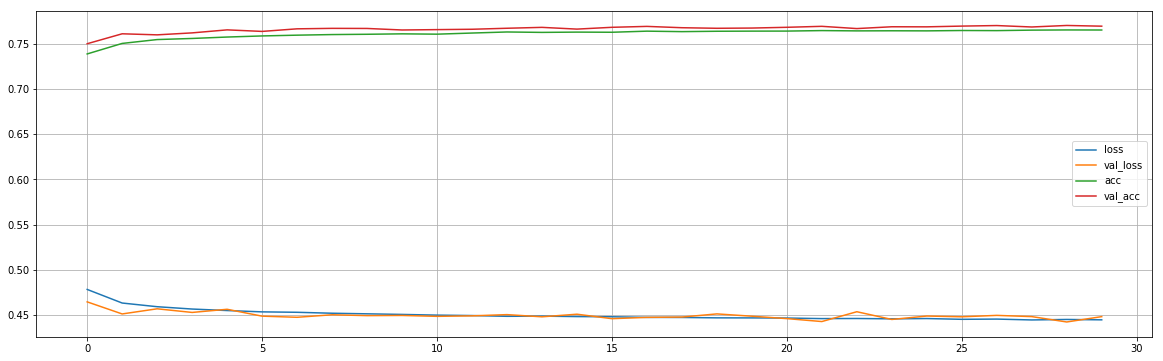

In [16]:
fig, ax = plt.subplots(figsize=(20, 6))

for metric in ['loss', 'val_loss', 'acc', 'val_acc']:
    ax.plot(history.history[metric], label=metric)
    

ax.grid()
ax.legend()
    